# Data Description

* ID – A unique identifier for each record.

* Country – The country of the patient.

* Age – Age of the patient.

* Gender – Gender of the patient (Male/Female).

* Tobacco Use – Whether the patient has used tobacco (Yes/No).

* Alcohol Consumption – Whether the patient consumes alcohol (Yes/No).

* HPV Infection – Presence of Human Papillomavirus infection (Yes/No).

* Betel Quid Use – Whether the patient has used betel quid (Yes/No).

* Chronic Sun Exposure – Whether the patient has prolonged sun exposure (Yes/No).

* Poor Oral Hygiene – Whether the patient has poor oral hygiene (Yes/No).

* Diet (Fruits & Vegetables Intake) – Dietary habits concerning fruit and vegetable intake (Good/Poor).

* Family History of Cancer – Whether the patient has a family history of cancer (Yes/No).

* Compromised Immune System – Whether the patient has a weakened immune system (Yes/No).

* Oral Lesions – Presence of oral lesions (Yes/No).

* Unexplained Bleeding – Presence of unexplained bleeding in the mouth (Yes/No).

* Difficulty Swallowing – Whether the patient has trouble swallowing (Yes/No).

* White or Red Patches in Mouth – Presence of abnormal patches in the mouth (Yes/No).

* Tumor Size (cm) – The size of the tumor in centimeters.

* Cancer Stage – The stage of oral cancer (e.g., 0, 1, 2, 3, 4).

* Treatment Type – The type of treatment received (e.g., No Treatment, Surgery, Radiation, Chemotherapy).

* Survival Rate (5-Year, %) – The estimated 5-year survival rate as a percentage.

* Cost of Treatment (USD) – The cost of treatment in US dollars.

* Economic Burden (Lost Workdays per Year) – Number of workdays lost per year due to the disease.

* Early Diagnosis – Whether the cancer was diagnosed early (Yes/No).

* Oral Cancer (Diagnosis) – Final diagnosis of oral cancer (Yes/No).

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
pd.set_option("display.max_columns",None)

In [4]:
oral_cancer=pd.read_csv("D:\GL\Capstone\Capstone_final\oral_cancer_prediction_dataset.csv")
oral_cancer.head()

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\rockz\AppData\Local\Temp\ipykernel_6976\1023301331.py:1: SyntaxWarning: invalid escape sequence '\G'
  oral_cancer=pd.read_csv("D:\GL\Capstone\Capstone_final\oral_cancer_prediction_dataset.csv")


ID       Country  Age  Gender Tobacco Use Alcohol Consumption  \
0   1         Italy   36  Female         Yes                 Yes   
1   2         Japan   64    Male         Yes                 Yes   
2   3            UK   37  Female          No                 Yes   
3   4     Sri Lanka   55    Male         Yes                 Yes   
4   5  South Africa   68    Male          No                  No   

  HPV Infection Betel Quid Use Chronic Sun Exposure Poor Oral Hygiene  \
0           Yes             No                   No               Yes   
1           Yes             No                  Yes               Yes   
2            No             No                  Yes               Yes   
3            No            Yes                   No               Yes   
4            No             No                   No               Yes   

  Diet (Fruits & Vegetables Intake) Family History of Cancer  \
0                               Low                       No   
1                              High                       No   
2                          Moderate                       No   
3                          Moderate                       No   
4                              High                       No   

  Compromised Immune System Oral Lesions Unexplained Bleeding  \
0                        No           No                   No   
1                        No           No                  Yes   
2                        No           No                   No   
3                        No          Yes                   No   
4                        No           No                   No   

  Difficulty Swallowing White or Red Patches in Mouth  Tumor Size (cm)  \
0                    No                            No         0.000000   
1                    No                            No         1.782186   
2                    No                           Yes         3.523895   
3                    No                            No         0.000000   
4                    No                            No         2.834789   

   Cancer Stage Treatment Type  Survival Rate (5-Year, %)  \
0             0   No Treatment                 100.000000   
1             1   No Treatment                  83.340103   
2             2        Surgery                  63.222871   
3             0   No Treatment                 100.000000   
4             3   No Treatment                  44.293199   

   Cost of Treatment (USD)  Economic Burden (Lost Workdays per Year)  \
0                     0.00                                         0   
1                 77772.50                                       177   
2                101164.50                                       130   
3                     0.00                                         0   
4                 45354.75                                        52   

  Early Diagnosis Oral Cancer (Diagnosis)  
0              No                      No  
1              No                     Yes  
2             Yes                     Yes  
3             Yes                      No  
4              No                     Yes

In [5]:
# creating a copy of the dataframe
df=oral_cancer.copy()

In [6]:
# Checking the shape of the dataset
oral_cancer.shape

(84922, 25)

In [7]:
# Checking the null values
oral_cancer.isnull().sum()

ID                                          0
Country                                     0
Age                                         0
Gender                                      0
Tobacco Use                                 0
Alcohol Consumption                         0
HPV Infection                               0
Betel Quid Use                              0
Chronic Sun Exposure                        0
Poor Oral Hygiene                           0
Diet (Fruits & Vegetables Intake)           0
Family History of Cancer                    0
Compromised Immune System                   0
Oral Lesions                                0
Unexplained Bleeding                        0
Difficulty Swallowing                       0
White or Red Patches in Mouth               0
Tumor Size (cm)                             0
Cancer Stage                                0
Treatment Type                              0
Survival Rate (5-Year, %)                   0
Cost of Treatment (USD)           

* No evident null values are present

In [8]:
# Checking data types
oral_cancer.dtypes

ID                                            int64
Country                                      object
Age                                           int64
Gender                                       object
Tobacco Use                                  object
Alcohol Consumption                          object
HPV Infection                                object
Betel Quid Use                               object
Chronic Sun Exposure                         object
Poor Oral Hygiene                            object
Diet (Fruits & Vegetables Intake)            object
Family History of Cancer                     object
Compromised Immune System                    object
Oral Lesions                                 object
Unexplained Bleeding                         object
Difficulty Swallowing                        object
White or Red Patches in Mouth                object
Tumor Size (cm)                             float64
Cancer Stage                                  int64
Treatment Ty

In [9]:
# Converting Cancer Stage to Object
oral_cancer['Cancer Stage'] = oral_cancer['Cancer Stage'].astype('object')

In [10]:
# Checking duplicates
oral_cancer.duplicated().sum()

0

* No duplicate values are also present

## Separating numeric and categoric Columns

In [11]:
numeric_cols=oral_cancer.select_dtypes(include=np.number).columns.to_list()
print("Numeric columns: ",numeric_cols)

Numeric columns:  ['ID', 'Age', 'Tumor Size (cm)', 'Survival Rate (5-Year, %)', 'Cost of Treatment (USD)', 'Economic Burden (Lost Workdays per Year)']


In [12]:
categoric_cols=oral_cancer.select_dtypes(include='object').columns.to_list()
print("Categoric Columns: ",categoric_cols)

Categoric Columns:  ['Country', 'Gender', 'Tobacco Use', 'Alcohol Consumption', 'HPV Infection', 'Betel Quid Use', 'Chronic Sun Exposure', 'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)', 'Family History of Cancer', 'Compromised Immune System', 'Oral Lesions', 'Unexplained Bleeding', 'Difficulty Swallowing', 'White or Red Patches in Mouth', 'Cancer Stage', 'Treatment Type', 'Early Diagnosis', 'Oral Cancer (Diagnosis)']


In [13]:
oral_cancer[numeric_cols]

ID  Age  Tumor Size (cm)  Survival Rate (5-Year, %)  \
0          1   36         0.000000                 100.000000   
1          2   64         1.782186                  83.340103   
2          3   37         3.523895                  63.222871   
3          4   55         0.000000                 100.000000   
4          5   68         2.834789                  44.293199   
...      ...  ...              ...                        ...   
84917  84918   46         0.000000                 100.000000   
84918  84919   41         0.000000                 100.000000   
84919  84920   72         4.777394                  85.633426   
84920  84921   67         0.000000                 100.000000   
84921  84922   75         0.000000                 100.000000   

       Cost of Treatment (USD)  Economic Burden (Lost Workdays per Year)  
0                         0.00                                         0  
1                     77772.50                                       177  
2                    101164.50                                       130  
3                         0.00                                         0  
4                     45354.75                                        52  
...                        ...                                       ...  
84917                     0.00                                         0  
84918                     0.00                                         0  
84919                 81352.50                                        90  
84920                     0.00                                         0  
84921                     0.00                                         0  

[84922 rows x 6 columns]

In [14]:
# Unique values in each column
for i in categoric_cols:
    if i != 'ID':
        print(f"Unique value for column {i} \n",oral_cancer[i].unique())

Unique value for column Country 
 ['Italy' 'Japan' 'UK' 'Sri Lanka' 'South Africa' 'Taiwan' 'USA' 'Germany'
 'France' 'Australia' 'Brazil' 'Pakistan' 'Kenya' 'Russia' 'Nigeria'
 'Egypt' 'India']
Unique value for column Gender 
 ['Female' 'Male']
Unique value for column Tobacco Use 
 ['Yes' 'No']
Unique value for column Alcohol Consumption 
 ['Yes' 'No']
Unique value for column HPV Infection 
 ['Yes' 'No']
Unique value for column Betel Quid Use 
 ['No' 'Yes']
Unique value for column Chronic Sun Exposure 
 ['No' 'Yes']
Unique value for column Poor Oral Hygiene 
 ['Yes' 'No']
Unique value for column Diet (Fruits & Vegetables Intake) 
 ['Low' 'High' 'Moderate']
Unique value for column Family History of Cancer 
 ['No' 'Yes']
Unique value for column Compromised Immune System 
 ['No' 'Yes']
Unique value for column Oral Lesions 
 ['No' 'Yes']
Unique value for column Unexplained Bleeding 
 ['No' 'Yes']
Unique value for column Difficulty Swallowing 
 ['No' 'Yes']
Unique value for column White or

### 5-point summary of the numeric columns

In [15]:
oral_cancer[numeric_cols].drop(['ID'],axis=1).describe()

Age  Tumor Size (cm)  Survival Rate (5-Year, %)  \
count  84922.000000     84922.000000               84922.000000   
mean      54.509444         1.747294                  79.503364   
std       10.014839         2.028199                  26.483746   
min       15.000000         0.000000                  10.000750   
25%       48.000000         0.000000                  65.233425   
50%       55.000000         0.000000                 100.000000   
75%       61.000000         3.480075                 100.000000   
max      101.000000         5.999899                 100.000000   

       Cost of Treatment (USD)  Economic Burden (Lost Workdays per Year)  
count             84922.000000                              84922.000000  
mean              39109.881244                                 52.028391  
std               44710.687054                                 60.389796  
min                   0.000000                                  0.000000  
25%                   0.000000                                  0.000000  
50%                   0.000000                                  0.000000  
75%               76468.437500                                104.000000  
max              159988.000000                                179.000000

### 5-point summary of the categoric columns

In [16]:
oral_cancer[categoric_cols].describe().T

count unique           top   freq
Country                            84922     17         India   8079
Gender                             84922      2          Male  60351
Tobacco Use                        84922      2           Yes  67989
Alcohol Consumption                84922      2           Yes  50939
HPV Infection                      84922      2            No  59525
Betel Quid Use                     84922      2            No  60299
Chronic Sun Exposure               84922      2            No  68057
Poor Oral Hygiene                  84922      2            No  42627
Diet (Fruits & Vegetables Intake)  84922      3      Moderate  33914
Family History of Cancer           84922      2            No  76508
Compromised Immune System          84922      2            No  76368
Oral Lesions                       84922      2            No  59419
Unexplained Bleeding               84922      2            No  67891
Difficulty Swallowing              84922      2            No  63709
White or Red Patches in Mouth      84922      2            No  55103
Cancer Stage                       84922      5             0  42573
Treatment Type                     84922      5  No Treatment  51016
Early Diagnosis                    84922      2           Yes  46508
Oral Cancer (Diagnosis)            84922      2            No  42573

### Visualizing numeric columns

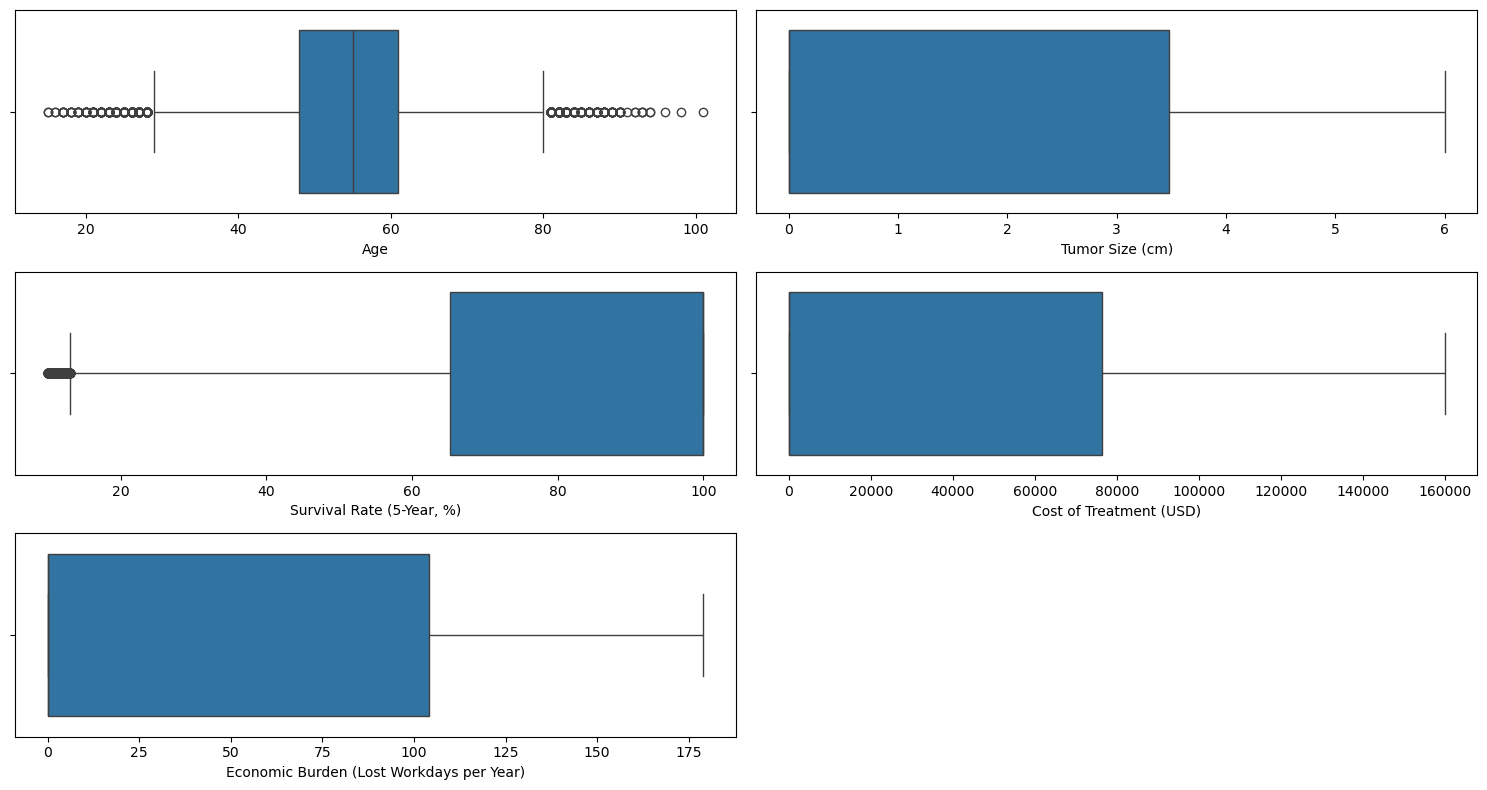

In [17]:
plt.figure(figsize=(15,8))
t=1
for i in numeric_cols:
    if i !='ID':
        plt.subplot(3,2,t)
        sns.boxplot(x=df[i])
        t+=1
plt.tight_layout()
plt.show()

In [18]:
# There are evident outliers in Age and Survival rate, They will be removed
ll=np.percentile(oral_cancer['Age'],5)
ul=np.percentile(oral_cancer['Age'],95)

oral_cancer['Age']=np.clip(oral_cancer['Age'],ll,ul)

<Axes: xlabel='Age'>

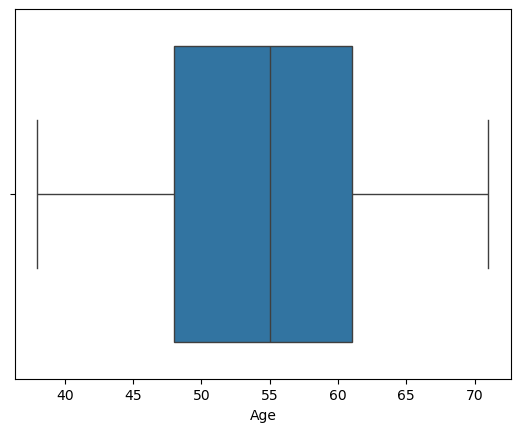

In [19]:
sns.boxplot(x=oral_cancer['Age'])

<Axes: xlabel='Age', ylabel='Survival Rate (5-Year, %)'>

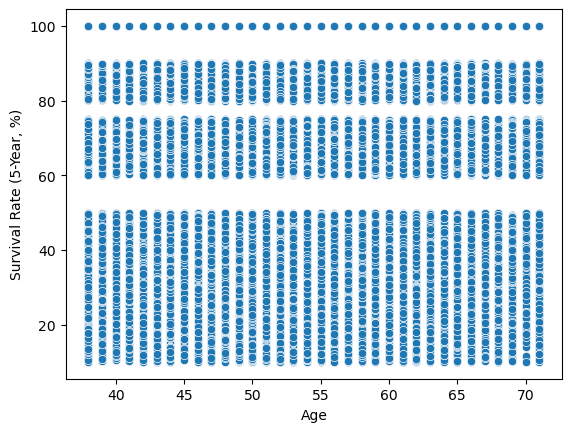

In [20]:
sns.scatterplot(data=oral_cancer,y='Survival Rate (5-Year, %)',x='Age')

In [21]:
# There is no such relation between the columns Age and Survival Rate (5-Year, %)

In [22]:
oral_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        84922 non-null  int64  
 1   Country                                   84922 non-null  object 
 2   Age                                       84922 non-null  int64  
 3   Gender                                    84922 non-null  object 
 4   Tobacco Use                               84922 non-null  object 
 5   Alcohol Consumption                       84922 non-null  object 
 6   HPV Infection                             84922 non-null  object 
 7   Betel Quid Use                            84922 non-null  object 
 8   Chronic Sun Exposure                      84922 non-null  object 
 9   Poor Oral Hygiene                         84922 non-null  object 
 10  Diet (Fruits & Vegetables Intake) 

In [23]:
oral_cancer.head()

ID       Country  Age  Gender Tobacco Use Alcohol Consumption  \
0   1         Italy   38  Female         Yes                 Yes   
1   2         Japan   64    Male         Yes                 Yes   
2   3            UK   38  Female          No                 Yes   
3   4     Sri Lanka   55    Male         Yes                 Yes   
4   5  South Africa   68    Male          No                  No   

  HPV Infection Betel Quid Use Chronic Sun Exposure Poor Oral Hygiene  \
0           Yes             No                   No               Yes   
1           Yes             No                  Yes               Yes   
2            No             No                  Yes               Yes   
3            No            Yes                   No               Yes   
4            No             No                   No               Yes   

  Diet (Fruits & Vegetables Intake) Family History of Cancer  \
0                               Low                       No   
1                              High                       No   
2                          Moderate                       No   
3                          Moderate                       No   
4                              High                       No   

  Compromised Immune System Oral Lesions Unexplained Bleeding  \
0                        No           No                   No   
1                        No           No                  Yes   
2                        No           No                   No   
3                        No          Yes                   No   
4                        No           No                   No   

  Difficulty Swallowing White or Red Patches in Mouth  Tumor Size (cm)  \
0                    No                            No         0.000000   
1                    No                            No         1.782186   
2                    No                           Yes         3.523895   
3                    No                            No         0.000000   
4                    No                            No         2.834789   

  Cancer Stage Treatment Type  Survival Rate (5-Year, %)  \
0            0   No Treatment                 100.000000   
1            1   No Treatment                  83.340103   
2            2        Surgery                  63.222871   
3            0   No Treatment                 100.000000   
4            3   No Treatment                  44.293199   

   Cost of Treatment (USD)  Economic Burden (Lost Workdays per Year)  \
0                     0.00                                         0   
1                 77772.50                                       177   
2                101164.50                                       130   
3                     0.00                                         0   
4                 45354.75                                        52   

  Early Diagnosis Oral Cancer (Diagnosis)  
0              No                      No  
1              No                     Yes  
2             Yes                     Yes  
3             Yes                      No  
4              No                     Yes

### Checking the density

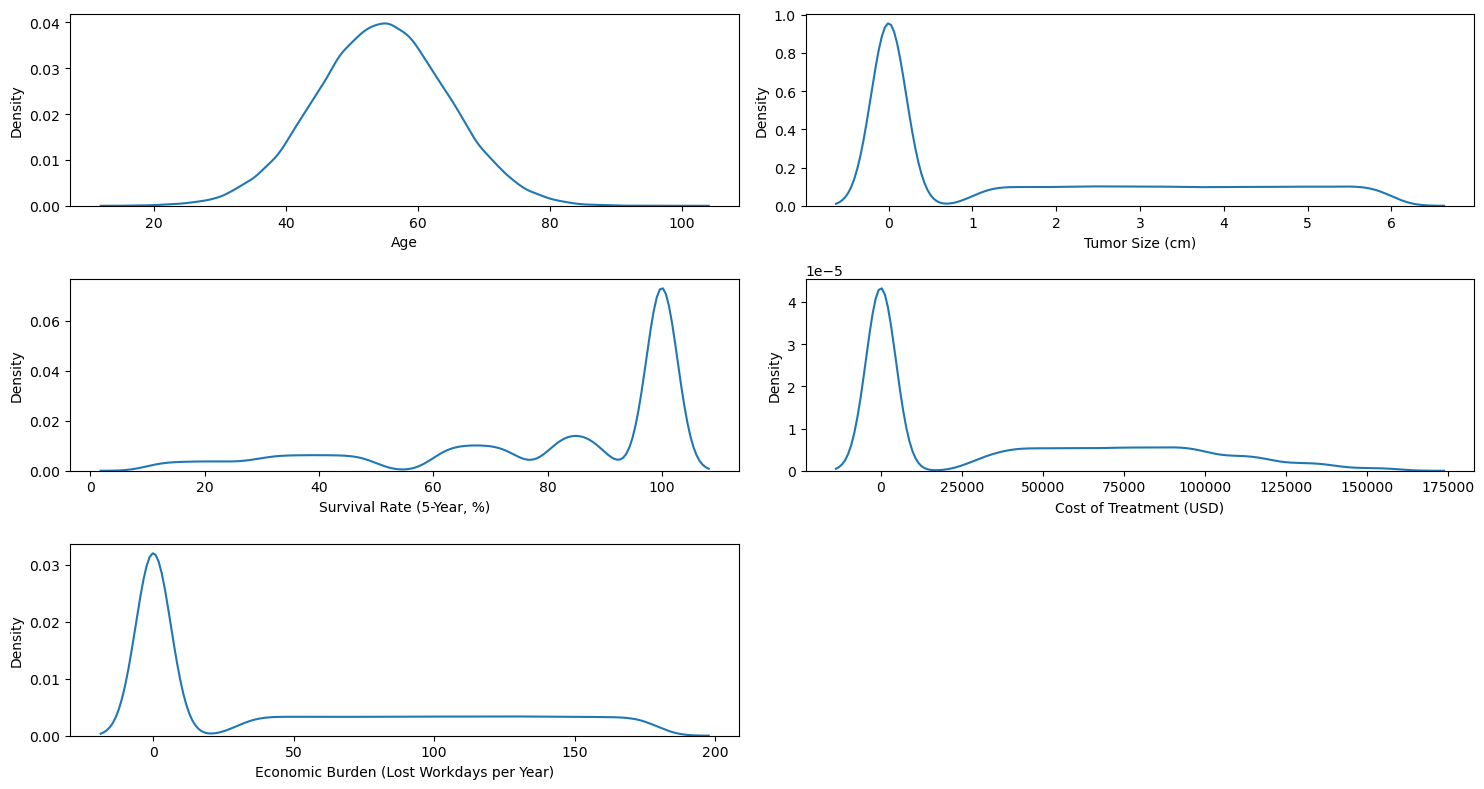

In [24]:
plt.figure(figsize=(15,8))
t=1
for i in numeric_cols:
    if i !='ID':
        plt.subplot(3,2,t)
        sns.kdeplot(x=df[i])
        t+=1
plt.tight_layout()
plt.show()

* 50% of people are of age 55
* There are some people present below age of 30
* There are some people present greater than the age of 80

* From the boxplot and the 5-point summary it can be seen that the tumor size is 0 for 50% of people
* Tumor size in some people lies between 3.5 cm to 6 cm

* Around 75% and more people have cancer stage between 2 and 4

* For 25% of people, the estimated 5-year survival rate percentage is 65% but the survival rate percentage is more for 50% to 75% of people

* The cost of treatment for most of the people is 0.
* But there are people whose cost of treatment also ranges from 25000 to 17500

* Most people lost 0 workdays per year
* But There are people who lost 50 to 175 workdays per week.

In [25]:
oral_cancer[categoric_cols]

Country  Gender Tobacco Use Alcohol Consumption HPV Infection  \
0             Italy  Female         Yes                 Yes           Yes   
1             Japan    Male         Yes                 Yes           Yes   
2                UK  Female          No                 Yes            No   
3         Sri Lanka    Male         Yes                 Yes            No   
4      South Africa    Male          No                  No            No   
...             ...     ...         ...                 ...           ...   
84917           USA    Male         Yes                  No            No   
84918           USA    Male         Yes                 Yes            No   
84919        Taiwan    Male         Yes                 Yes            No   
84920         Japan    Male         Yes                  No            No   
84921      Pakistan    Male         Yes                  No            No   

      Betel Quid Use Chronic Sun Exposure Poor Oral Hygiene  \
0                 No                   No               Yes   
1                 No                  Yes               Yes   
2                 No                  Yes               Yes   
3                Yes                   No               Yes   
4                 No                   No               Yes   
...              ...                  ...               ...   
84917             No                   No               Yes   
84918             No                   No                No   
84919            Yes                   No               Yes   
84920             No                   No                No   
84921            Yes                  Yes                No   

      Diet (Fruits & Vegetables Intake) Family History of Cancer  \
0                                   Low                       No   
1                                  High                       No   
2                              Moderate                       No   
3                              Moderate                       No   
4                                  High                       No   
...                                 ...                      ...   
84917                          Moderate                       No   
84918                          Moderate                       No   
84919                              High                      Yes   
84920                               Low                       No   
84921                              High                       No   

      Compromised Immune System Oral Lesions Unexplained Bleeding  \
0                            No           No                   No   
1                            No           No                  Yes   
2                            No           No                   No   
3                            No          Yes                   No   
4                            No           No                   No   
...                         ...          ...                  ...   
84917                        No           No                   No   
84918                       Yes           No                   No   
84919                        No           No                   No   
84920                        No          Yes                   No   
84921                        No           No                   No   

      Difficulty Swallowing White or Red Patches in Mouth Cancer Stage  \
0                        No                            No            0   
1                        No                            No            1   
2                        No                           Yes            2   
3                        No                            No            0   
4                        No                            No            3   
...                     ...                           ...          ...   
84917                    No                           Yes            0   
84918                   Yes                           Yes            0   
84919             

In [26]:
for i in categoric_cols:
    print(f"Value count of column {i} \n",oral_cancer[i].value_counts(normalize=True))

Value count of column Country 
 Country
India           0.095134
Pakistan        0.094216
Sri Lanka       0.094204
Taiwan          0.093085
UK              0.058053
Germany         0.057806
USA             0.057594
Italy           0.056923
France          0.056322
Brazil          0.056075
Russia          0.055474
Egypt           0.038423
Nigeria         0.038341
Australia       0.037552
Kenya           0.037340
Japan           0.037116
South Africa    0.036339
Name: proportion, dtype: float64
Value count of column Gender 
 Gender
Male      0.710664
Female    0.289336
Name: proportion, dtype: float64
Value count of column Tobacco Use 
 Tobacco Use
Yes    0.800605
No     0.199395
Name: proportion, dtype: float64
Value count of column Alcohol Consumption 
 Alcohol Consumption
Yes    0.599833
No     0.400167
Name: proportion, dtype: float64
Value count of column HPV Infection 
 HPV Infection
No     0.700937
Yes    0.299063
Name: proportion, dtype: float64
Value count of column Betel Quid U

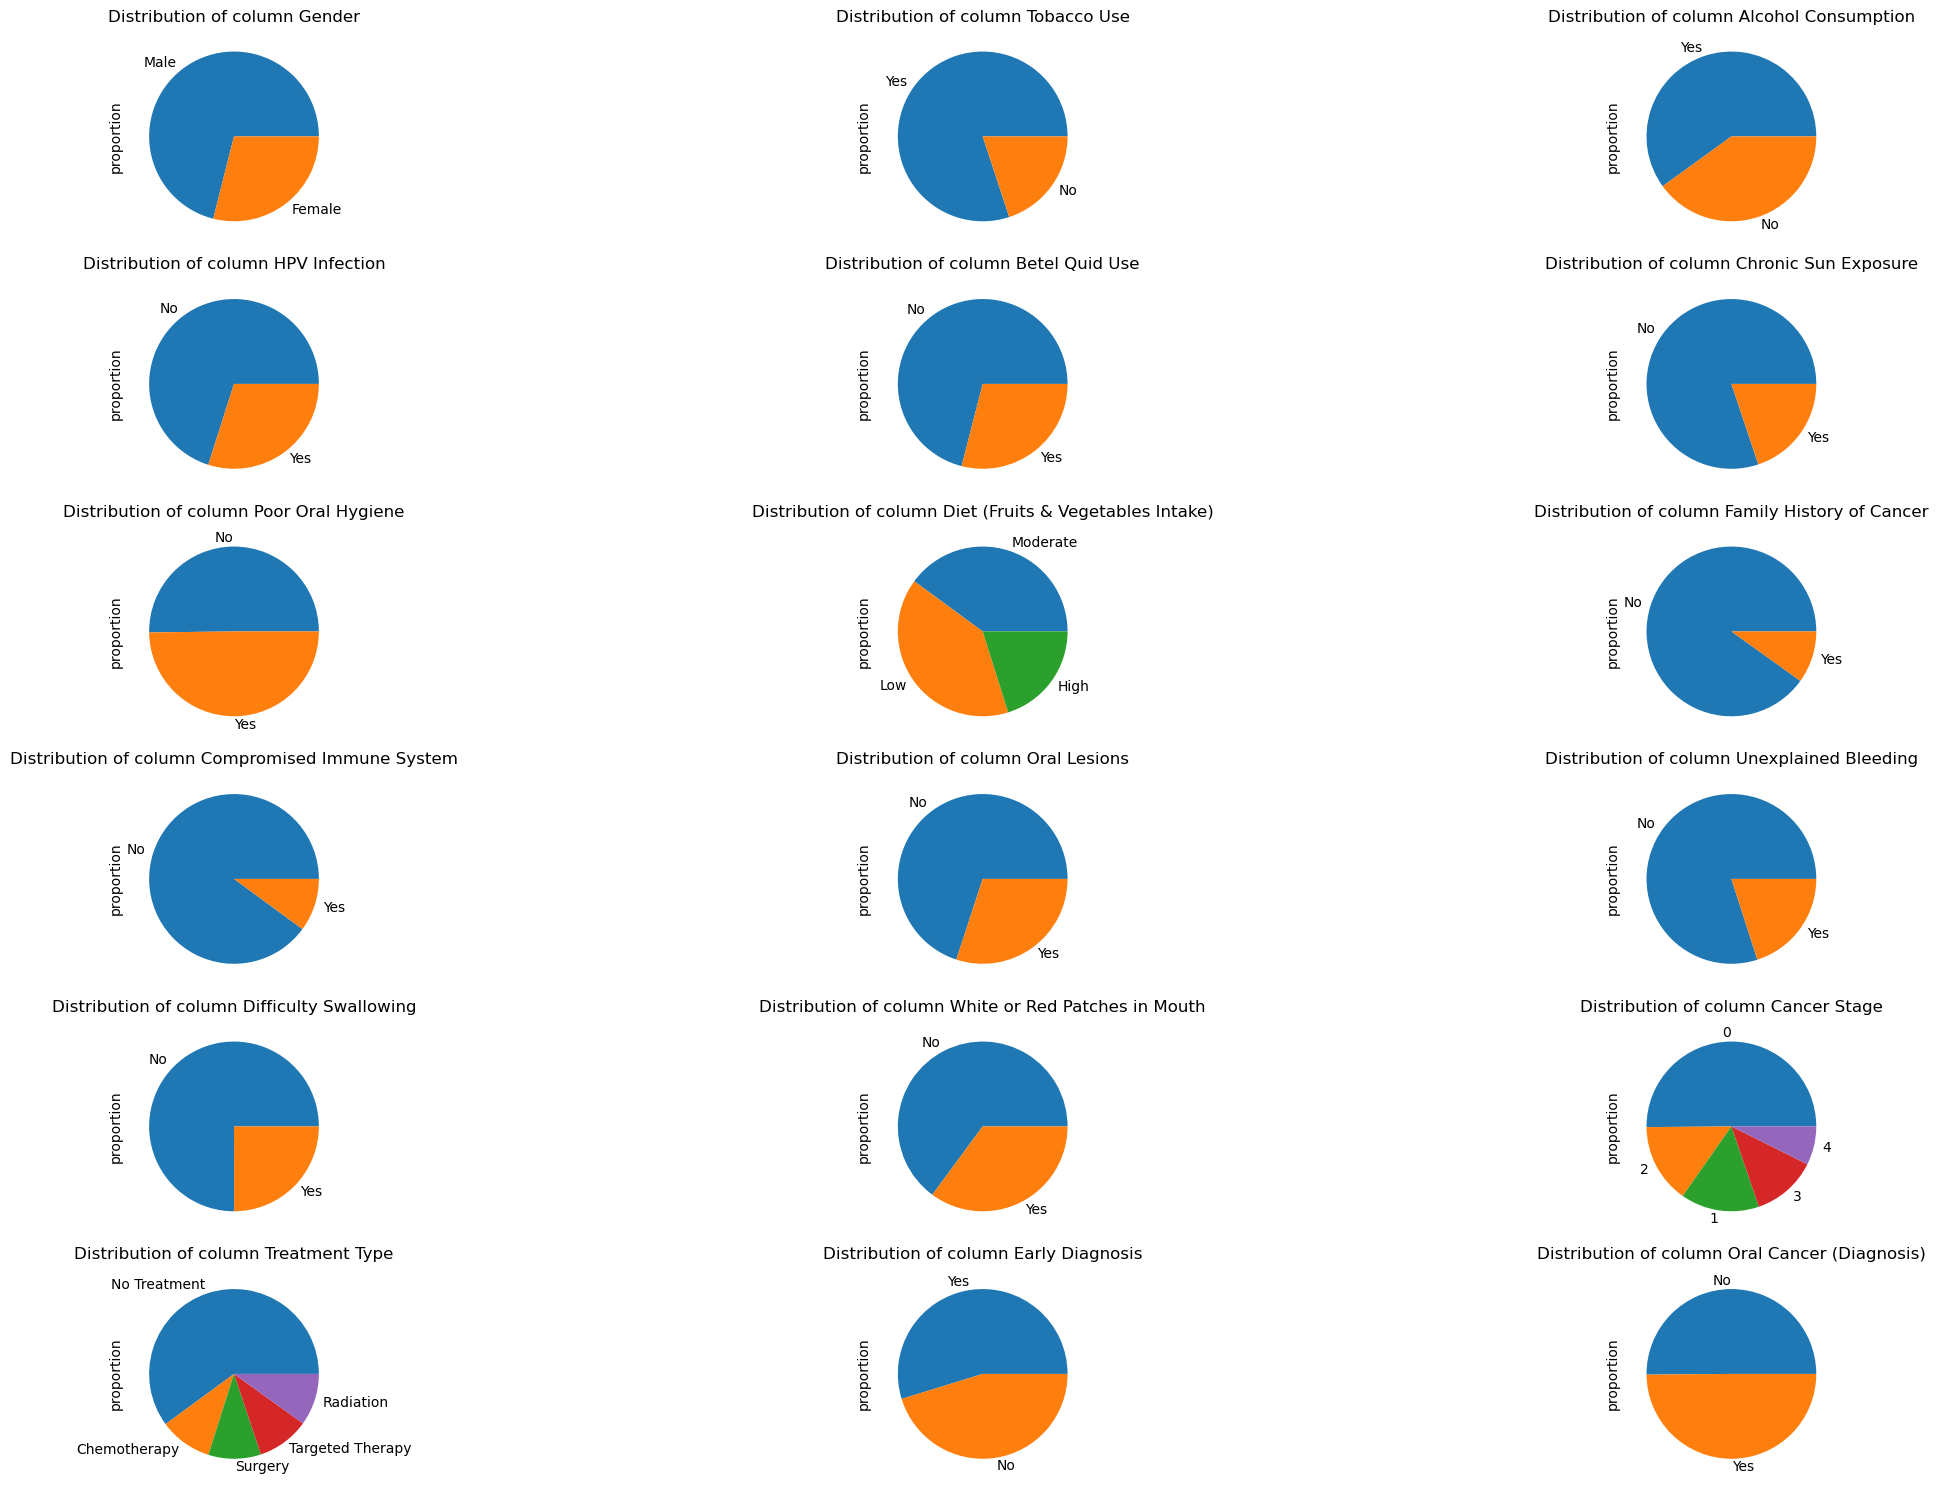

In [27]:
plt.figure(figsize=(25,15))
t=1
for i in categoric_cols:
    if i !='Country':
        plt.subplot(6,3,t)
        oral_cancer[i].value_counts(normalize=True).plot(kind='pie')
        plt.title(f"Distribution of column {i}")
        t+=1
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.tight_layout()
plt.show()

## Bi-variate Analysis

#### Num VS Target

In [28]:
# plt.figure(figsize=(15,12))
# t=1
# for i in numeric_cols:
#     if i!='ID':
#         plt.subplot(4,2,t)
#         sns.lineplot(data=oral_cancer,y='Oral Cancer (Diagnosis)',x=i)
#         t+=1

# plt.tight_layout()
# plt.show()

In [29]:
# plt.figure(figsize=(15,12))
# t=1
# for i in numeric_cols:
#     if i!='ID':
#         plt.subplot(4,2,t)
#         sns.lineplot(data=oral_cancer,x='Oral Cancer (Diagnosis)',y=i)
#         t+=1

# plt.tight_layout()
# plt.show()

C:\Users\rockz\AppData\Local\Temp\ipykernel_6976\1952290213.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=oral_cancer[i])
C:\Users\rockz\AppData\Local\Temp\ipykernel_6976\1952290213.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=oral_cancer[i])
C:\Users\rockz\AppData\Local\Temp\ip

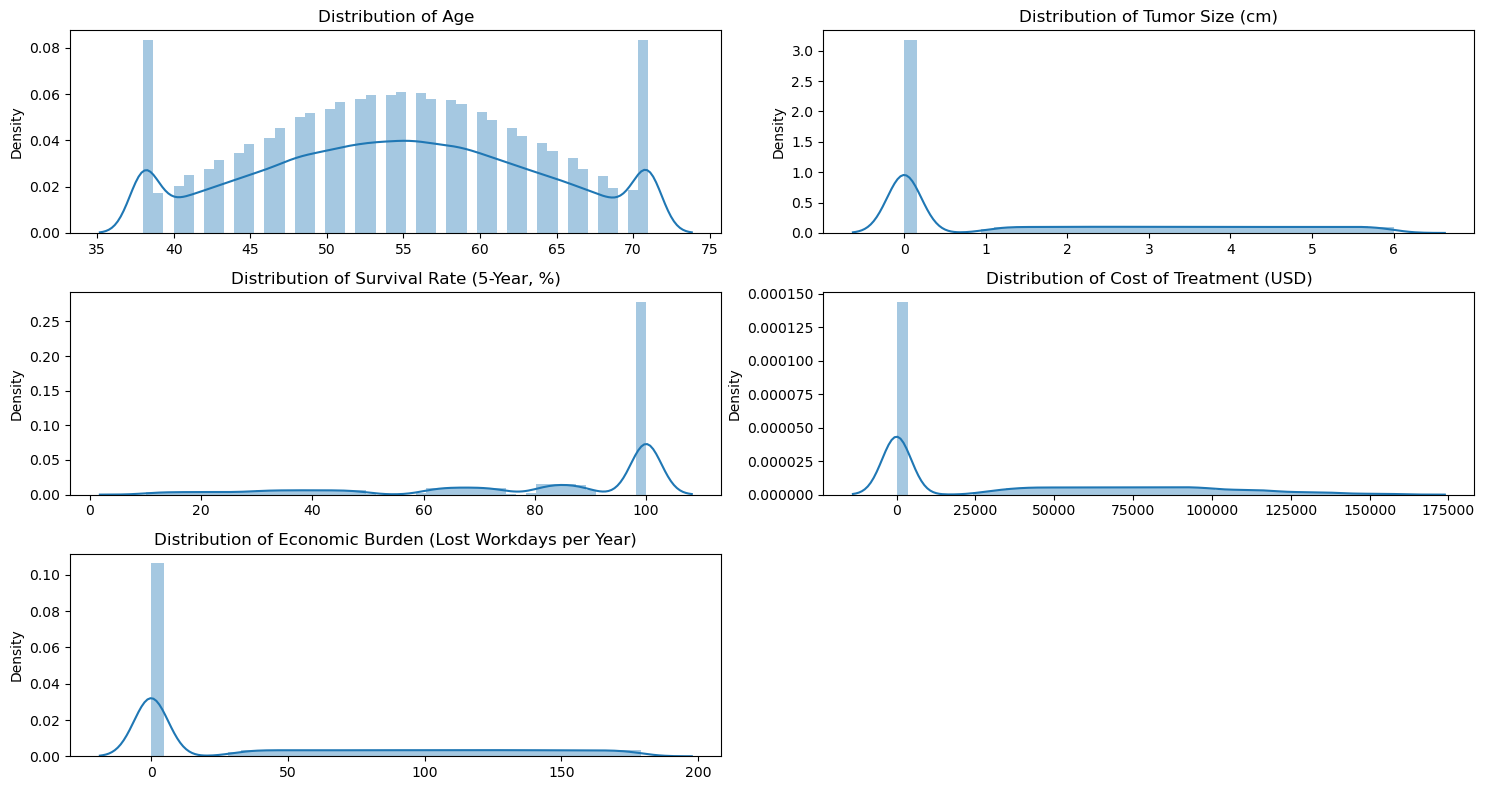

In [30]:
plt.figure(figsize=(15,8))
t=1
for i in numeric_cols:
    if i !='ID':
        plt.subplot(3,2,t)
        plt.title(f"Distribution of {i}")
        sns.distplot(x=oral_cancer[i])
        t+=1
plt.tight_layout()
plt.show()

* Age vs Oral Cancer (Diagnosis): As the age increasing there is a chance that he/she may have oral cancer
* Tumor Size vs Oral Cancer (Diagnosis): There is a chance of having oral cancer if tumor is present
* Cancer Stage vs Oral Cancer (Diagnosis): Cancer stage and Oral Cancer (Diagnosis) are correlated.
* Survival Rate vs Oral Cancer (Diagnosis): The survival rate decreases if the person is having oral cancer
* Cost of Treatment vs Oral Cancer (Diagnosis): The cost of treatment will increase if the person is detected as having oral cancer
* Economic burder lost per year vs Oral Cancer (Diagnosis):The Economic burder lost per year is less if the person is detected of oral cancer 
  

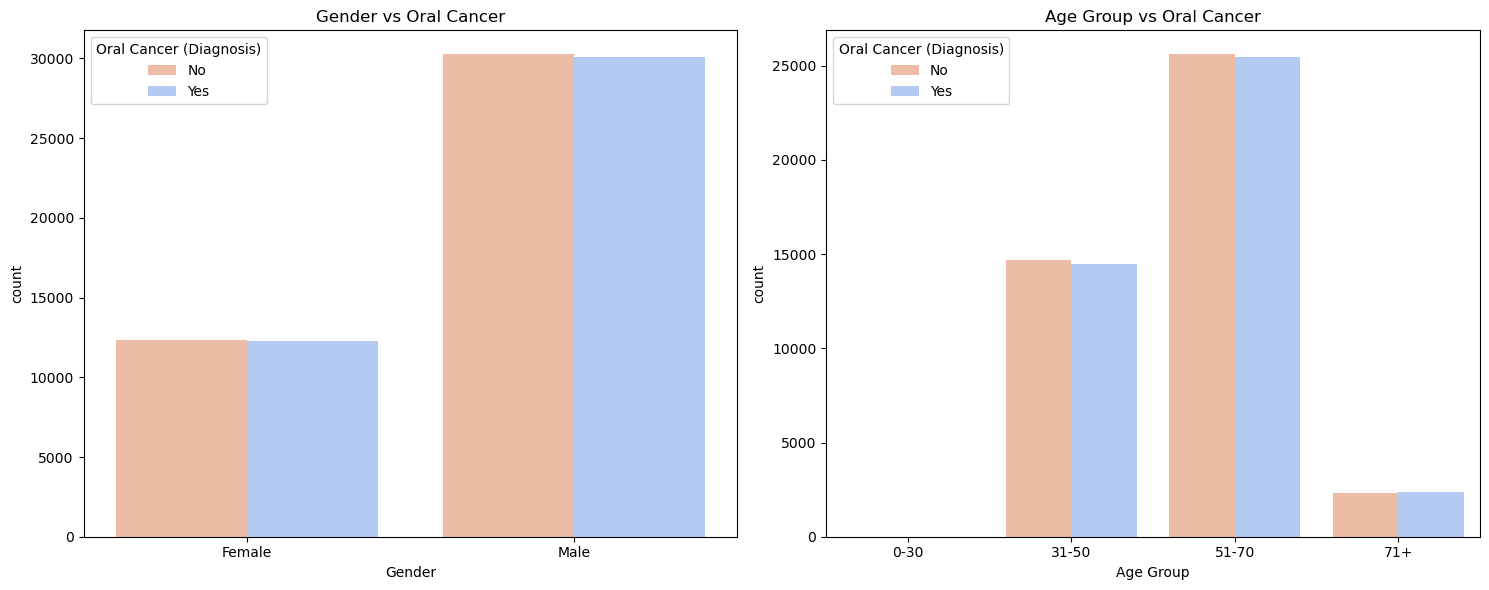

In [31]:
# Gender vs Oral Cancer
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=oral_cancer, x="Gender", hue="Oral Cancer (Diagnosis)", palette="coolwarm_r")
plt.title("Gender vs Oral Cancer")

# Age Group vs Oral Cancer
oral_cancer['Age Group'] = pd.cut(oral_cancer['Age'], bins=[0, 30, 50, 70, 100], labels=['0-30', '31-50', '51-70', '71+'])
plt.subplot(1, 2, 2)
sns.countplot(data=oral_cancer, x="Age Group", hue="Oral Cancer (Diagnosis)", palette="coolwarm_r")
plt.title("Age Group vs Oral Cancer")
plt.tight_layout()
plt.show()

* The chart shows that a greater number of males have been diagnosed with oral cancer than females
* The chart demonstrates that the highest incidence of oral cancer is found in the 51-70 age group, followed by the 31-50 age group, indicating that oral cancer is more common in older adults.

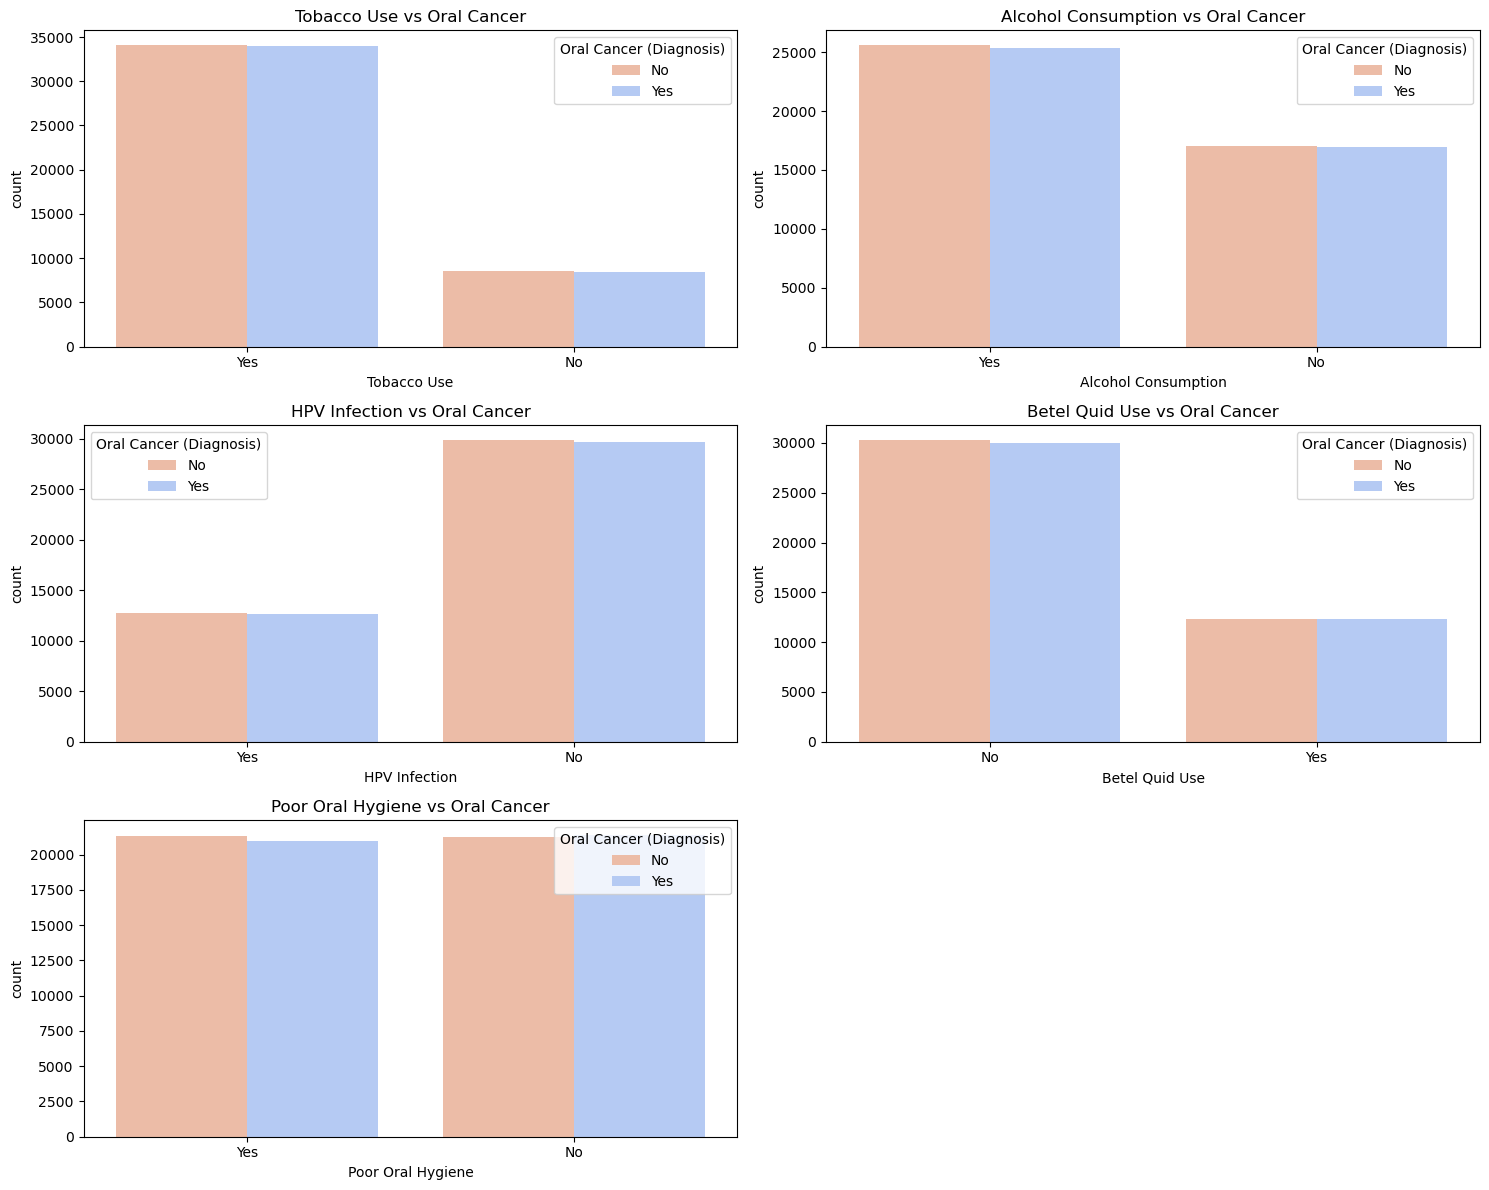

In [32]:
# Impact of Risk Features
t = 1
plt.figure(figsize=(15, 12))
fea = ["Tobacco Use", "Alcohol Consumption", "HPV Infection", "Betel Quid Use","Poor Oral Hygiene"]
for i in fea:
    plt.subplot(3, 2, t)
    sns.countplot(data = oral_cancer, x=i, hue=df["Oral Cancer (Diagnosis)"], palette="coolwarm_r")
    plt.title(f"{i} vs Oral Cancer")
    t += 1
plt.tight_layout()
plt.show()

* Tobacco Use vs Oral Cancer Diagnosis: Individuals who use tobacco show significantly higher instances of oral cancer compared to non-users.
* Alcohol Consumption vs Oral Cancer Diagnosis: Alcohol consumers have a higher prevalence of oral cancer diagnoses than non-consumers.
* HPV Infection vs Oral Cancer Diagnosis: There is a strong correlation between HPV infection and increased rates of oral cancer diagnosis.
* Betel Quid Use vs Oral Cancer Diagnosis: Betel quid users exhibit a markedly higher occurrence of oral cancer than non-users.
* Poor oral hygiene vs Oral Cancer Diagnosis: Poor oral hygiene alone does not show an overwhelming difference in the occurrence of oral cancer.

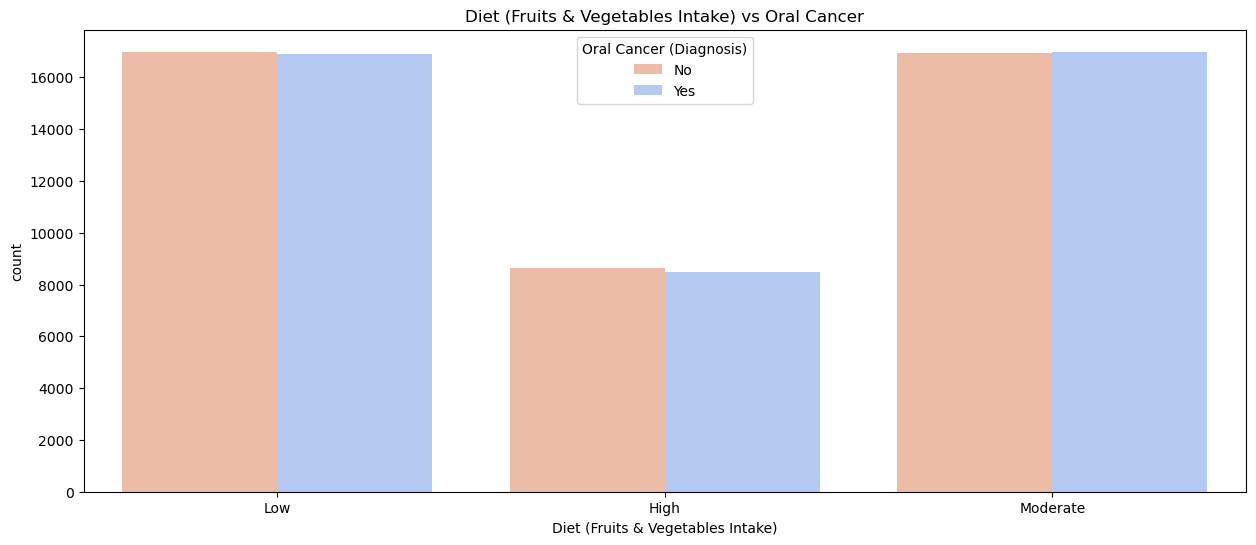

In [33]:
# Diet vs Oral Cancer
plt.figure(figsize=(15, 6))
sns.countplot(data=oral_cancer, x="Diet (Fruits & Vegetables Intake)", hue="Oral Cancer (Diagnosis)", palette="coolwarm_r")
plt.title("Diet (Fruits & Vegetables Intake) vs Oral Cancer")
plt.show()

* Individuals with high intake of fruits and vegetables show a lower incidence of oral cancer compared to those with moderate or low intake.

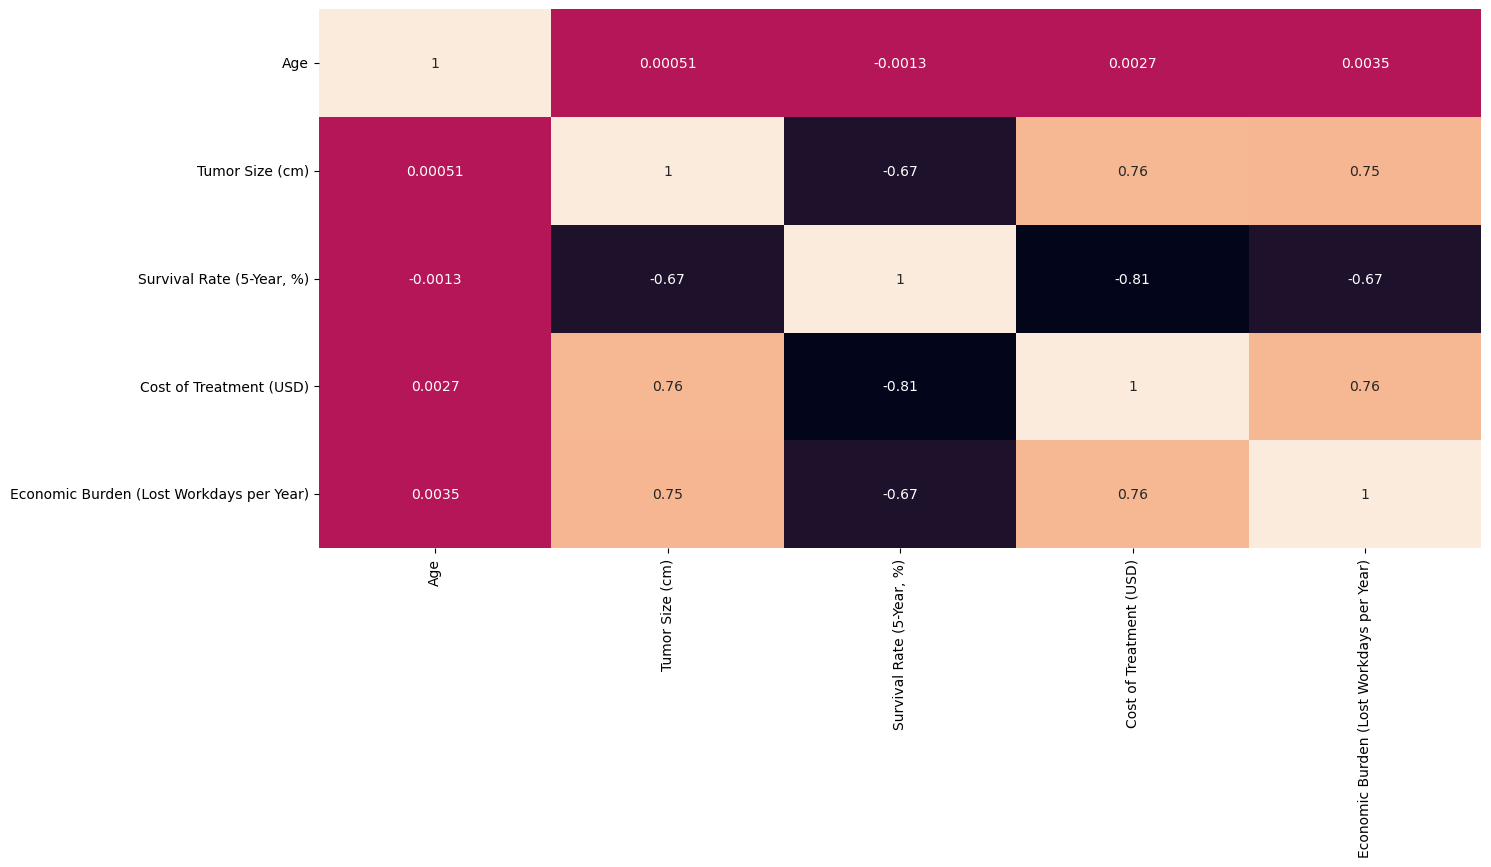

In [34]:
plt.figure(figsize=(15,7))
sns.heatmap(oral_cancer[numeric_cols].drop(['ID'],axis=1).corr(),annot=True,cbar=False)
plt.show()

In [35]:
oral_cancer[categoric_cols].head()

Country  Gender Tobacco Use Alcohol Consumption HPV Infection  \
0         Italy  Female         Yes                 Yes           Yes   
1         Japan    Male         Yes                 Yes           Yes   
2            UK  Female          No                 Yes            No   
3     Sri Lanka    Male         Yes                 Yes            No   
4  South Africa    Male          No                  No            No   

  Betel Quid Use Chronic Sun Exposure Poor Oral Hygiene  \
0             No                   No               Yes   
1             No                  Yes               Yes   
2             No                  Yes               Yes   
3            Yes                   No               Yes   
4             No                   No               Yes   

  Diet (Fruits & Vegetables Intake) Family History of Cancer  \
0                               Low                       No   
1                              High                       No   
2                          Moderate                       No   
3                          Moderate                       No   
4                              High                       No   

  Compromised Immune System Oral Lesions Unexplained Bleeding  \
0                        No           No                   No   
1                        No           No                  Yes   
2                        No           No                   No   
3                        No          Yes                   No   
4                        No           No                   No   

  Difficulty Swallowing White or Red Patches in Mouth Cancer Stage  \
0                    No                            No            0   
1                    No                            No            1   
2                    No                           Yes            2   
3                    No                            No            0   
4                    No                            No            3   

  Treatment Type Early Diagnosis Oral Cancer (Diagnosis)  
0   No Treatment              No                      No  
1   No Treatment              No                     Yes  
2        Surgery             Yes                     Yes  
3   No Treatment             Yes                      No  
4   No Treatment              No                     Yes

In [36]:
# oral_cancer.drop(['ID'],axis=1,inplace=True)

In [37]:
numeric_cols=oral_cancer.select_dtypes(include=np.number).columns
print(numeric_cols)

Index(['ID', 'Age', 'Tumor Size (cm)', 'Survival Rate (5-Year, %)',
       'Cost of Treatment (USD)', 'Economic Burden (Lost Workdays per Year)'],
      dtype='object')


In [38]:
categoric_cols

['Country',
 'Gender',
 'Tobacco Use',
 'Alcohol Consumption',
 'HPV Infection',
 'Betel Quid Use',
 'Chronic Sun Exposure',
 'Poor Oral Hygiene',
 'Diet (Fruits & Vegetables Intake)',
 'Family History of Cancer',
 'Compromised Immune System',
 'Oral Lesions',
 'Unexplained Bleeding',
 'Difficulty Swallowing',
 'White or Red Patches in Mouth',
 'Cancer Stage',
 'Treatment Type',
 'Early Diagnosis',
 'Oral Cancer (Diagnosis)']

In [39]:
df['Oral Cancer (Diagnosis)'].unique()

array(['No', 'Yes'], dtype=object)

In [40]:
from scipy.stats import ttest_ind,chi2_contingency

In [41]:
# Statistical Analysis
    # 1. numeric vs target
    # 2. Categoric vs Target
for col in numeric_cols:
    group_1=oral_cancer[oral_cancer['Oral Cancer (Diagnosis)']=='No'][col]
    group_2=oral_cancer[oral_cancer['Oral Cancer (Diagnosis)']=='Yes'][col]
    test_stat,p_val=ttest_ind(group_1,group_2)
    print(f"P value of {col} is {p_val}")
    if p_val<0.05:
        print(f"There is statistically significant association between the {col} and Oral Cancer (Diagnosis)")
    else:
        print(f"There is no statistical significant association between the {col} and Oral Cancer (Diagnosis)")

P value of ID is 0.7807975577497613
There is no statistical significant association between the ID and Oral Cancer (Diagnosis)
P value of Age is 0.7112023434523236
There is no statistical significant association between the Age and Oral Cancer (Diagnosis)
P value of Tumor Size (cm) is 0.0
There is statistically significant association between the Tumor Size (cm) and Oral Cancer (Diagnosis)
P value of Survival Rate (5-Year, %) is 0.0
There is statistically significant association between the Survival Rate (5-Year, %) and Oral Cancer (Diagnosis)
P value of Cost of Treatment (USD) is 0.0
There is statistically significant association between the Cost of Treatment (USD) and Oral Cancer (Diagnosis)
P value of Economic Burden (Lost Workdays per Year) is 0.0
There is statistically significant association between the Economic Burden (Lost Workdays per Year) and Oral Cancer (Diagnosis)


d:\anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [42]:
for col in numeric_cols:
    group_1=oral_cancer[oral_cancer['Oral Cancer (Diagnosis)']=='No'][col]
    group_2=oral_cancer[oral_cancer['Oral Cancer (Diagnosis)']=='Yes'][col]
    test_stat,p_val=ttest_ind(group_1,group_2,equal_var=False)
    print(f"P value of {col} is {p_val}")
    if p_val<0.05:
        print(f"There is statistically significant association between the {col} and Oral Cancer (Diagnosis)")
    else:
        print(f"There is no statistical significant association between the {col} and Oral Cancer (Diagnosis)")

P value of ID is 0.7807983339202882
There is no statistical significant association between the ID and Oral Cancer (Diagnosis)
P value of Age is 0.7112009676478361
There is no statistical significant association between the Age and Oral Cancer (Diagnosis)
P value of Tumor Size (cm) is 0.0
There is statistically significant association between the Tumor Size (cm) and Oral Cancer (Diagnosis)
P value of Survival Rate (5-Year, %) is 0.0
There is statistically significant association between the Survival Rate (5-Year, %) and Oral Cancer (Diagnosis)
P value of Cost of Treatment (USD) is 0.0
There is statistically significant association between the Cost of Treatment (USD) and Oral Cancer (Diagnosis)
P value of Economic Burden (Lost Workdays per Year) is 0.0
There is statistically significant association between the Economic Burden (Lost Workdays per Year) and Oral Cancer (Diagnosis)


In [43]:
# 2. Categoric vs Target
for col in categoric_cols:
    if col!="Oral Cancer (Diagnosis)":
        ct=pd.crosstab(oral_cancer[col],oral_cancer['Oral Cancer (Diagnosis)'])
        ttest,p_val,dof,expected=chi2_contingency(ct)
        print(f"{col} and {p_val}")
        if p_val<0.05:
            print(f"There is statistically significant association between the {col} and Oral Cancer (Diagnosis)")
        else:
            print(f"There is no statistical significant association between the {col} and Oral Cancer (Diagnosis)")

Country and 0.35163122093418847
There is no statistical significant association between the Country and Oral Cancer (Diagnosis)
Gender and 0.9204976552018163
There is no statistical significant association between the Gender and Oral Cancer (Diagnosis)
Tobacco Use and 0.5864637294064725
There is no statistical significant association between the Tobacco Use and Oral Cancer (Diagnosis)
Alcohol Consumption and 0.6457066556474733
There is no statistical significant association between the Alcohol Consumption and Oral Cancer (Diagnosis)
HPV Infection and 0.9104274259235184
There is no statistical significant association between the HPV Infection and Oral Cancer (Diagnosis)
Betel Quid Use and 0.6448383589549511
There is no statistical significant association between the Betel Quid Use and Oral Cancer (Diagnosis)
Chronic Sun Exposure and 0.7863289778674327
There is no statistical significant association between the Chronic Sun Exposure and Oral Cancer (Diagnosis)
Poor Oral Hygiene and 0.1565

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
# categoric_cols

In [46]:
encoder=LabelEncoder()


for col in categoric_cols:
    if (col!='Country') and (col!='Cancer Stage'):
        df[col]=encoder.fit_transform(df[col])

In [47]:
df.head()

ID       Country  Age  Gender  Tobacco Use  Alcohol Consumption  \
0   1         Italy   36       0            1                    1   
1   2         Japan   64       1            1                    1   
2   3            UK   37       0            0                    1   
3   4     Sri Lanka   55       1            1                    1   
4   5  South Africa   68       1            0                    0   

   HPV Infection  Betel Quid Use  Chronic Sun Exposure  Poor Oral Hygiene  \
0              1               0                     0                  1   
1              1               0                     1                  1   
2              0               0                     1                  1   
3              0               1                     0                  1   
4              0               0                     0                  1   

   Diet (Fruits & Vegetables Intake)  Family History of Cancer  \
0                                  1                         0   
1                                  0                         0   
2                                  2                         0   
3                                  2                         0   
4                                  0                         0   

   Compromised Immune System  Oral Lesions  Unexplained Bleeding  \
0                          0             0                     0   
1                          0             0                     1   
2                          0             0                     0   
3                          0             1                     0   
4                          0             0                     0   

   Difficulty Swallowing  White or Red Patches in Mouth  Tumor Size (cm)  \
0                      0                              0         0.000000   
1                      0                              0         1.782186   
2                      0                              1         3.523895   
3                      0                              0         0.000000   
4                      0                              0         2.834789   

   Cancer Stage  Treatment Type  Survival Rate (5-Year, %)  \
0             0               1                 100.000000   
1             1               1                  83.340103   
2             2               3                  63.222871   
3             0               1                 100.000000   
4             3               1                  44.293199   

   Cost of Treatment (USD)  Economic Burden (Lost Workdays per Year)  \
0                     0.00                                         0   
1                 77772.50                                       177   
2                101164.50                                       130   
3                     0.00                                         0   
4                 45354.75                                        52   

   Early Diagnosis  Oral Cancer (Diagnosis)  
0                0                        0  
1                0                        1  
2                1                        1  
3                1                        0  
4                0                        1

In [48]:
df.drop(['ID'],axis=1,inplace=True)

In [49]:
df.drop(['Country'],axis=1,inplace=True)

In [50]:
# df=df.drop(['ID','Country'],axis=1)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score

In [53]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [54]:
x=df.drop(['Oral Cancer (Diagnosis)'],axis=1)
y=df['Oral Cancer (Diagnosis)']

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("X train shape",x_train.shape)
print("X test shape",x_test.shape)
print("Y train shape",y_train.shape)
print("Y test shape",y_test.shape)


X train shape (67937, 22)
X test shape (16985, 22)
Y train shape (67937,)
Y test shape (16985,)


In [56]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

In [57]:
results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })


In [58]:
results_df = pd.DataFrame(results)
results_df

Model  Accuracy  Precision  Recall  F1 Score
0     Logistic Regression       1.0        1.0     1.0       1.0
1           Random Forest       1.0        1.0     1.0       1.0
2  Support Vector Machine       1.0        1.0     1.0       1.0
3           Decision Tree       1.0        1.0     1.0       1.0
4             Naive Bayes       1.0        1.0     1.0       1.0

In [59]:
X=df.drop(['Tumor Size (cm)','Cancer Stage','Oral Cancer (Diagnosis)'],axis=1)
Y=df['Oral Cancer (Diagnosis)']

In [60]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42)
print("Shape of X_train",X_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of Y_train',Y_train.shape)
print("Shape of Y_test",Y_test.shape)

Shape of X_train (63691, 20)
Shape of X_test (21231, 20)
Shape of Y_train (63691,)
Shape of Y_test (21231,)


In [61]:
logreg_model_2=LogisticRegression(random_state=42)
logreg_model_2.fit(X_train,Y_train)

LogisticRegression(random_state=42)

In [62]:
Y_pred=logreg_model_2.predict(X_test)
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))
print("Consufion Matrix: \n",confusion_matrix(Y_test,Y_pred))
print("Classification_report: \n",classification_report(Y_test,Y_pred))

Accuracy Score: 1.0
Consufion Matrix: 
 [[10723     0]
 [    0 10508]]
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10723
           1       1.00      1.00      1.00     10508

    accuracy                           1.00     21231
   macro avg       1.00      1.00      1.00     21231
weighted avg       1.00      1.00      1.00     21231



In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=42)

In [65]:
y_pred3=dt.predict(X_test)

In [66]:
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))
print("Consufion Matrix: \n",confusion_matrix(Y_test,y_pred3))
print("Classification_report: \n",classification_report(Y_test,y_pred3))

Accuracy Score: 1.0
Consufion Matrix: 
 [[10723     0]
 [    0 10508]]
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10723
           1       1.00      1.00      1.00     10508

    accuracy                           1.00     21231
   macro avg       1.00      1.00      1.00     21231
weighted avg       1.00      1.00      1.00     21231



In [67]:
feature_importance=dt.feature_importances_
features=X_train.columns
imp_df=pd.DataFrame({'Feature':features,
                     'importance':feature_importance})

imp_df=imp_df.sort_values(by='importance',ascending=False)


In [68]:
imp_df

Feature  importance
17                   Cost of Treatment (USD)         1.0
0                                        Age         0.0
1                                     Gender         0.0
18  Economic Burden (Lost Workdays per Year)         0.0
16                 Survival Rate (5-Year, %)         0.0
15                            Treatment Type         0.0
14             White or Red Patches in Mouth         0.0
13                     Difficulty Swallowing         0.0
12                      Unexplained Bleeding         0.0
11                              Oral Lesions         0.0
10                 Compromised Immune System         0.0
9                   Family History of Cancer         0.0
8          Diet (Fruits & Vegetables Intake)         0.0
7                          Poor Oral Hygiene         0.0
6                       Chronic Sun Exposure         0.0
5                             Betel Quid Use         0.0
4                              HPV Infection         0.0
3                        Alcohol Consumption         0.0
2                                Tobacco Use         0.0
19                           Early Diagnosis         0.0

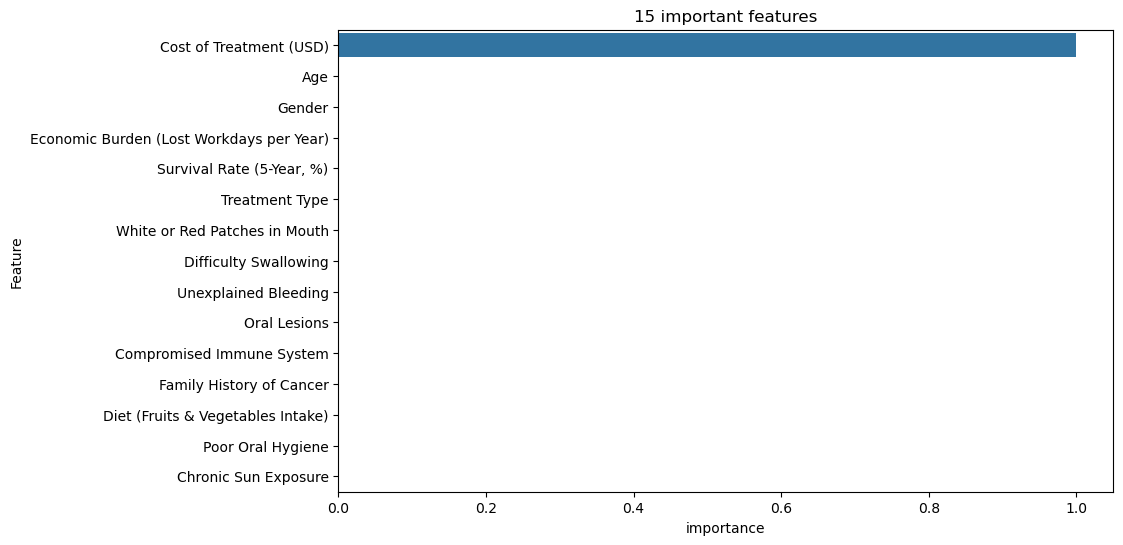

In [69]:
plt.figure(figsize=(10,6))
sns.barplot(x='importance',y='Feature',data=imp_df.head(15))
plt.title("15 important features")
plt.show()

In [70]:
X.head()

Age  Gender  Tobacco Use  Alcohol Consumption  HPV Infection  \
0   36       0            1                    1              1   
1   64       1            1                    1              1   
2   37       0            0                    1              0   
3   55       1            1                    1              0   
4   68       1            0                    0              0   

   Betel Quid Use  Chronic Sun Exposure  Poor Oral Hygiene  \
0               0                     0                  1   
1               0                     1                  1   
2               0                     1                  1   
3               1                     0                  1   
4               0                     0                  1   

   Diet (Fruits & Vegetables Intake)  Family History of Cancer  \
0                                  1                         0   
1                                  0                         0   
2                                  2                         0   
3                                  2                         0   
4                                  0                         0   

   Compromised Immune System  Oral Lesions  Unexplained Bleeding  \
0                          0             0                     0   
1                          0             0                     1   
2                          0             0                     0   
3                          0             1                     0   
4                          0             0                     0   

   Difficulty Swallowing  White or Red Patches in Mouth  Treatment Type  \
0                      0                              0               1   
1                      0                              0               1   
2                      0                              1               3   
3                      0                              0               1   
4                      0                              0               1   

   Survival Rate (5-Year, %)  Cost of Treatment (USD)  \
0                 100.000000                     0.00   
1                  83.340103                 77772.50   
2                  63.222871                101164.50   
3                 100.000000                     0.00   
4                  44.293199                 45354.75   

   Economic Burden (Lost Workdays per Year)  Early Diagnosis  
0                                         0                0  
1                                       177                0  
2                                       130                1  
3                                         0                1  
4                                        52                0

In [71]:
X=X.drop(['Cost of Treatment (USD)'],axis=1)

In [72]:
X.head()

Age  Gender  Tobacco Use  Alcohol Consumption  HPV Infection  \
0   36       0            1                    1              1   
1   64       1            1                    1              1   
2   37       0            0                    1              0   
3   55       1            1                    1              0   
4   68       1            0                    0              0   

   Betel Quid Use  Chronic Sun Exposure  Poor Oral Hygiene  \
0               0                     0                  1   
1               0                     1                  1   
2               0                     1                  1   
3               1                     0                  1   
4               0                     0                  1   

   Diet (Fruits & Vegetables Intake)  Family History of Cancer  \
0                                  1                         0   
1                                  0                         0   
2                                  2                         0   
3                                  2                         0   
4                                  0                         0   

   Compromised Immune System  Oral Lesions  Unexplained Bleeding  \
0                          0             0                     0   
1                          0             0                     1   
2                          0             0                     0   
3                          0             1                     0   
4                          0             0                     0   

   Difficulty Swallowing  White or Red Patches in Mouth  Treatment Type  \
0                      0                              0               1   
1                      0                              0               1   
2                      0                              1               3   
3                      0                              0               1   
4                      0                              0               1   

   Survival Rate (5-Year, %)  Economic Burden (Lost Workdays per Year)  \
0                 100.000000                                         0   
1                  83.340103                                       177   
2                  63.222871                                       130   
3                 100.000000                                         0   
4                  44.293199                                        52   

   Early Diagnosis  
0                0  
1                0  
2                1  
3                1  
4                0

In [73]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

print("X train shape",x_train.shape)
print("X test shape",x_test.shape)
print("Y train shape",y_train.shape)
print("Y test shape",y_test.shape)


X train shape (67937, 19)
X test shape (16985, 19)
Y train shape (67937,)
Y test shape (16985,)


In [74]:
# from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

In [75]:
rf_model = RandomForestClassifier(random_state=42)

# 2. Train the model
rf_model.fit(x_train, y_train)

# 3. Make predictions
y_pred = rf_model.predict(x_test)

# 4. Evaluate performance
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {acc:.4f}")
print(" Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 1.0000
 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8560
           1       1.00      1.00      1.00      8425

    accuracy                           1.00     16985
   macro avg       1.00      1.00      1.00     16985
weighted avg       1.00      1.00      1.00     16985



In [76]:
import pandas as pd

def show_feature_importance(model, feature_names, top_n=10):
    importance = model.feature_importances_
    feature_importance = pd.Series(importance, index=feature_names)
    top_features = feature_importance.sort_values(ascending=False).head(top_n)
    print(f"\n📊 Top {top_n} Important Features:")
    print(top_features)

# Call it
show_feature_importance(rf_model, x_train.columns)



📊 Top 10 Important Features:
Economic Burden (Lost Workdays per Year)    0.481078
Survival Rate (5-Year, %)                   0.371439
Treatment Type                              0.146966
Age                                         0.000186
Diet (Fruits & Vegetables Intake)           0.000048
Betel Quid Use                              0.000036
Poor Oral Hygiene                           0.000033
White or Red Patches in Mouth               0.000023
Alcohol Consumption                         0.000023
HPV Infection                               0.000023
dtype: float64


In [77]:
X=X.drop(['Economic Burden (Lost Workdays per Year)'],axis=1)

In [78]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

print("X train shape",x_train.shape)
print("X test shape",x_test.shape)
print("Y train shape",y_train.shape)
print("Y test shape",y_test.shape)

X train shape (67937, 18)
X test shape (16985, 18)
Y train shape (67937,)
Y test shape (16985,)


In [79]:
rf_model = RandomForestClassifier(random_state=42)

# 2. Train the model
rf_model.fit(x_train, y_train)

# 3. Make predictions
y_pred = rf_model.predict(x_test)

# 4. Evaluate performance
acc = accuracy_score(y_test, y_pred)
print(f"✅ Random Forest Accuracy: {acc:.4f}")
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

✅ Random Forest Accuracy: 1.0000

📄 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8560
           1       1.00      1.00      1.00      8425

    accuracy                           1.00     16985
   macro avg       1.00      1.00      1.00     16985
weighted avg       1.00      1.00      1.00     16985



In [80]:
import pandas as pd

def show_feature_importance(model, feature_names, top_n=10):
    importance = model.feature_importances_
    feature_importance = pd.Series(importance, index=feature_names)
    top_features = feature_importance.sort_values(ascending=False).head(top_n)
    print(f"Top {top_n} Important Features:")
    print(top_features)

# Call it
show_feature_importance(rf_model, x_train.columns)


Top 10 Important Features:
Survival Rate (5-Year, %)            0.740969
Treatment Type                       0.252742
Age                                  0.002554
Diet (Fruits & Vegetables Intake)    0.000413
Gender                               0.000298
Unexplained Bleeding                 0.000288
HPV Infection                        0.000275
Alcohol Consumption                  0.000268
Difficulty Swallowing                0.000266
Poor Oral Hygiene                    0.000259
dtype: float64


In [81]:
X=X.drop(['Survival Rate (5-Year, %)'],axis=1)

In [82]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

print("X train shape",x_train.shape)
print("X test shape",x_test.shape)
print("Y train shape",y_train.shape)
print("Y test shape",y_test.shape)

X train shape (67937, 17)
X test shape (16985, 17)
Y train shape (67937,)
Y test shape (16985,)


In [83]:
rf_model = RandomForestClassifier(random_state=42)

# 2. Train the model
rf_model.fit(x_train, y_train)

# 3. Make predictions
y_pred = rf_model.predict(x_test)

# 4. Evaluate performance
acc = accuracy_score(y_test, y_pred)
print(f"✅ Random Forest Accuracy: {acc:.4f}")
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

✅ Random Forest Accuracy: 0.8694

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      8560
           1       0.92      0.80      0.86      8425

    accuracy                           0.87     16985
   macro avg       0.88      0.87      0.87     16985
weighted avg       0.88      0.87      0.87     16985



In [84]:
import pandas as pd

def show_feature_importance(model, feature_names, top_n=10):
    importance = model.feature_importances_
    feature_importance = pd.Series(importance, index=feature_names)
    top_features = feature_importance.sort_values(ascending=False).head(top_n)
    print(f"Top {top_n} Important Features:")
    print(top_features)

# Call it
show_feature_importance(rf_model, x_train.columns)


Top 10 Important Features:
Treatment Type                       0.689821
Age                                  0.174234
Diet (Fruits & Vegetables Intake)    0.019454
Alcohol Consumption                  0.011526
HPV Infection                        0.010945
Difficulty Swallowing                0.010406
Gender                               0.010012
Betel Quid Use                       0.009877
Poor Oral Hygiene                    0.009695
Unexplained Bleeding                 0.009010
dtype: float64


In [85]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve,confusion_matrix


In [86]:
print("Precision Score: ",precision_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))

Precision Score:  0.9221768707482993
Recall Score:  0.8045103857566765
F1 Score:  0.8593343898573692


In [87]:
confusion_matrix(y_test,y_pred)

array([[7988,  572],
       [1647, 6778]], dtype=int64)

In [88]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [89]:
y_pred=dt.predict(x_test)

In [90]:
print("Precision Score: ",precision_score(y_test,y_pred))
print("Recall Score: ",recall_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))

Precision Score:  0.8436812515277439
Recall Score:  0.819347181008902
F1 Score:  0.8313361835370627


In [91]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [92]:
results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })
    

In [93]:
# import pandas as pd
results_df = pd.DataFrame(results)
results_df

Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.799470   1.000000  0.595727  0.746653
1           Random Forest  0.868001   0.920441  0.803323  0.857903
2  Support Vector Machine  0.784692   1.000000  0.565935  0.722808
3           Decision Tree  0.835502   0.844488  0.819228  0.831666
4             Naive Bayes  0.896026   1.000000  0.790386  0.882922

In [94]:
y_pred_nb=models['Naive Bayes'].predict(x_test)
confusion_matrix(y_test,y_pred_nb)

array([[8560,    0],
       [1766, 6659]], dtype=int64)

In [95]:
oral_cancer.head()

ID       Country  Age  Gender Tobacco Use Alcohol Consumption  \
0   1         Italy   38  Female         Yes                 Yes   
1   2         Japan   64    Male         Yes                 Yes   
2   3            UK   38  Female          No                 Yes   
3   4     Sri Lanka   55    Male         Yes                 Yes   
4   5  South Africa   68    Male          No                  No   

  HPV Infection Betel Quid Use Chronic Sun Exposure Poor Oral Hygiene  \
0           Yes             No                   No               Yes   
1           Yes             No                  Yes               Yes   
2            No             No                  Yes               Yes   
3            No            Yes                   No               Yes   
4            No             No                   No               Yes   

  Diet (Fruits & Vegetables Intake) Family History of Cancer  \
0                               Low                       No   
1                              High                       No   
2                          Moderate                       No   
3                          Moderate                       No   
4                              High                       No   

  Compromised Immune System Oral Lesions Unexplained Bleeding  \
0                        No           No                   No   
1                        No           No                  Yes   
2                        No           No                   No   
3                        No          Yes                   No   
4                        No           No                   No   

  Difficulty Swallowing White or Red Patches in Mouth  Tumor Size (cm)  \
0                    No                            No         0.000000   
1                    No                            No         1.782186   
2                    No                           Yes         3.523895   
3                    No                            No         0.000000   
4                    No                            No         2.834789   

  Cancer Stage Treatment Type  Survival Rate (5-Year, %)  \
0            0   No Treatment                 100.000000   
1            1   No Treatment                  83.340103   
2            2        Surgery                  63.222871   
3            0   No Treatment                 100.000000   
4            3   No Treatment                  44.293199   

   Cost of Treatment (USD)  Economic Burden (Lost Workdays per Year)  \
0                     0.00                                         0   
1                 77772.50                                       177   
2                101164.50                                       130   
3                     0.00                                         0   
4                 45354.75                                        52   

  Early Diagnosis Oral Cancer (Diagnosis) Age Group  
0              No                      No     31-50  
1              No                     Yes     51-70  
2             Yes                     Yes     31-50  
3             Yes                      No     51-70  
4              No                     Yes     51-70

# As the data is clean and there is no learning and we were also asked to go for the prediction of tumor size 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [4]:
df=pd.read_csv('oral_cancer_prediction_dataset.csv')
df.head()

ID       Country  Age  Gender Tobacco Use Alcohol Consumption  \
0   1         Italy   36  Female         Yes                 Yes   
1   2         Japan   64    Male         Yes                 Yes   
2   3            UK   37  Female          No                 Yes   
3   4     Sri Lanka   55    Male         Yes                 Yes   
4   5  South Africa   68    Male          No                  No   

  HPV Infection Betel Quid Use Chronic Sun Exposure Poor Oral Hygiene  \
0           Yes             No                   No               Yes   
1           Yes             No                  Yes               Yes   
2            No             No                  Yes               Yes   
3            No            Yes                   No               Yes   
4            No             No                   No               Yes   

  Diet (Fruits & Vegetables Intake) Family History of Cancer  \
0                               Low                       No   
1                              High                       No   
2                          Moderate                       No   
3                          Moderate                       No   
4                              High                       No   

  Compromised Immune System Oral Lesions Unexplained Bleeding  \
0                        No           No                   No   
1                        No           No                  Yes   
2                        No           No                   No   
3                        No          Yes                   No   
4                        No           No                   No   

  Difficulty Swallowing White or Red Patches in Mouth  Tumor Size (cm)  \
0                    No                            No         0.000000   
1                    No                            No         1.782186   
2                    No                           Yes         3.523895   
3                    No                            No         0.000000   
4                    No                            No         2.834789   

   Cancer Stage Treatment Type  Survival Rate (5-Year, %)  \
0             0   No Treatment                 100.000000   
1             1   No Treatment                  83.340103   
2             2        Surgery                  63.222871   
3             0   No Treatment                 100.000000   
4             3   No Treatment                  44.293199   

   Cost of Treatment (USD)  Economic Burden (Lost Workdays per Year)  \
0                     0.00                                         0   
1                 77772.50                                       177   
2                101164.50                                       130   
3                     0.00                                         0   
4                 45354.75                                        52   

  Early Diagnosis Oral Cancer (Diagnosis)  
0              No                      No  
1              No                     Yes  
2             Yes                     Yes  
3             Yes                      No  
4              No                     Yes

In [5]:
df=df[df['Oral Cancer (Diagnosis)']=='Yes']
df.head()

ID       Country  Age  Gender Tobacco Use Alcohol Consumption  \
1   2         Japan   64    Male         Yes                 Yes   
2   3            UK   37  Female          No                 Yes   
4   5  South Africa   68    Male          No                  No   
5   6        Taiwan   70    Male         Yes                  No   
6   7           USA   41  Female         Yes                 Yes   

  HPV Infection Betel Quid Use Chronic Sun Exposure Poor Oral Hygiene  \
1           Yes             No                  Yes               Yes   
2            No             No                  Yes               Yes   
4            No             No                   No               Yes   
5           Yes            Yes                   No               Yes   
6            No             No                   No                No   

  Diet (Fruits & Vegetables Intake) Family History of Cancer  \
1                              High                       No   
2                          Moderate                       No   
4                              High                       No   
5                          Moderate                      Yes   
6                          Moderate                       No   

  Compromised Immune System Oral Lesions Unexplained Bleeding  \
1                        No           No                  Yes   
2                        No           No                   No   
4                        No           No                   No   
5                        No          Yes                  Yes   
6                        No           No                   No   

  Difficulty Swallowing White or Red Patches in Mouth  Tumor Size (cm)  \
1                    No                            No         1.782186   
2                    No                           Yes         3.523895   
4                    No                            No         2.834789   
5                    No                            No         1.692675   
6                   Yes                           Yes         5.794843   

   Cancer Stage Treatment Type  Survival Rate (5-Year, %)  \
1             1   No Treatment                  83.340103   
2             2        Surgery                  63.222871   
4             3   No Treatment                  44.293199   
5             2        Surgery                  67.407275   
6             1   No Treatment                  80.798132   

   Cost of Treatment (USD)  Economic Burden (Lost Workdays per Year)  \
1                 77772.50                                       177   
2                101164.50                                       130   
4                 45354.75                                        52   
5                 96504.00                                        91   
6                 86131.25                                       105   

  Early Diagnosis Oral Cancer (Diagnosis)  
1              No                     Yes  
2             Yes                     Yes  
4              No                     Yes  
5             Yes                     Yes  
6             Yes                     Yes

In [6]:
df.shape

(42349, 25)

In [7]:
df1=df.copy()

In [8]:
df.drop(['ID'],axis=1,inplace=True)

In [9]:
df.head()

Country  Age  Gender Tobacco Use Alcohol Consumption HPV Infection  \
1         Japan   64    Male         Yes                 Yes           Yes   
2            UK   37  Female          No                 Yes            No   
4  South Africa   68    Male          No                  No            No   
5        Taiwan   70    Male         Yes                  No           Yes   
6           USA   41  Female         Yes                 Yes            No   

  Betel Quid Use Chronic Sun Exposure Poor Oral Hygiene  \
1             No                  Yes               Yes   
2             No                  Yes               Yes   
4             No                   No               Yes   
5            Yes                   No               Yes   
6             No                   No                No   

  Diet (Fruits & Vegetables Intake) Family History of Cancer  \
1                              High                       No   
2                          Moderate                       No   
4                              High                       No   
5                          Moderate                      Yes   
6                          Moderate                       No   

  Compromised Immune System Oral Lesions Unexplained Bleeding  \
1                        No           No                  Yes   
2                        No           No                   No   
4                        No           No                   No   
5                        No          Yes                  Yes   
6                        No           No                   No   

  Difficulty Swallowing White or Red Patches in Mouth  Tumor Size (cm)  \
1                    No                            No         1.782186   
2                    No                           Yes         3.523895   
4                    No                            No         2.834789   
5                    No                            No         1.692675   
6                   Yes                           Yes         5.794843   

   Cancer Stage Treatment Type  Survival Rate (5-Year, %)  \
1             1   No Treatment                  83.340103   
2             2        Surgery                  63.222871   
4             3   No Treatment                  44.293199   
5             2        Surgery                  67.407275   
6             1   No Treatment                  80.798132   

   Cost of Treatment (USD)  Economic Burden (Lost Workdays per Year)  \
1                 77772.50                                       177   
2                101164.50                                       130   
4                 45354.75                                        52   
5                 96504.00                                        91   
6                 86131.25                                       105   

  Early Diagnosis Oral Cancer (Diagnosis)  
1              No                     Yes  
2             Yes                     Yes  
4              No                     Yes  
5             Yes                     Yes  
6             Yes                     Yes

In [10]:
df.isnull().sum()

Country                                     0
Age                                         0
Gender                                      0
Tobacco Use                                 0
Alcohol Consumption                         0
HPV Infection                               0
Betel Quid Use                              0
Chronic Sun Exposure                        0
Poor Oral Hygiene                           0
Diet (Fruits & Vegetables Intake)           0
Family History of Cancer                    0
Compromised Immune System                   0
Oral Lesions                                0
Unexplained Bleeding                        0
Difficulty Swallowing                       0
White or Red Patches in Mouth               0
Tumor Size (cm)                             0
Cancer Stage                                0
Treatment Type                              0
Survival Rate (5-Year, %)                   0
Cost of Treatment (USD)                     0
Economic Burden (Lost Workdays per

In [11]:
df.duplicated().sum()

0

In [12]:
num_cols=df.select_dtypes(include=np.number).columns

cat_cols=df.select_dtypes(include='object').columns

print(f"Numeric columns: {num_cols}")
print(f"categoric columns: {cat_cols}")

Numeric columns: Index(['Age', 'Tumor Size (cm)', 'Cancer Stage', 'Survival Rate (5-Year, %)',
       'Cost of Treatment (USD)', 'Economic Burden (Lost Workdays per Year)'],
      dtype='object')
categoric columns: Index(['Country', 'Gender', 'Tobacco Use', 'Alcohol Consumption',
       'HPV Infection', 'Betel Quid Use', 'Chronic Sun Exposure',
       'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)',
       'Family History of Cancer', 'Compromised Immune System', 'Oral Lesions',
       'Unexplained Bleeding', 'Difficulty Swallowing',
       'White or Red Patches in Mouth', 'Treatment Type', 'Early Diagnosis',
       'Oral Cancer (Diagnosis)'],
      dtype='object')


<Axes: xlabel='Survival Rate (5-Year, %)', ylabel='Cost of Treatment (USD)'>

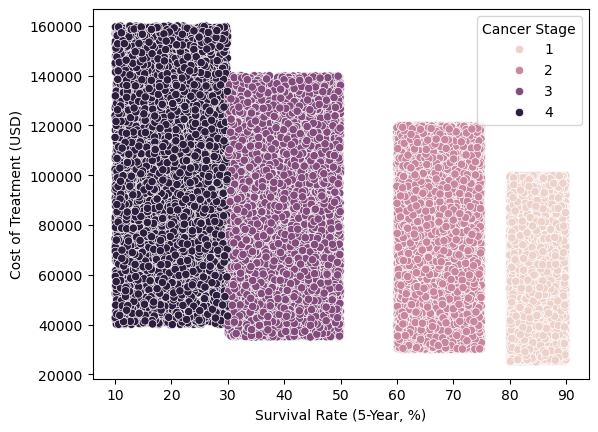

In [13]:
sns.scatterplot(x=df['Survival Rate (5-Year, %)'],y=df['Cost of Treatment (USD)'],hue=df['Cancer Stage'])

## Uni-Variate 


#### Numeric

In [14]:
df[num_cols].describe()

Age  Tumor Size (cm)  Cancer Stage  Survival Rate (5-Year, %)  \
count  42349.000000     42349.000000  42349.000000               42349.000000   
mean      54.532622         3.503831      2.243430                  58.898313   
std       10.011347         1.447166      1.039136                  23.655481   
min       15.000000         1.000007      1.000000                  10.000750   
25%       48.000000         2.258968      1.000000                  38.196128   
50%       55.000000         3.487791      2.000000                  65.158245   
75%       61.000000         4.765300      3.000000                  81.674937   
max      101.000000         5.999899      4.000000                  89.999502   

       Cost of Treatment (USD)  Economic Burden (Lost Workdays per Year)  
count             42349.000000                               42349.00000  
mean              78426.629554                                 104.33198  
std               30416.432636                                  43.08324  
min               25008.750000                                  30.00000  
25%               53480.000000                                  67.00000  
50%               76605.000000                                 104.00000  
75%               99067.500000                                 141.00000  
max              159988.000000                                 179.00000

- **Age**: The dataset spans a wide age range (15 to 101), with a median age of 55, suggesting a focus on middle-aged and older individuals.
- **Tumor Size**: Tumor sizes range from 1.000007 cm to 5.999899 cm, with a median of 3.487791 cm, indicating that most tumors are moderate in size.
- **Cancer Stage**: The median cancer stage is 2, with 75% of individuals having a stage of 3 or lower, suggesting early to moderate stages of cancer are more common.
- **Survival Rate (5-Year, %)**: The survival rate ranges from 10.000750% to 89.999502%, with a median of 65.158245%, indicating a moderate survival rate for most individuals.
- **Cost of Treatment (USD)**: Treatment costs range from $25,008.75 to $159,988, with a median of $76,605, highlighting the financial burden of treatment.
- **Economic Burden (Lost Workdays per Year)**: Lost workdays range from 30 to 179 days, with a median of 104 days, showing the significant economic impact of the disease.

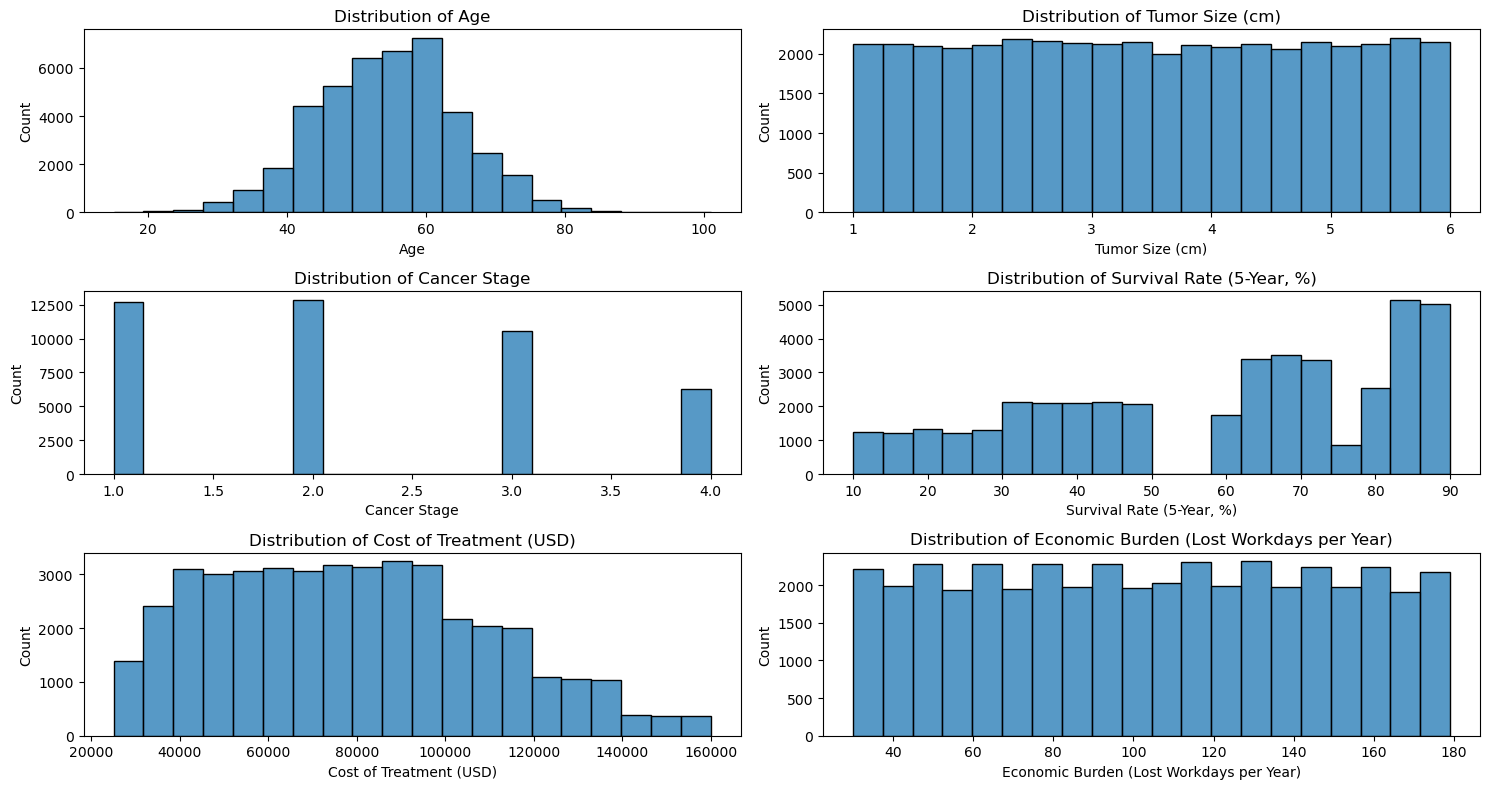

In [15]:
plt.figure(figsize=(15,8))
t=1

for col in num_cols:
    plt.subplot(3,2,t)
    sns.histplot(df[col],bins=20)
    plt.title(f"Distribution of {col}")
    t+=1
    
plt.tight_layout()
plt.show()

1. Age: The distribution of age shows a concentration of individuals in the middle-aged group, with fewer individuals at the extremes (younger and older ages).
2. Tumor Size (cm): Tumor sizes are mostly concentrated in the lower range, indicating that most individuals have smaller tumors.
3. Cancer Stage: The majority of individuals are in the early stages of cancer, with fewer cases in advanced stages.
4. Survival Rate (5-Year, %): The survival rate is skewed towards higher percentages, suggesting that many individuals have a good prognosis.
5. Cost of Treatment (USD): Treatment costs vary widely, with a significant number of individuals incurring moderate to high costs.
6. Economic Burden (Lost Workdays per Year): The economic burden is concentrated in the lower range, but there are notable cases with a high number of lost workdays.

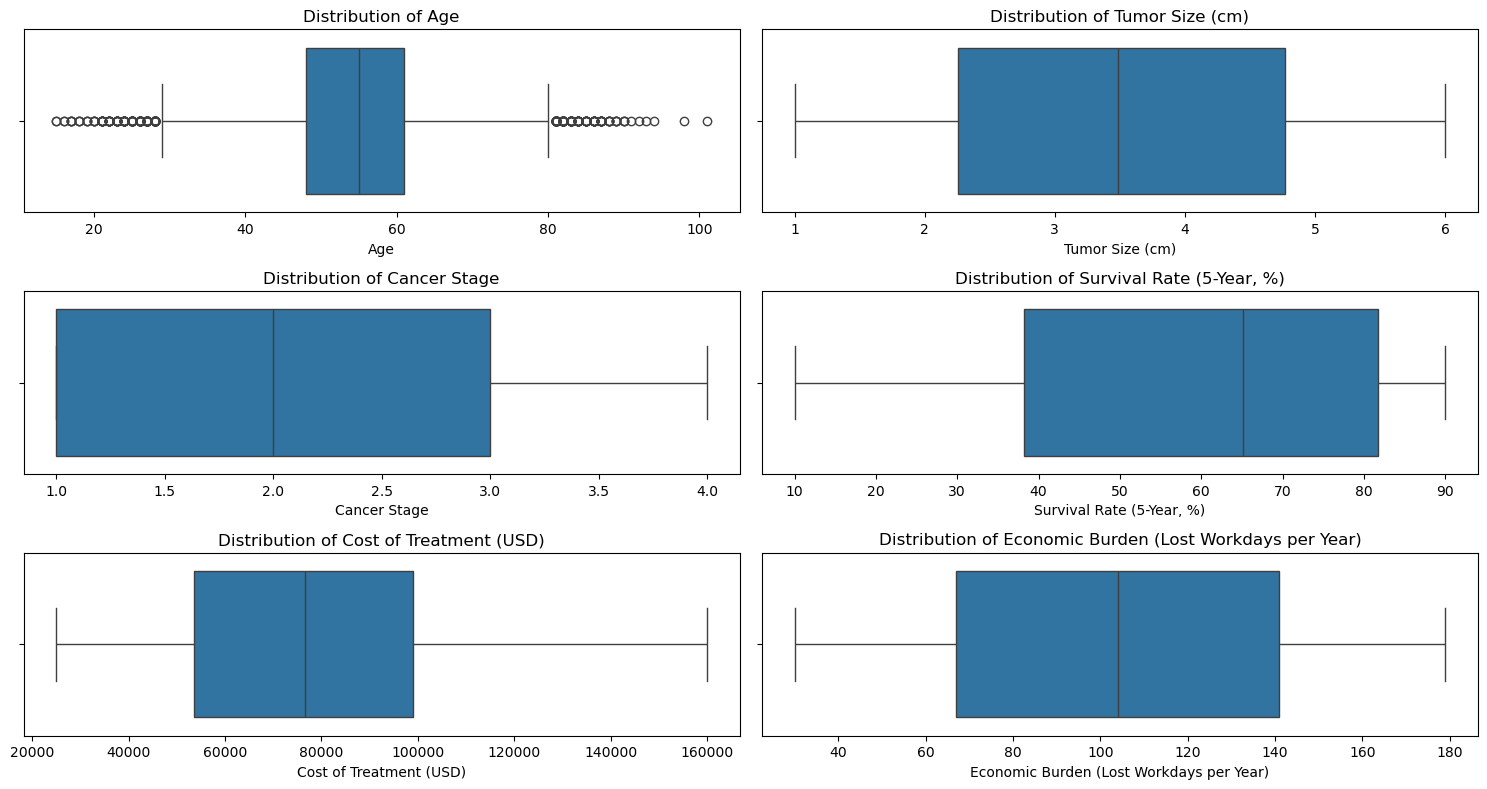

In [16]:
plt.figure(figsize=(15,8))
t=1

for col in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(x=df[col])
    plt.title(f"Distribution of {col}")
    t+=1
    
plt.tight_layout()
plt.show()

#### Categoric

In [17]:
df[cat_cols].describe().T

count unique           top   freq
Country                            42349     17      Pakistan   4062
Gender                             42349      2          Male  30103
Tobacco Use                        42349      2           Yes  33937
Alcohol Consumption                42349      2           Yes  25369
HPV Infection                      42349      2            No  29692
Betel Quid Use                     42349      2            No  30039
Chronic Sun Exposure               42349      2            No  33955
Poor Oral Hygiene                  42349      2            No  21361
Diet (Fruits & Vegetables Intake)  42349      3      Moderate  16961
Family History of Cancer           42349      2            No  38138
Compromised Immune System          42349      2            No  38013
Oral Lesions                       42349      2            No  29649
Unexplained Bleeding               42349      2            No  33860
Difficulty Swallowing              42349      2            No  31770
White or Red Patches in Mouth      42349      2            No  27434
Treatment Type                     42349      5  Chemotherapy   8529
Early Diagnosis                    42349      2           Yes  23208
Oral Cancer (Diagnosis)            42349      1           Yes  42349

1. **Country**: The dataset includes individuals from 17 countries, with the highest representation from Pakistan (4062 individuals).

2. **Gender**: The majority of individuals in the dataset are male (30103), indicating a higher prevalence or reporting of oral cancer among males.

3. **Tobacco Use**: A significant portion of the individuals (33937) reported using tobacco, highlighting its strong association with oral cancer.

4. **Alcohol Consumption**: Alcohol consumption is prevalent among 25369 individuals, suggesting its potential role as a risk factor.

5. **HPV Infection**: Most individuals (29692) do not have HPV infection, but its presence in the remaining cases may still be a contributing factor.

6. **Betel Quid Use**: The majority (30039) do not use betel quid, but its use among others could be a significant risk factor.

7. **Chronic Sun Exposure**: Most individuals (33955) do not report chronic sun exposure, indicating it may not be a primary risk factor in this dataset.

8. **Poor Oral Hygiene**: A considerable number of individuals (21361) report poor oral hygiene, which could be a contributing factor to oral cancer.

9. **Diet (Fruits & Vegetables Intake)**: The most common dietary pattern is moderate intake (16961), suggesting a potential area for dietary improvement to reduce risk.

10. **Family History of Cancer**: A large majority (38138) do not have a family history of cancer, indicating that genetic predisposition may not be the primary factor for most cases.

11. **Compromised Immune System**: Most individuals (38013) do not have a compromised immune system, suggesting other factors may play a larger role.

12. **Oral Lesions**: The majority (29649) do not have oral lesions, but their presence in others could be an early indicator of oral cancer.

13. **Unexplained Bleeding**: Most individuals (33860) do not report unexplained bleeding, indicating it may not be a common symptom.

14. **Difficulty Swallowing**: A majority (31770) do not report difficulty swallowing, but its presence in others could indicate advanced stages.

15. **White or Red Patches in Mouth**: Most individuals (27434) do not have white or red patches, but their presence could be an early warning sign.

16. **Treatment Type**: Chemotherapy is the most common treatment type (8529), followed by other treatments, indicating its widespread use in managing oral cancer.

17. **Early Diagnosis**: A significant portion (23208) received an early diagnosis, emphasizing the importance of early detection in improving outcomes.

18. **Oral Cancer (Diagnosis)**: All individuals in the dataset have been diagnosed with oral cancer, as expected from the dataset's focus.

* As all the values present in the column Oral Cancer (Diagnosis) is only 'Yes' so we can drop that column 

In [18]:
df.drop(['Oral Cancer (Diagnosis)'],axis=1,inplace=True)

In [19]:
df.head()

Country  Age  Gender Tobacco Use Alcohol Consumption HPV Infection  \
1         Japan   64    Male         Yes                 Yes           Yes   
2            UK   37  Female          No                 Yes            No   
4  South Africa   68    Male          No                  No            No   
5        Taiwan   70    Male         Yes                  No           Yes   
6           USA   41  Female         Yes                 Yes            No   

  Betel Quid Use Chronic Sun Exposure Poor Oral Hygiene  \
1             No                  Yes               Yes   
2             No                  Yes               Yes   
4             No                   No               Yes   
5            Yes                   No               Yes   
6             No                   No                No   

  Diet (Fruits & Vegetables Intake) Family History of Cancer  \
1                              High                       No   
2                          Moderate                       No   
4                              High                       No   
5                          Moderate                      Yes   
6                          Moderate                       No   

  Compromised Immune System Oral Lesions Unexplained Bleeding  \
1                        No           No                  Yes   
2                        No           No                   No   
4                        No           No                   No   
5                        No          Yes                  Yes   
6                        No           No                   No   

  Difficulty Swallowing White or Red Patches in Mouth  Tumor Size (cm)  \
1                    No                            No         1.782186   
2                    No                           Yes         3.523895   
4                    No                            No         2.834789   
5                    No                            No         1.692675   
6                   Yes                           Yes         5.794843   

   Cancer Stage Treatment Type  Survival Rate (5-Year, %)  \
1             1   No Treatment                  83.340103   
2             2        Surgery                  63.222871   
4             3   No Treatment                  44.293199   
5             2        Surgery                  67.407275   
6             1   No Treatment                  80.798132   

   Cost of Treatment (USD)  Economic Burden (Lost Workdays per Year)  \
1                 77772.50                                       177   
2                101164.50                                       130   
4                 45354.75                                        52   
5                 96504.00                                        91   
6                 86131.25                                       105   

  Early Diagnosis  
1              No  
2             Yes  
4              No  
5             Yes  
6             Yes

In [20]:
cat_cols=df.select_dtypes(include='object').columns

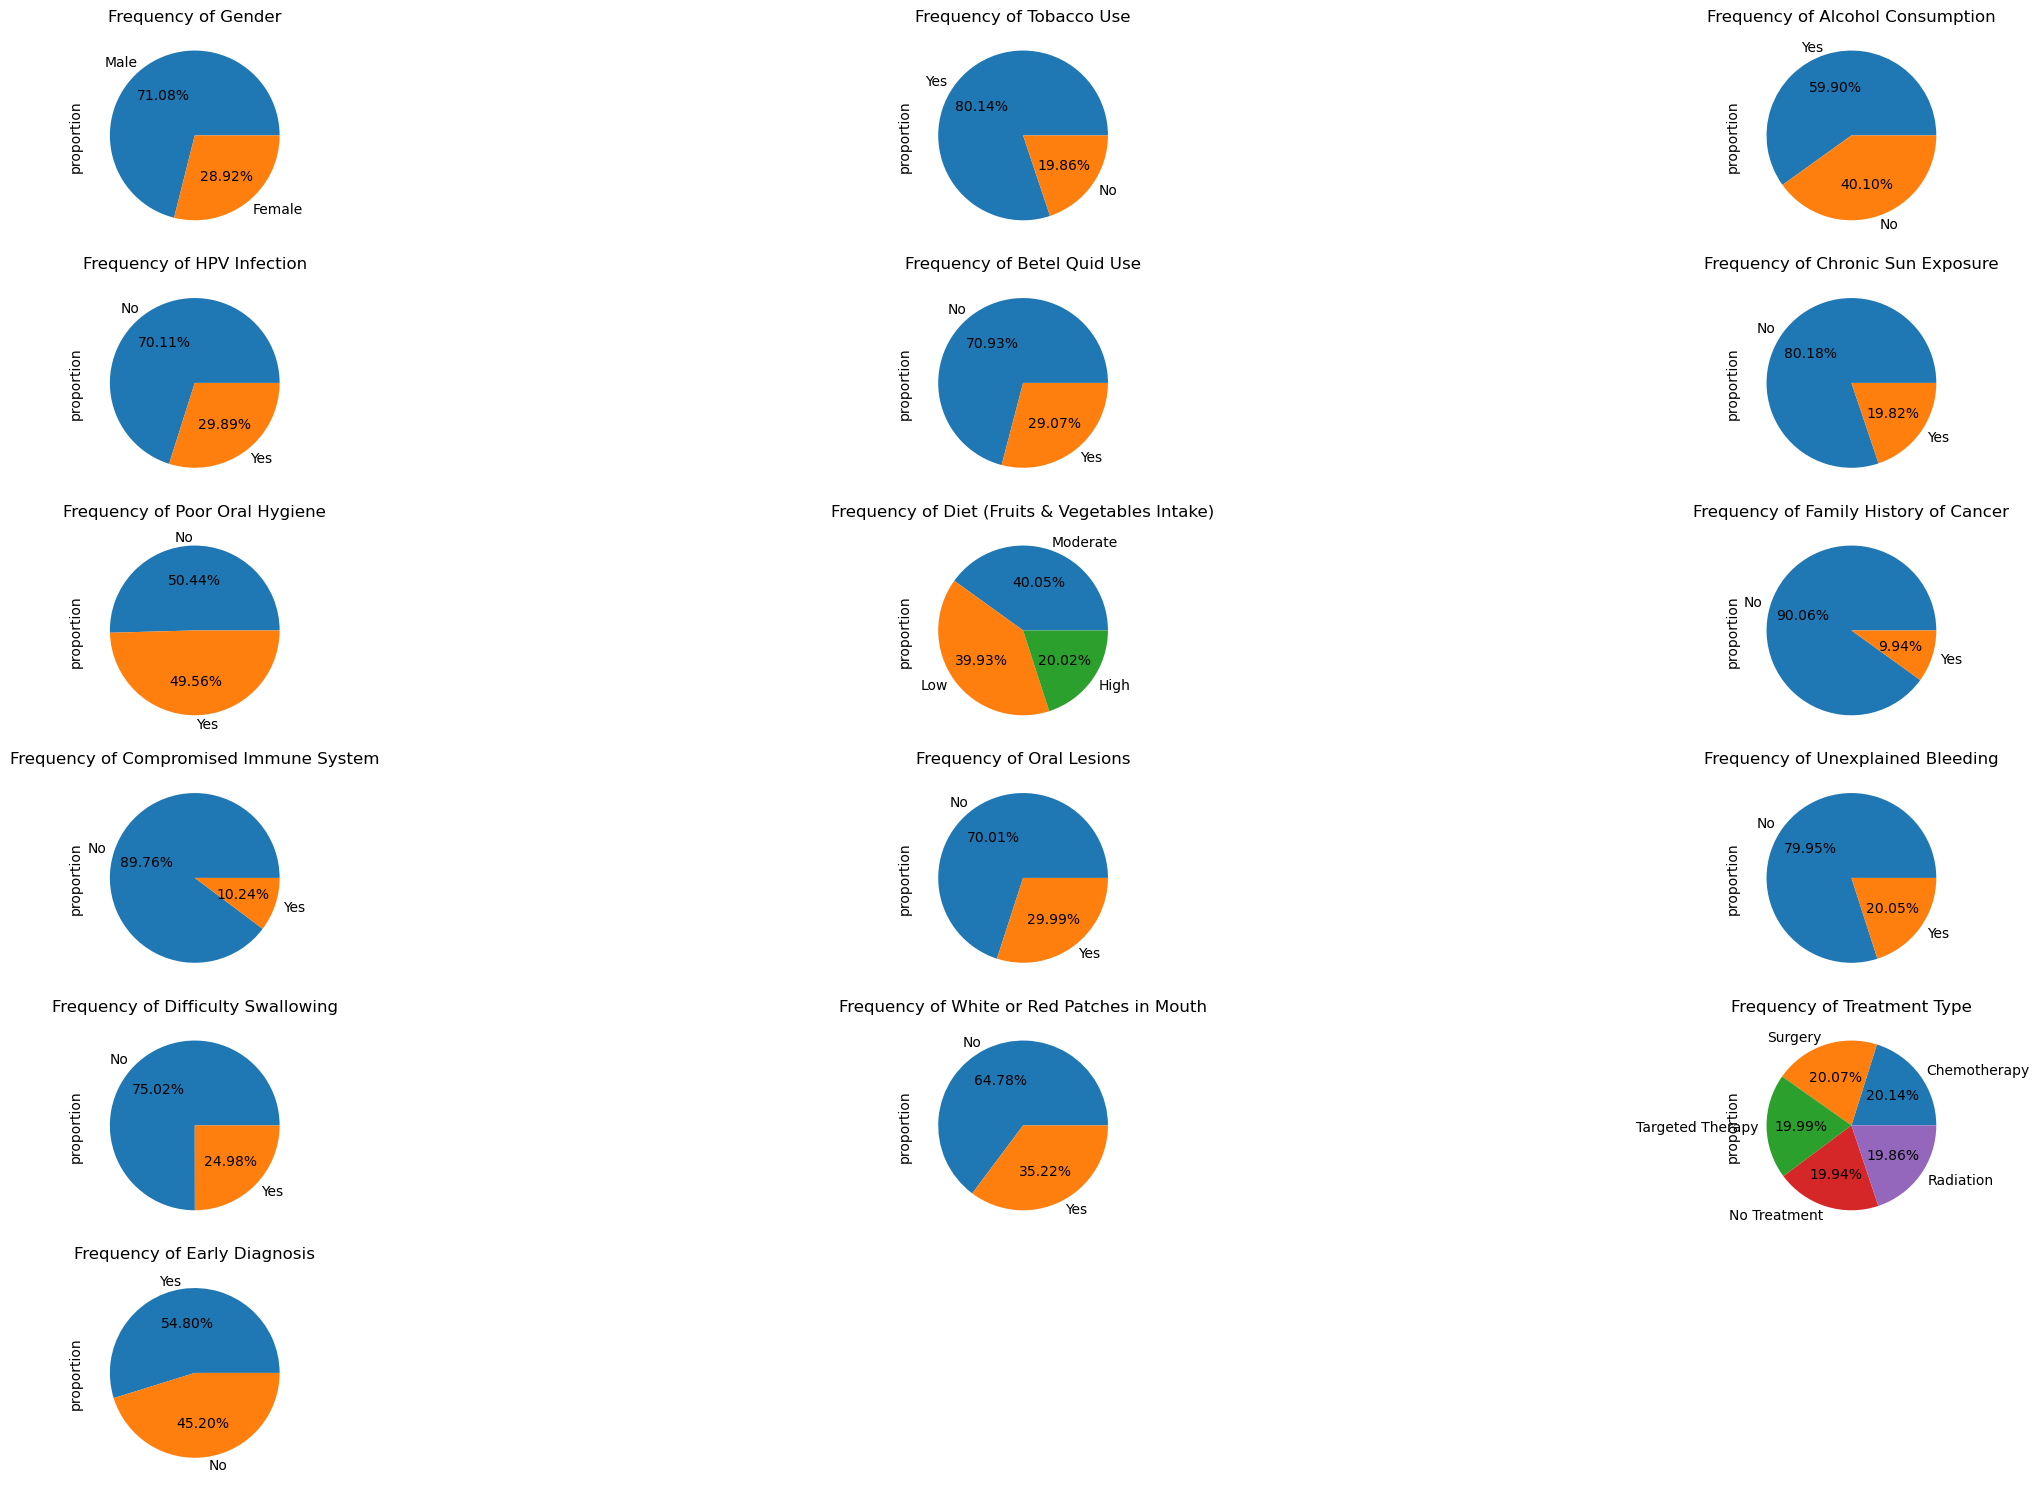

In [21]:
# Checking the frequency of values in each column
plt.figure(figsize=(25,15))
t=1
for col in cat_cols:
    if col!='Country':
        plt.subplot(6,3,t)
        df[col].value_counts(normalize=True).plot(kind='pie',autopct='%.2f%%')
        plt.title(f"Frequency of {col}")
        t+=1
plt.tight_layout()
plt.show()

In [22]:
df['Country'].value_counts(normalize=True)*100

Country
Pakistan        9.591726
India           9.407542
Sri Lanka       9.395735
Taiwan          9.343786
USA             5.778177
Germany         5.747479
Russia          5.690807
Italy           5.662471
Brazil          5.657749
UK              5.655387
France          5.650665
Kenya           3.837163
Egypt           3.808827
Australia       3.754516
Japan           3.726180
Nigeria         3.714373
South Africa    3.577416
Name: proportion, dtype: float64

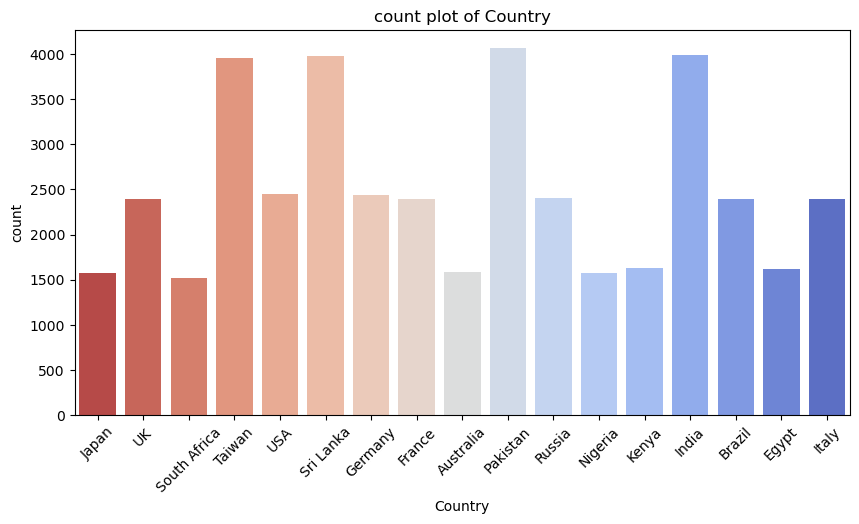

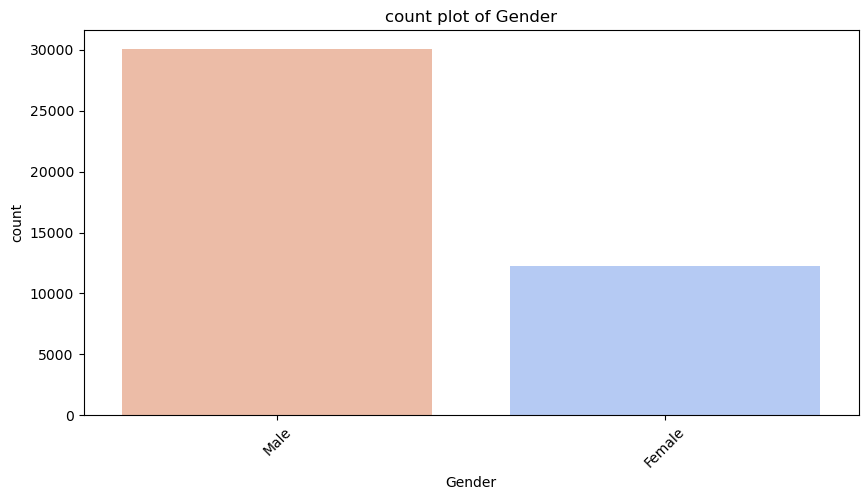

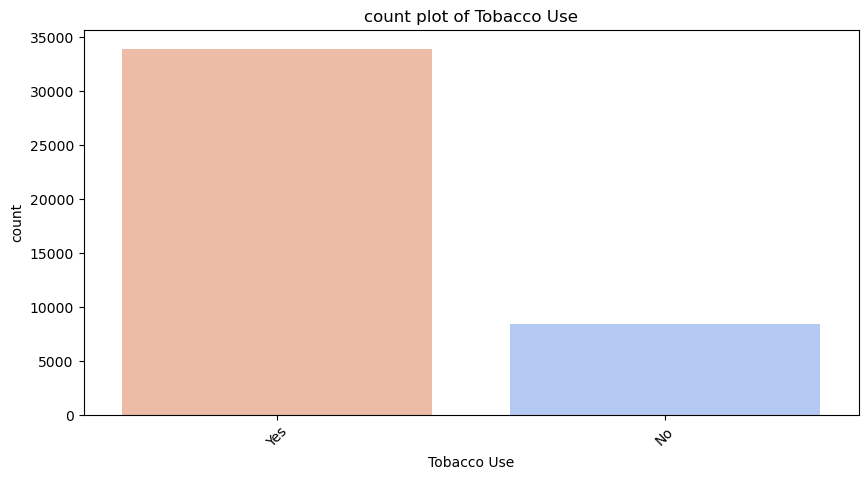

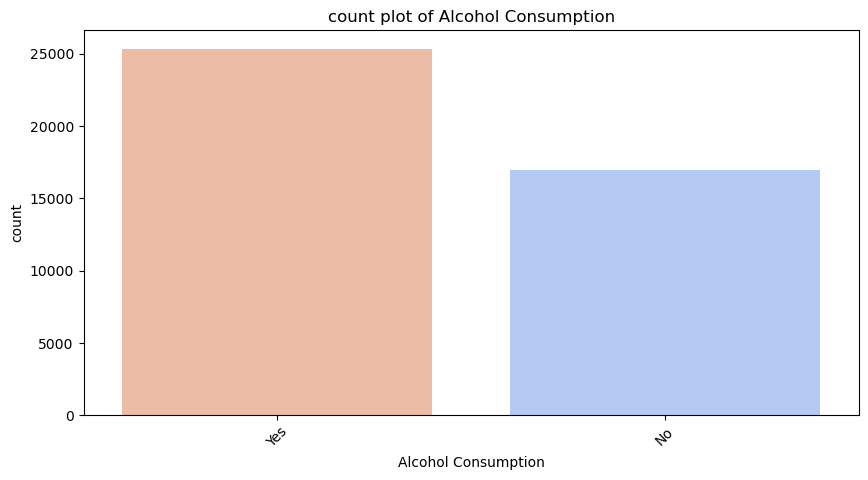

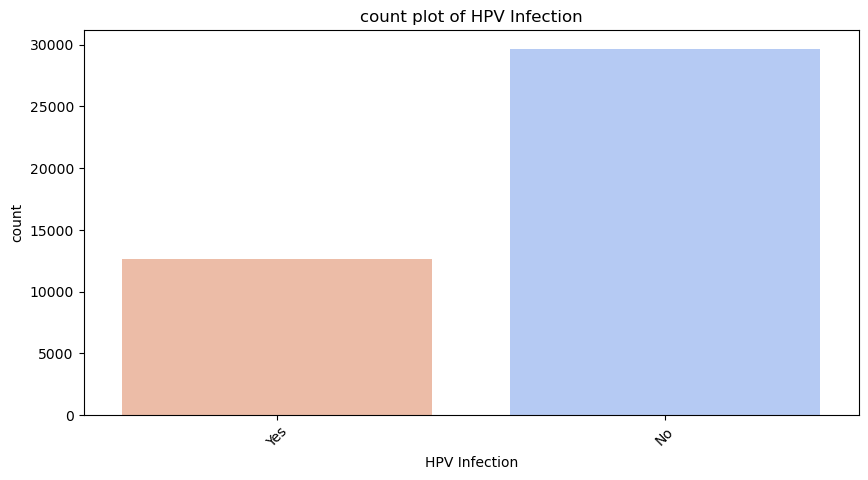

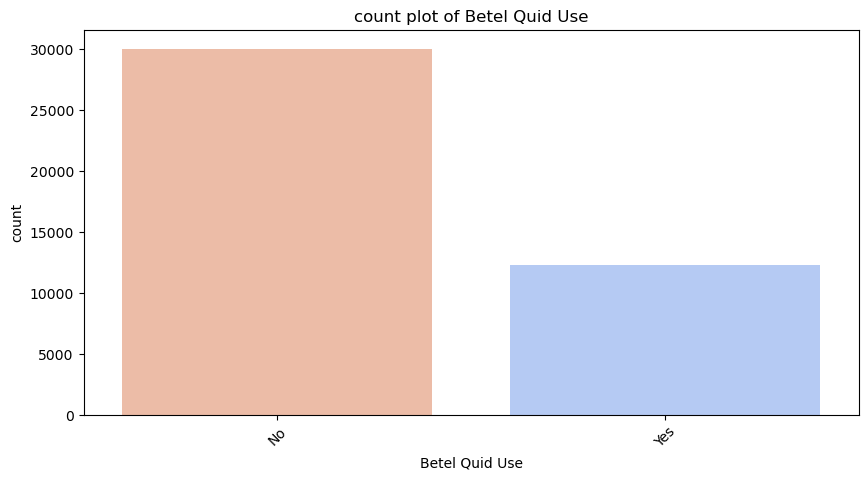

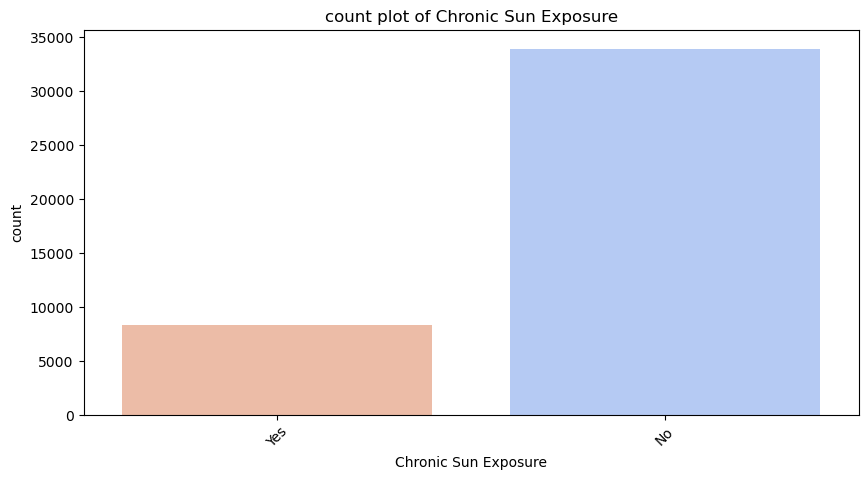

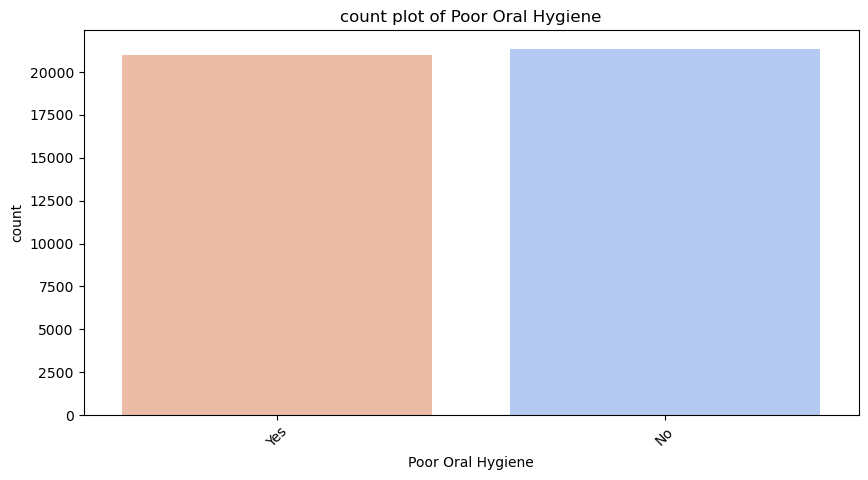

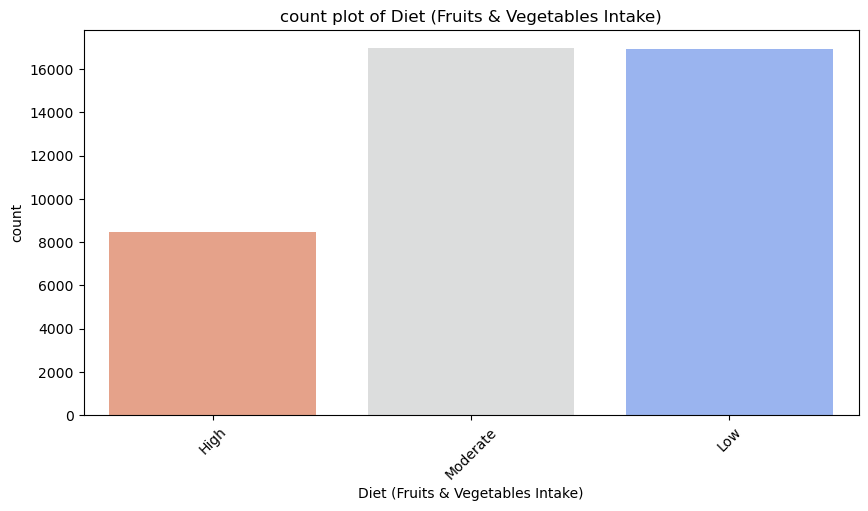

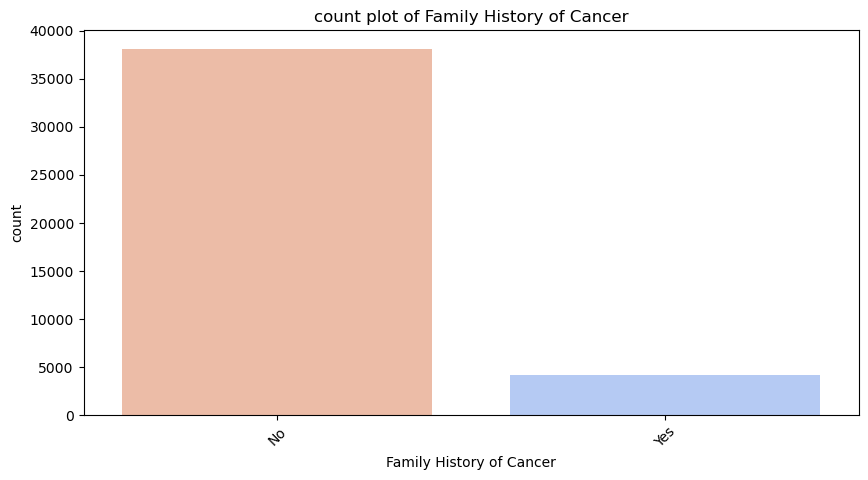

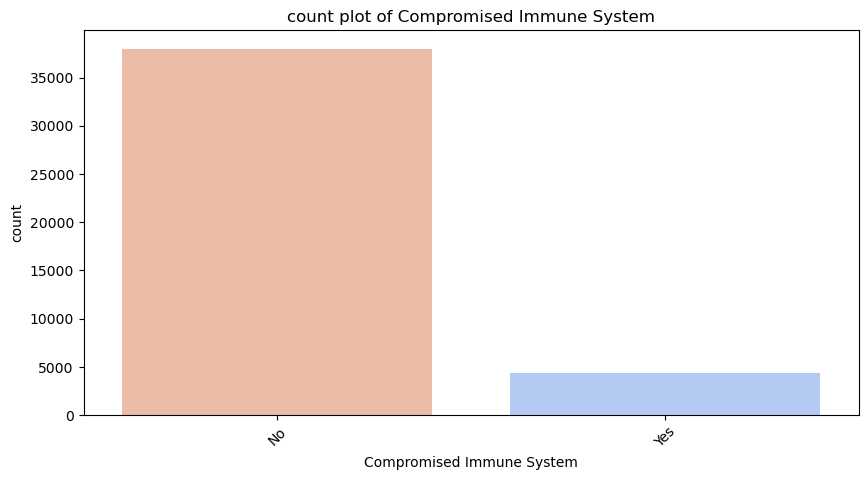

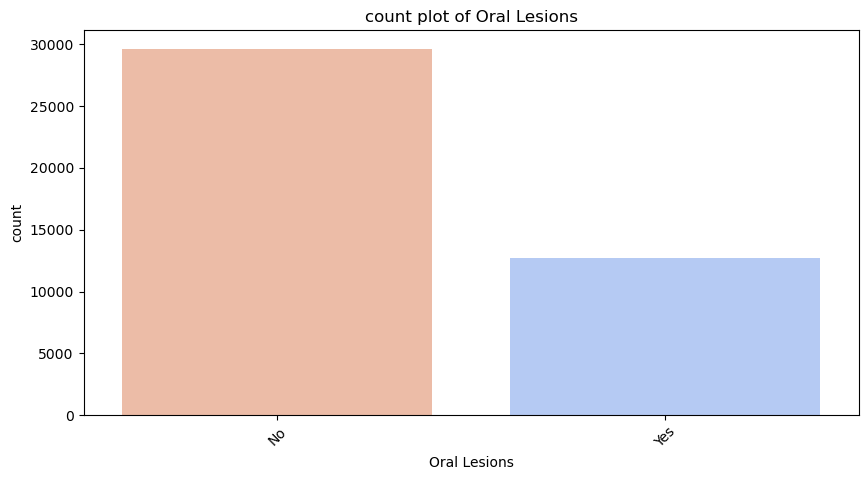

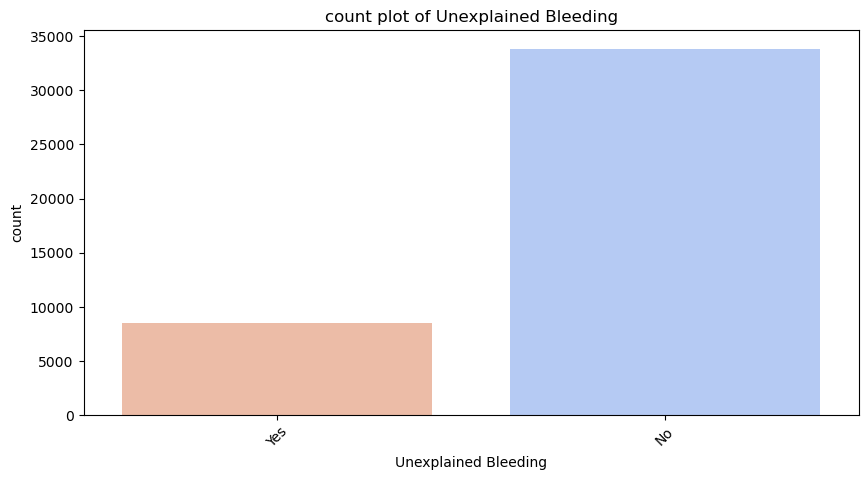

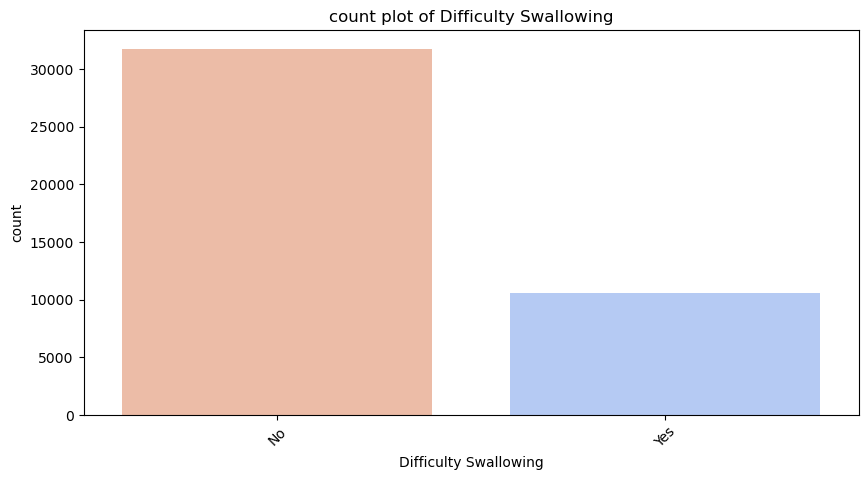

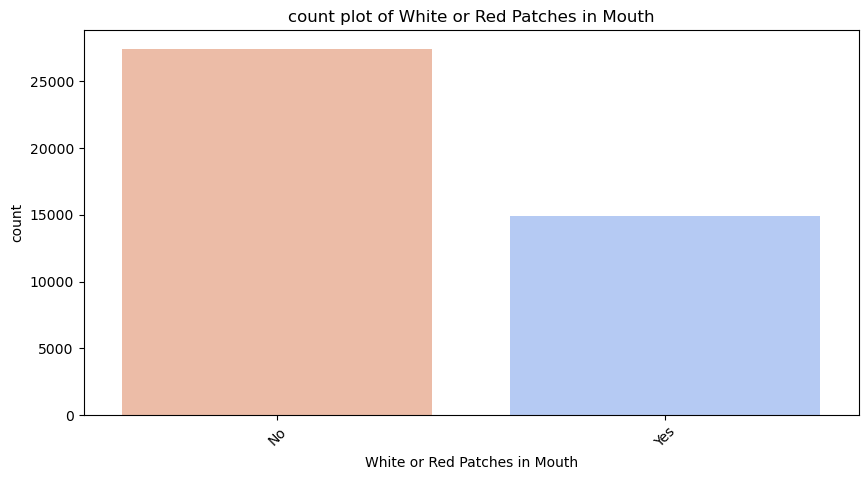

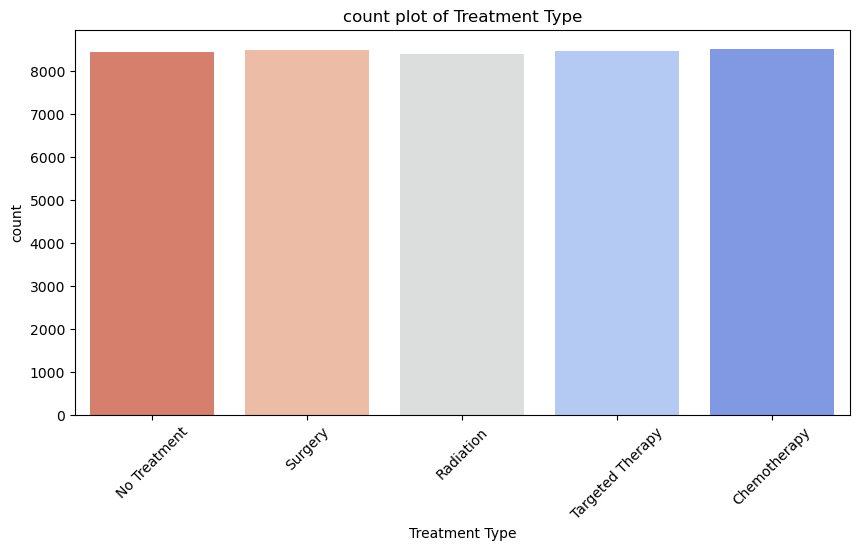

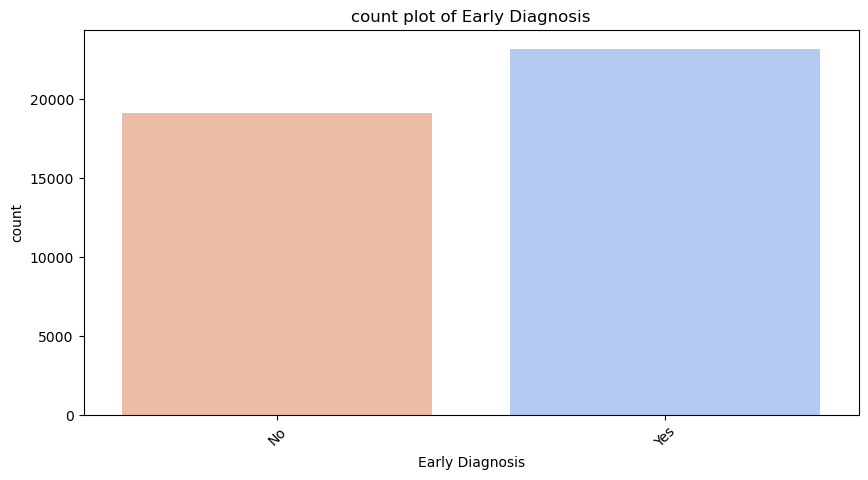

In [23]:
# t=1
# plt.figure(figsize=(15,12))
for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df,x=col,palette='coolwarm_r')
    plt.xticks(rotation=45)
    plt.title(f"count plot of {col}")
    plt.show()

### Inferences from Barplots:

1. **Tobacco Use**: The majority of individuals in the dataset reported using tobacco, highlighting its strong association with oral cancer.

2. **Alcohol Consumption**: A significant portion of individuals reported alcohol consumption, suggesting its potential role as a risk factor for oral cancer.

3. **HPV Infection**: Most individuals do not have HPV infection, but its presence in some cases may still contribute to oral cancer risk.

4. **Betel Quid Use**: The majority of individuals do not use betel quid, but its use among others could be a significant risk factor.

5. **Chronic Sun Exposure**: Most individuals do not report chronic sun exposure, indicating it may not be a primary risk factor in this dataset.

6. **Poor Oral Hygiene**: A considerable number of individuals report poor oral hygiene, which could be a contributing factor to oral cancer.

7. **Diet (Fruits & Vegetables Intake)**: Moderate intake of fruits and vegetables is the most common dietary pattern, suggesting a potential area for dietary improvement to reduce oral cancer risk.

8. **Family History of Cancer**: A large majority of individuals do not have a family history of cancer, indicating that genetic predisposition may not be the primary factor for most cases.

9. **Compromised Immune System**: Most individuals do not have a compromised immune system, suggesting other factors may play a larger role in oral cancer development.

10. **Oral Lesions**: The majority of individuals do not have oral lesions, but their presence in others could be an early indicator of oral cancer.

11. **Unexplained Bleeding**: Most individuals do not report unexplained bleeding, indicating it may not be a common symptom of oral cancer.

12. **Difficulty Swallowing**: A majority of individuals do not report difficulty swallowing, but its presence in others could indicate advanced stages of oral cancer.

13. **White or Red Patches in Mouth**: Most individuals do not have white or red patches in their mouths, but their presence could be an early warning sign of oral cancer.

14. **Treatment Type**: Chemotherapy is the most common treatment type, followed by other treatments, indicating its widespread use in managing oral cancer.

15. **Early Diagnosis**: A significant portion of individuals received an early diagnosis, emphasizing the importance of early detection in improving outcomes.

### Bi-Variate Analysis
#### Num vs Num

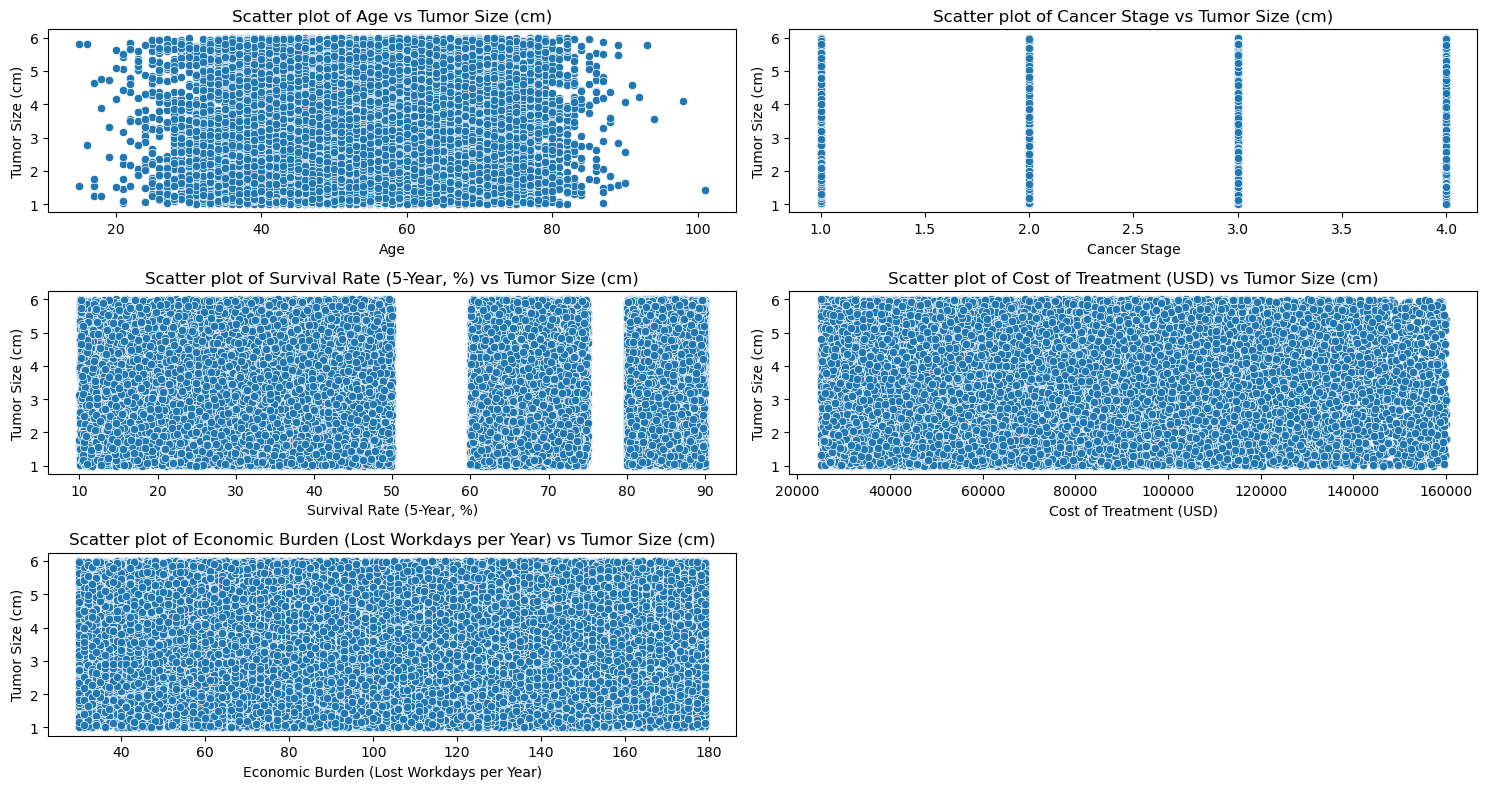

In [24]:
plt.figure(figsize=(15,8))
t=1
for col in num_cols:
    if col!='Tumor Size (cm)':
        plt.subplot(3,2,t)
        sns.scatterplot(x=df[col],y=df['Tumor Size (cm)'])
        plt.title(f"Scatter plot of {col} vs Tumor Size (cm)")
        t+=1
plt.tight_layout()
plt.show()

#### No inference can be drawn from the scatter plot of Tumor Size (cm) with other columns

<Axes: >

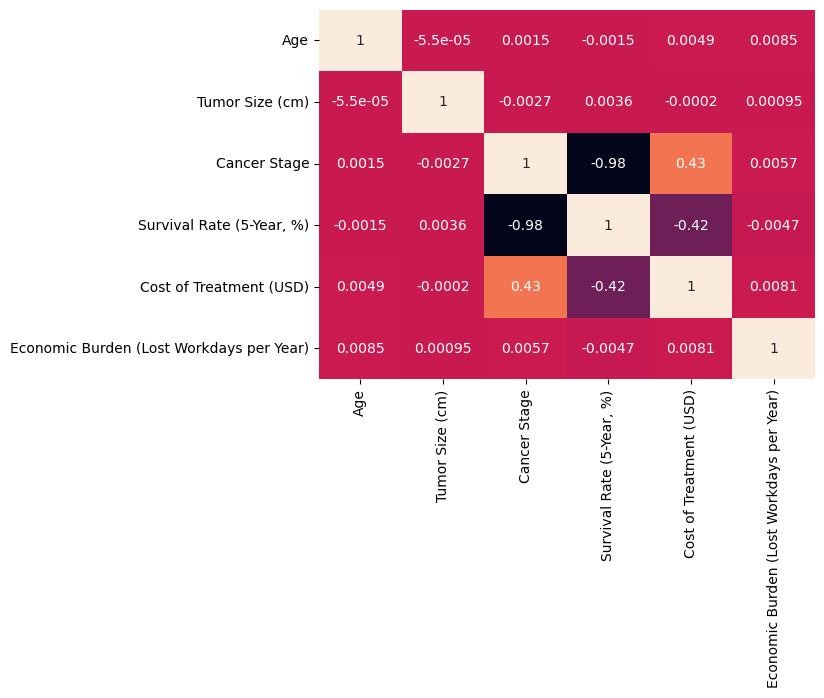

In [25]:
# Here the Target variable is Tumor Size (cm)
sns.heatmap(df[num_cols].corr(),annot=True,cbar=False)

In [26]:
df['Cancer Stage'].value_counts(normalize=True)

Cancer Stage
2    0.303785
1    0.300196
3    0.248412
4    0.147607
Name: proportion, dtype: float64

1. **Age and Tumor Size (cm)**: There is a weak positive correlation between age and tumor size, indicating that tumor size does not significantly increase with age.

2. **Tumor Size (cm) and Cancer Stage**: A moderate positive correlation exists between tumor size and cancer stage, suggesting that larger tumors are associated with more advanced cancer stages.

3. **Survival Rate (5-Year, %) and Cancer Stage**: A strong negative correlation is observed, indicating that higher cancer stages are associated with lower survival rates.

4. **Cost of Treatment (USD) and Cancer Stage**: A weak positive correlation suggests that treatment costs slightly increase with advanced cancer stages.

5. **Economic Burden (Lost Workdays per Year) and Cancer Stage**: A moderate positive correlation indicates that advanced cancer stages are associated with a higher economic burden in terms of lost workdays.

6. **Survival Rate (5-Year, %) and Tumor Size (cm)**: A weak negative correlation suggests that larger tumor sizes are associated with slightly lower survival rates.

7. **Cost of Treatment (USD) and Economic Burden (Lost Workdays per Year)**: A weak positive correlation indicates that higher treatment costs are associated with a slightly higher economic burden.

#### Target vs Categorical cols

In [27]:
cat_cols.nunique()

17

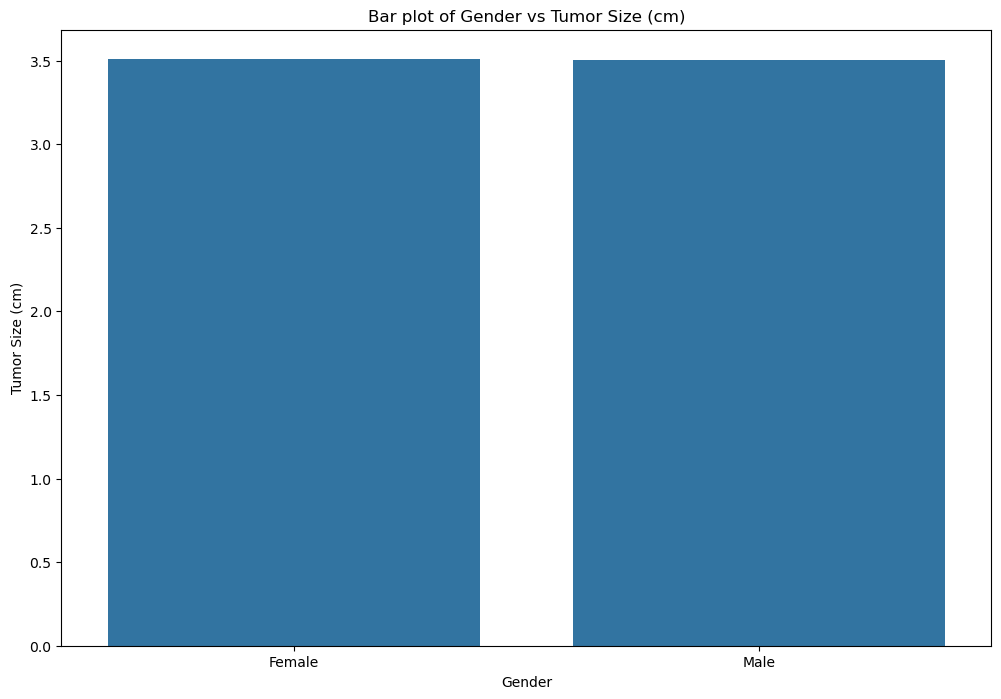

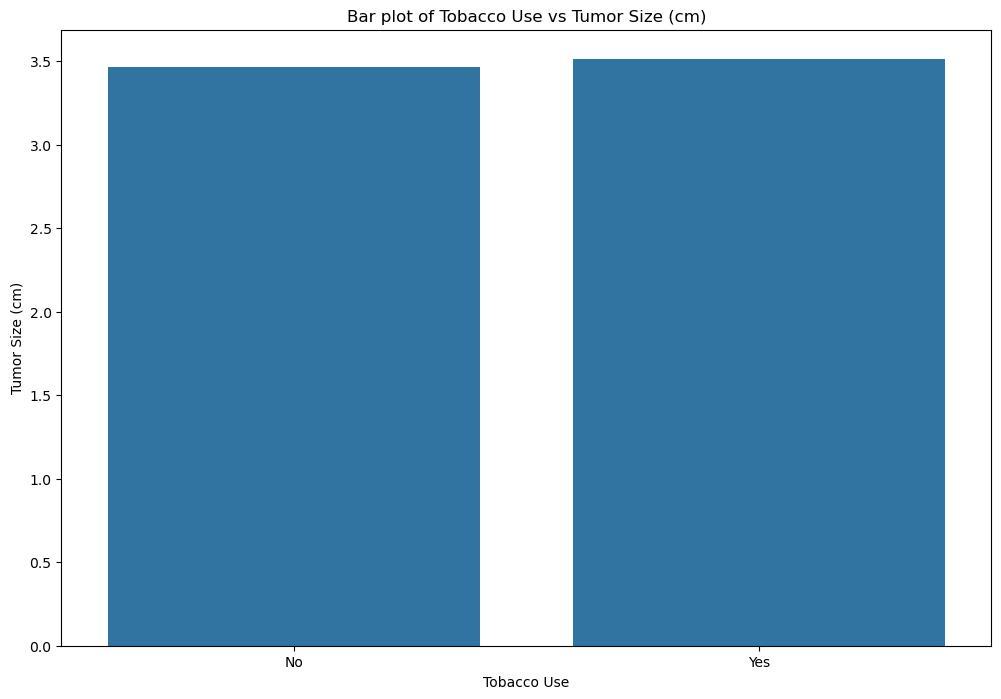

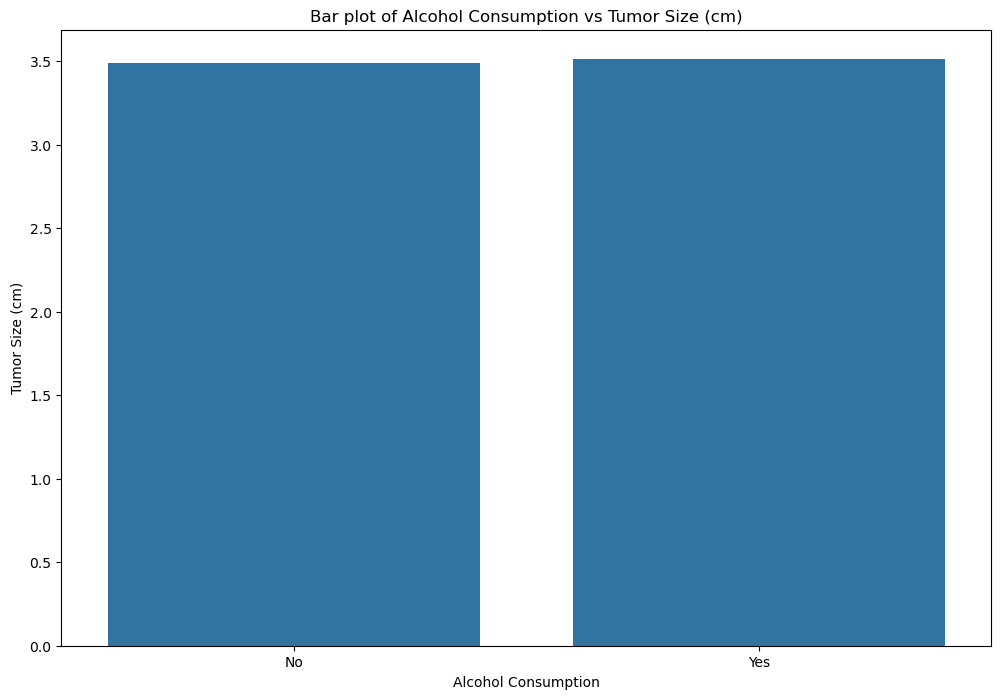

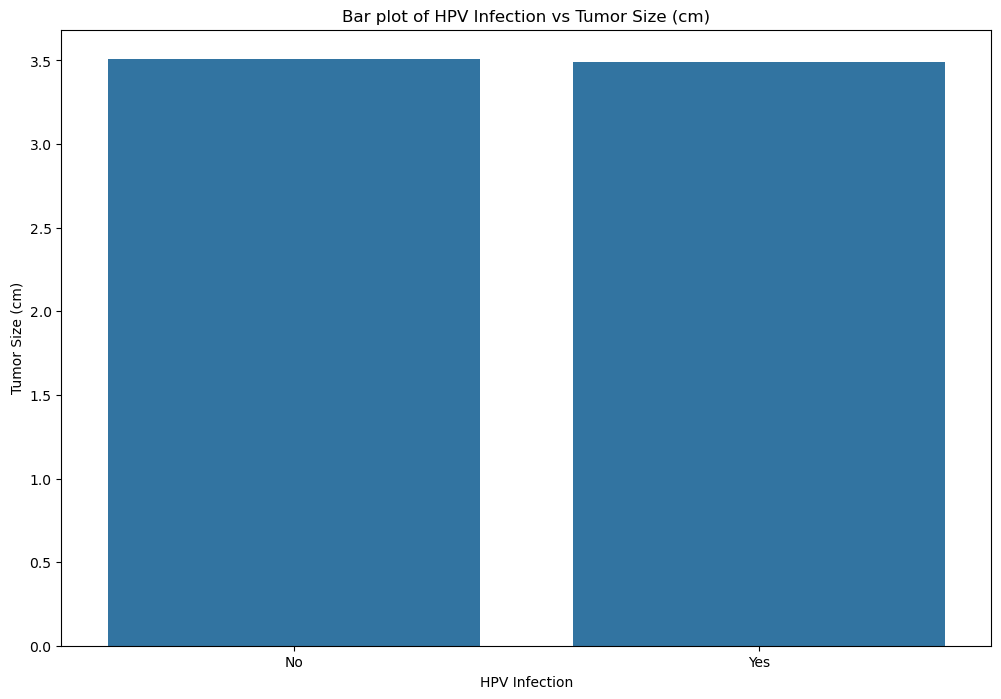

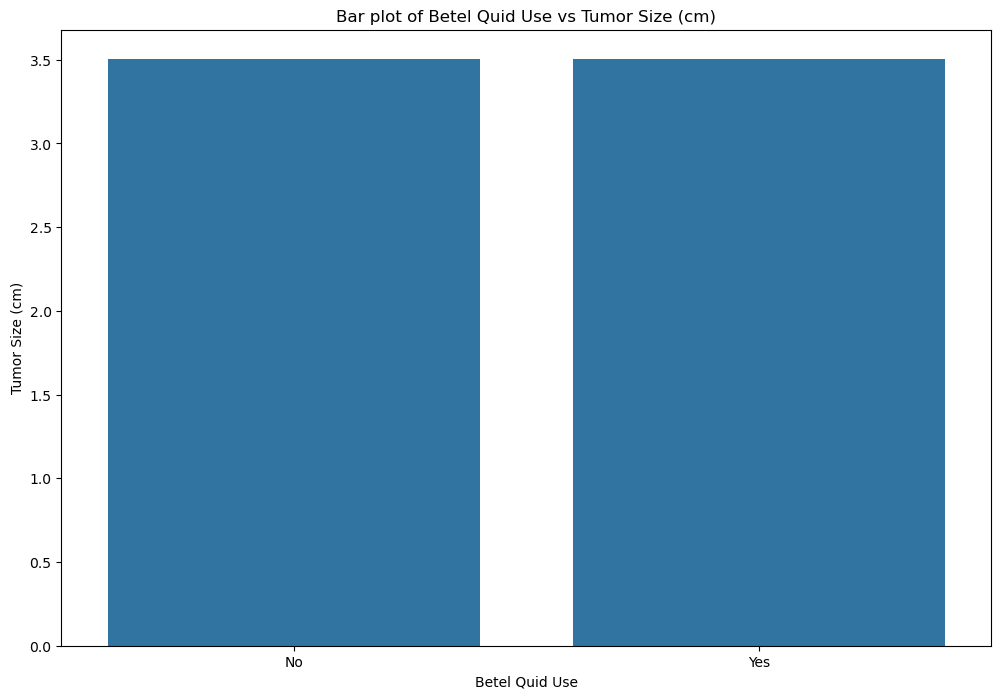

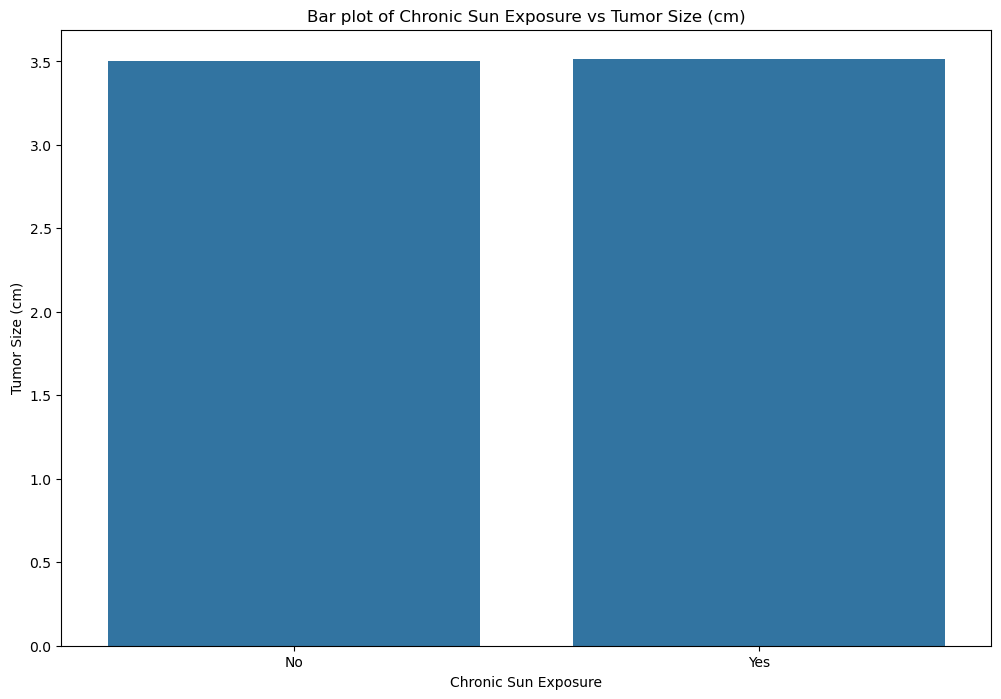

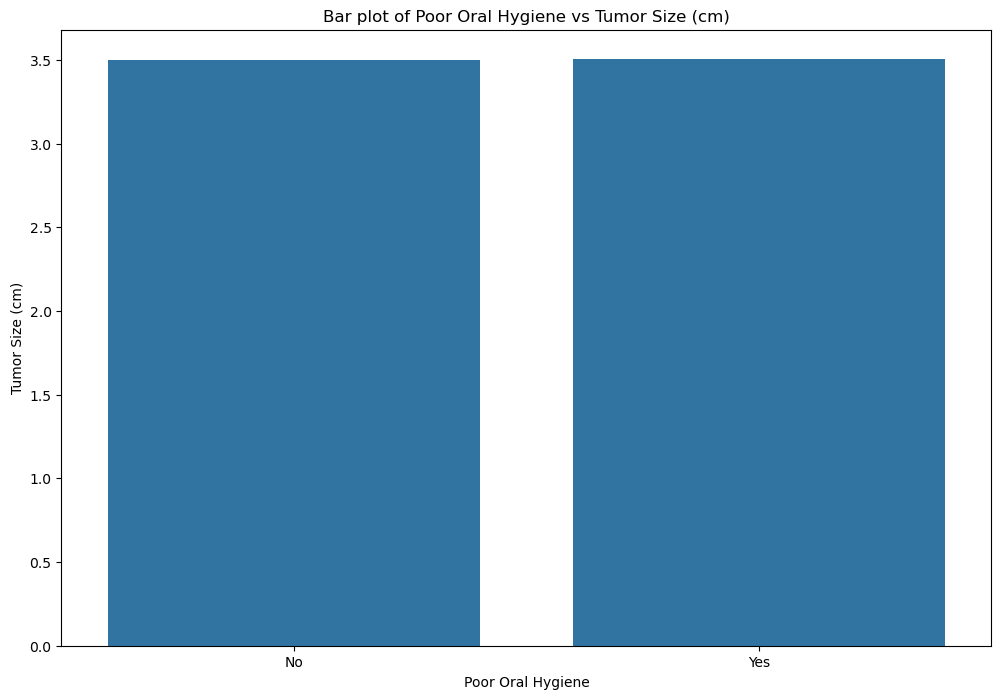

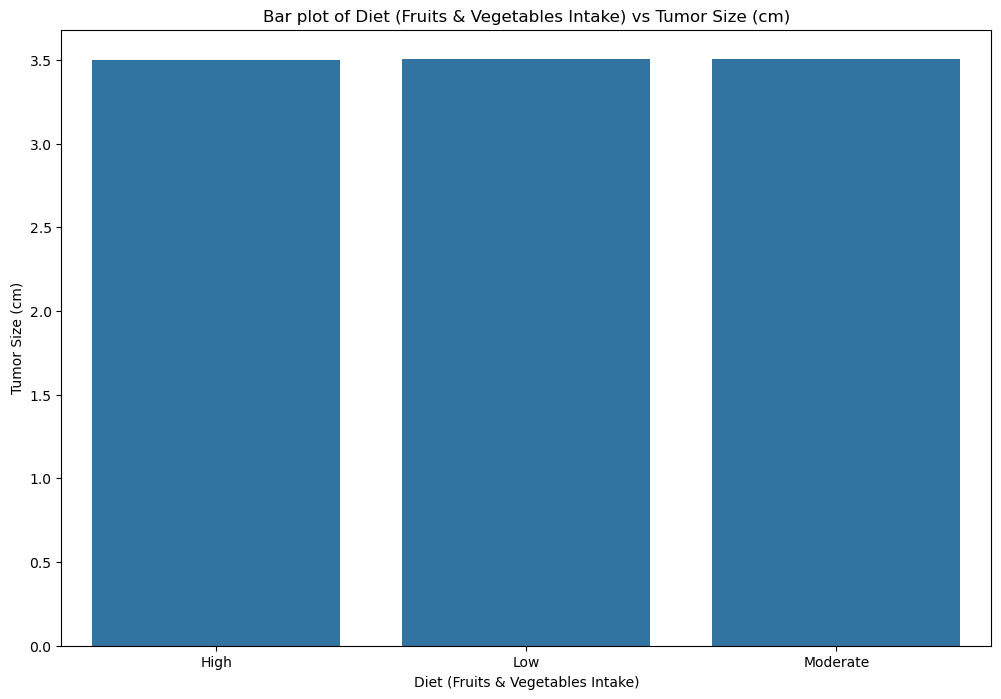

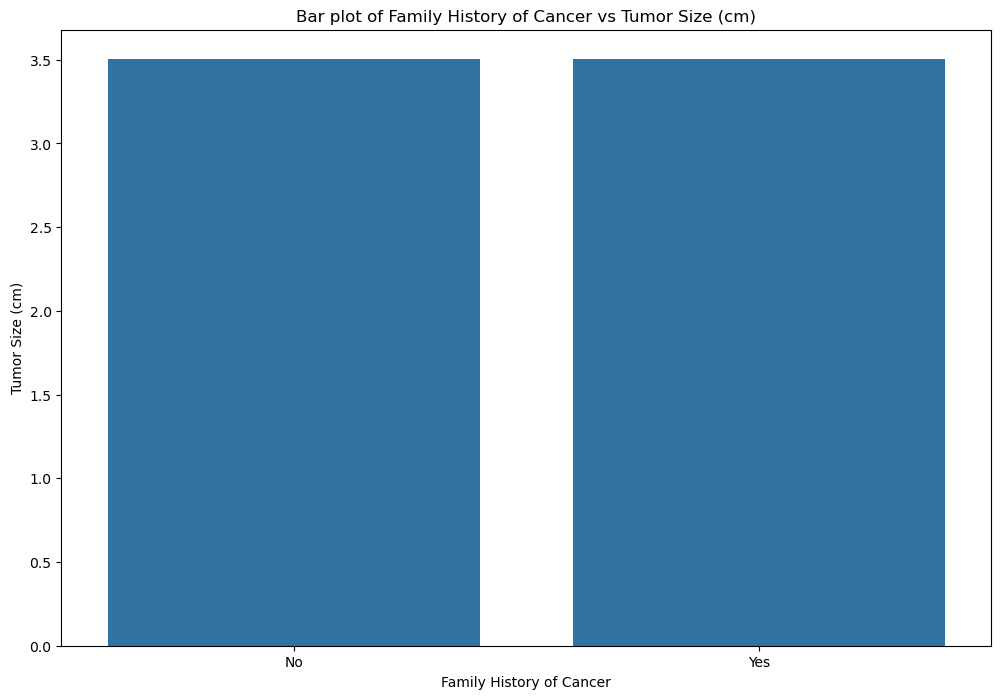

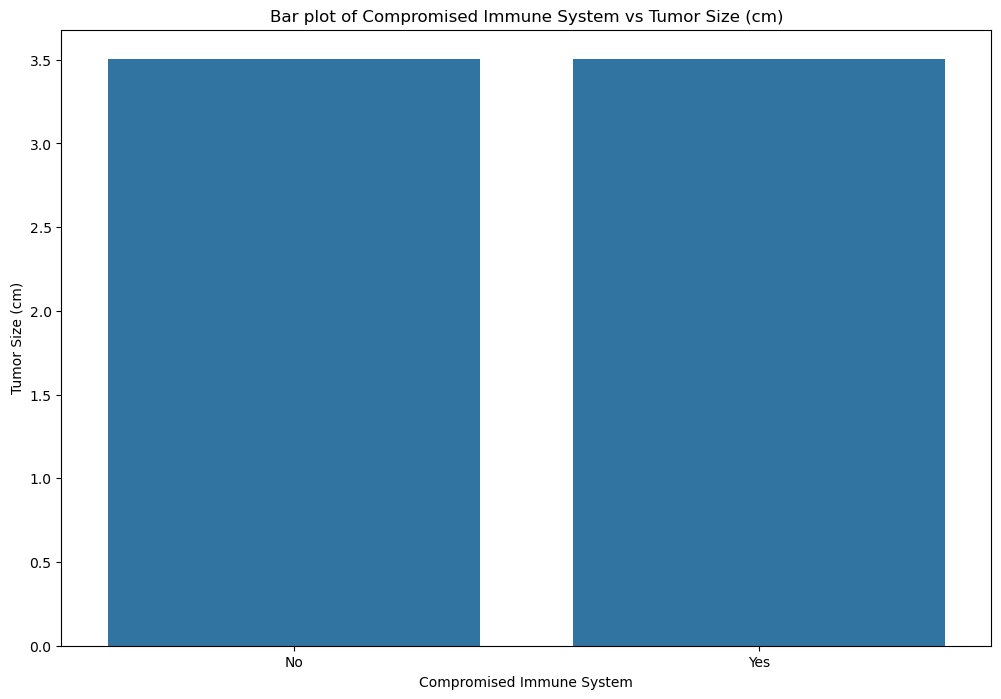

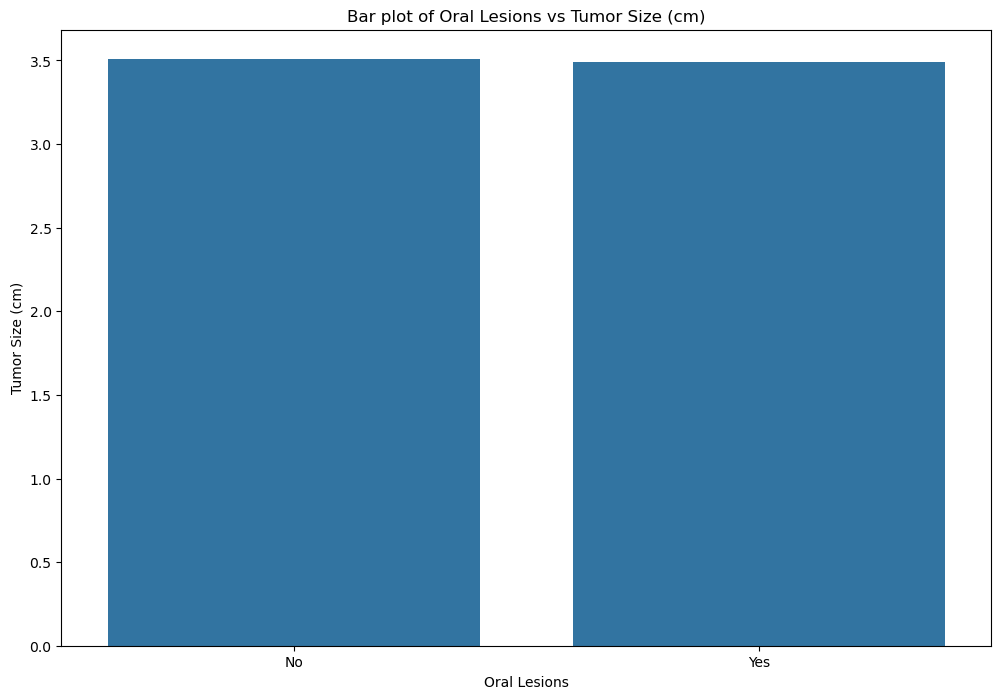

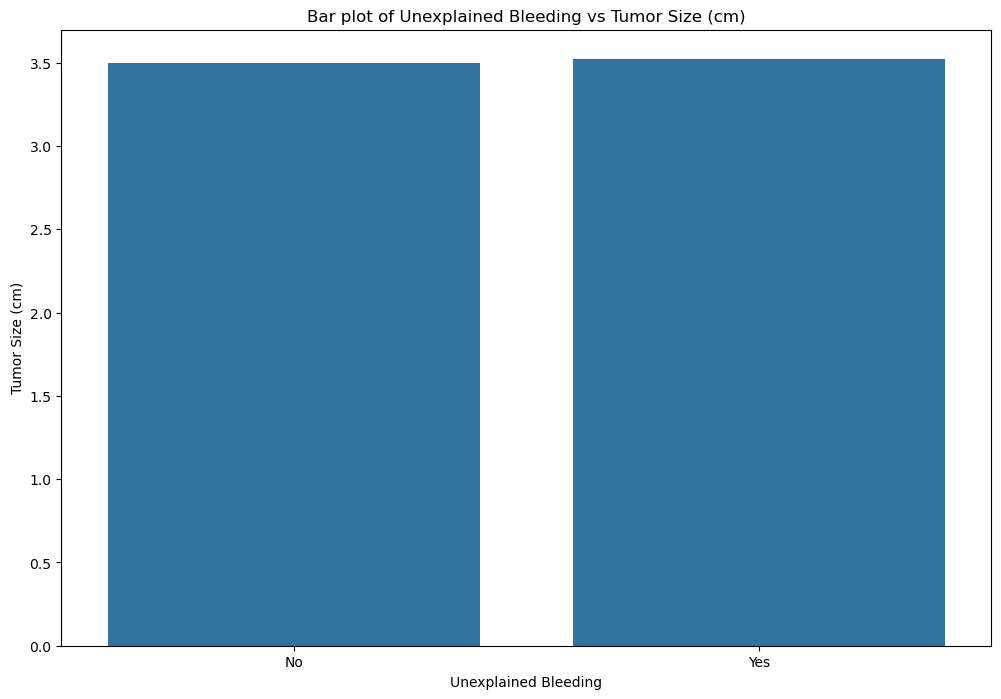

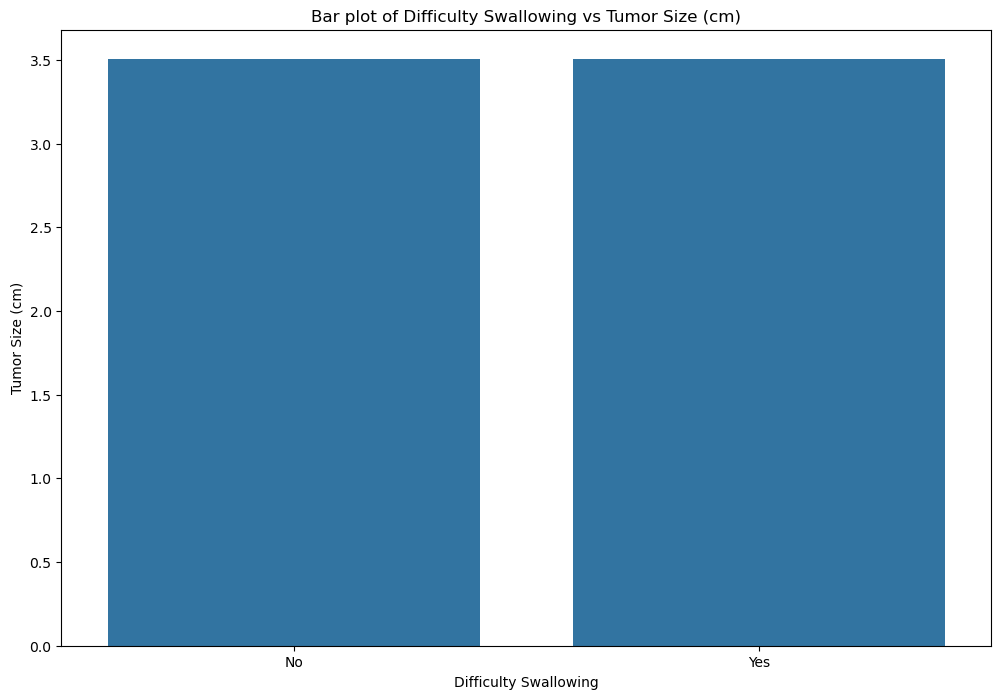

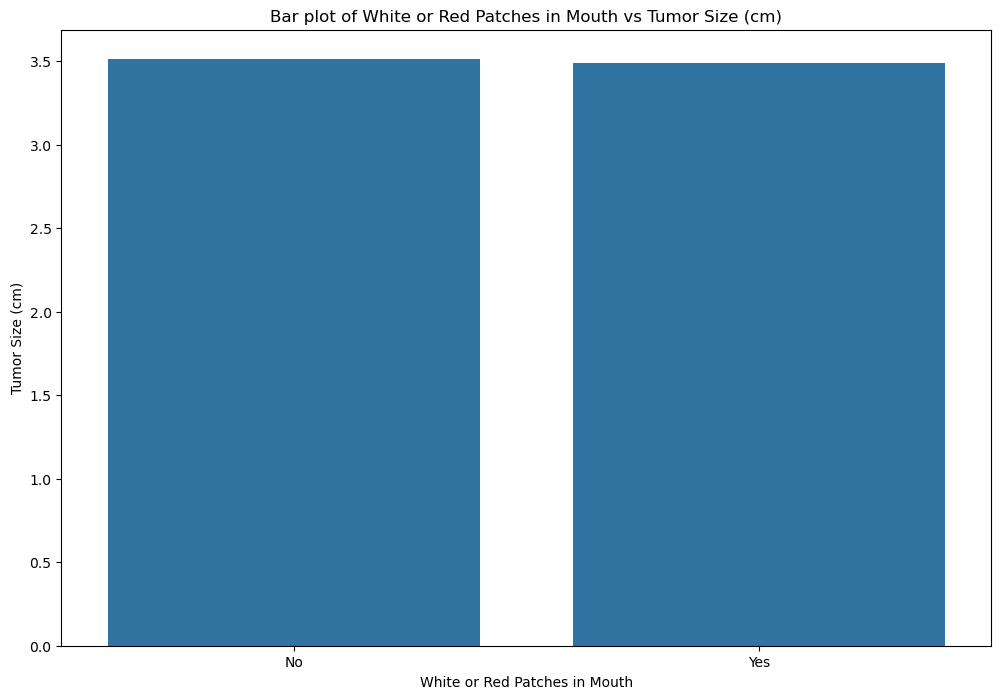

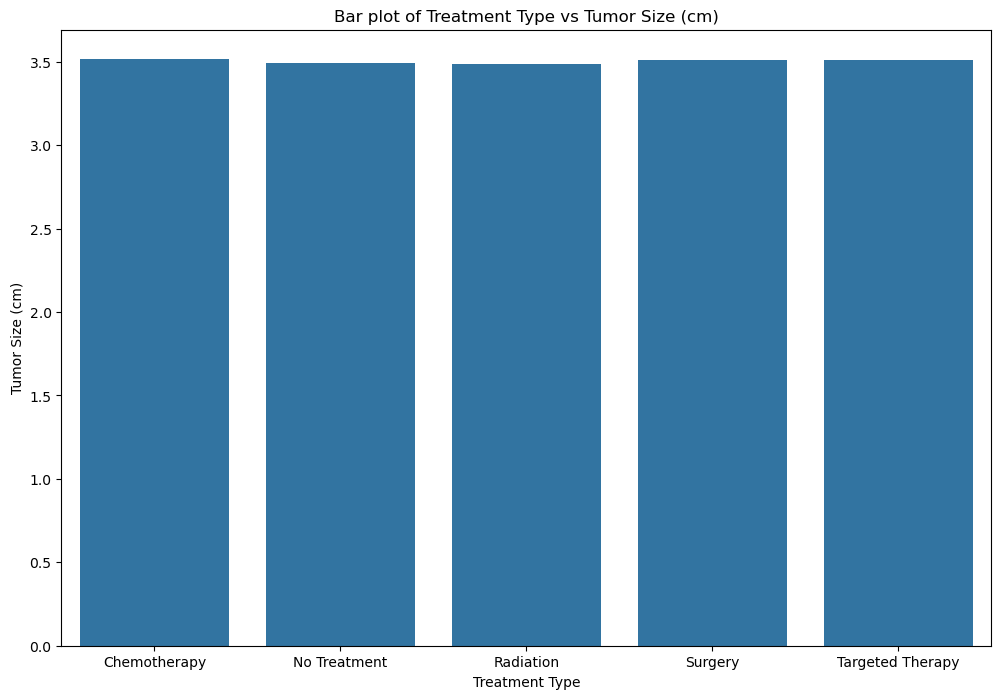

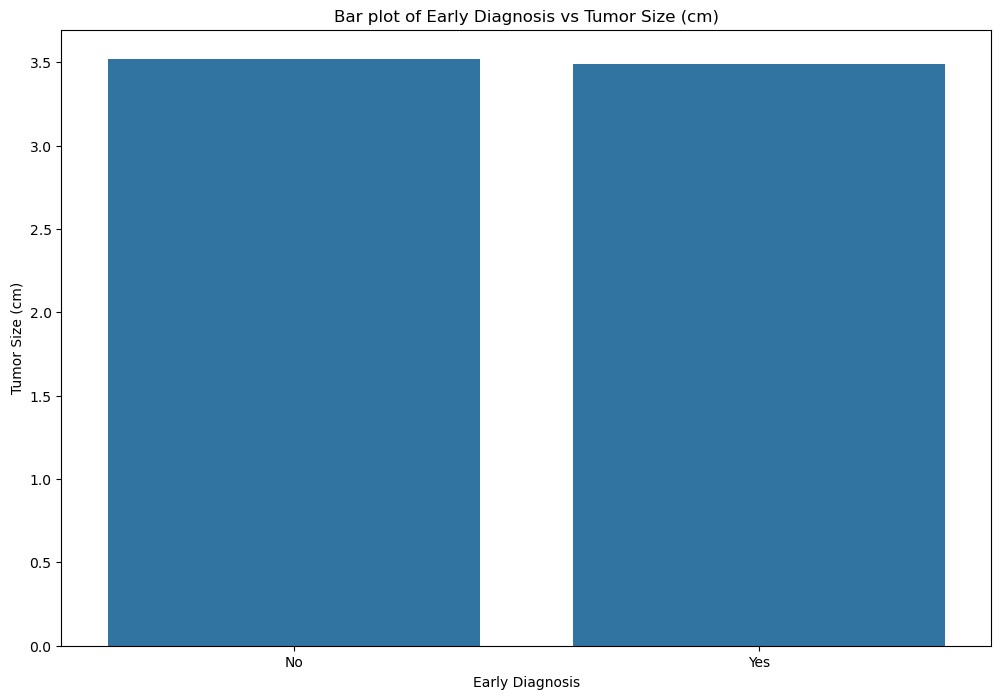

In [28]:
for col in cat_cols:
    if col!='Country':
        # plt.subplot(6,3,t)
        plt.figure(figsize=(12,8))
        sns.barplot(df.groupby(col)['Tumor Size (cm)'].mean())
        plt.title(f"Bar plot of {col} vs Tumor Size (cm)")
        plt.show()

1. **Gender**: Males are significantly more represented in the dataset compared to females, indicating a higher prevalence of oral cancer among males.

2. **Tobacco Use**: A large proportion of individuals reported using tobacco, reinforcing its strong association with oral cancer.

3. **Alcohol Consumption**: Alcohol consumption is prevalent among a significant portion of individuals, suggesting its role as a risk factor.

4. **HPV Infection**: Most individuals do not have HPV infection, but its presence in some cases may still contribute to oral cancer risk.

5. **Betel Quid Use**: While the majority do not use betel quid, its use among others could be a significant risk factor.

6. **Chronic Sun Exposure**: Most individuals do not report chronic sun exposure, indicating it may not be a primary risk factor in this dataset.

7. **Poor Oral Hygiene**: Poor oral hygiene is reported by a considerable number of individuals, which could be a contributing factor to oral cancer.

8. **Diet (Fruits & Vegetables Intake)**: Moderate intake of fruits and vegetables is the most common dietary pattern, suggesting a potential area for dietary improvement to reduce oral cancer risk.

9. **Family History of Cancer**: A large majority of individuals do not have a family history of cancer, indicating that genetic predisposition may not be the primary factor for most cases.

10. **Compromised Immune System**: Most individuals do not have a compromised immune system, suggesting other factors may play a larger role in oral cancer development.

11. **Oral Lesions**: The presence of oral lesions in some individuals could be an early indicator of oral cancer.

12. **Unexplained Bleeding**: Most individuals do not report unexplained bleeding, indicating it may not be a common symptom of oral cancer.

13. **Difficulty Swallowing**: Difficulty swallowing is reported by a minority of individuals, but its presence could indicate advanced stages of oral cancer.

14. **White or Red Patches in Mouth**: The presence of white or red patches in some individuals could be an early warning sign of oral cancer.

15. **Treatment Type**: Chemotherapy, surgery, and radiation are the most common treatment types, indicating their widespread use in managing oral cancer.

16. **Early Diagnosis**: A significant portion of individuals received an early diagnosis, emphasizing the importance of early detection in improving outcomes.

In [29]:
# Overally clean Data

In [30]:
# Statistical Analysis

In [31]:


from scipy.stats import ttest_ind,chi2_contingency

In [32]:
# NUm vs Target
# Checking the Relation between Numeric columns and Target
significant_cols=[]
for col in num_cols:
    if col!='Tumor Size (cm)':
        t_stat,p_val=ttest_ind(df['Tumor Size (cm)'],df[col])
        print(f"p value of {col} is {p_val}")
        if p_val<0.05:
            print(f"There is statistically significant association between {col} and Tumor Size (cm)")
            significant_cols.append(col)
        else:
            print(f"There is no statistically significant association between {col} and Tumor Size (cm)")

p value of Age is 0.0
There is statistically significant association between Age and Tumor Size (cm)
p value of Cancer Stage is 0.0
There is statistically significant association between Cancer Stage and Tumor Size (cm)
p value of Survival Rate (5-Year, %) is 0.0
There is statistically significant association between Survival Rate (5-Year, %) and Tumor Size (cm)
p value of Cost of Treatment (USD) is 0.0
There is statistically significant association between Cost of Treatment (USD) and Tumor Size (cm)
p value of Economic Burden (Lost Workdays per Year) is 0.0
There is statistically significant association between Economic Burden (Lost Workdays per Year) and Tumor Size (cm)


In [33]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [34]:

for col in cat_cols:
    if col!='Country' and col!='Gender' and col !='Treatment Type':
        group_1=df[df[col]=='Yes']['Tumor Size (cm)']
        group_2=df[df[col]=='No']['Tumor Size (cm)']
        t_stat,p_val=ttest_ind(group_1,group_2)
        print(f"p value of {col} is {p_val}")
        if p_val<0.05:
            print(f"There is statistically significant association between {col} and Tumor Size (cm)")
            significant_cols.append(col)
        else:
            print(f"There is no statistically significant association between {col} and Tumor Size (cm)")
    print()



p value of Tobacco Use is 0.009206622077367853
There is statistically significant association between Tobacco Use and Tumor Size (cm)

p value of Alcohol Consumption is 0.12458361507195474
There is no statistically significant association between Alcohol Consumption and Tumor Size (cm)

p value of HPV Infection is 0.30978507632074986
There is no statistically significant association between HPV Infection and Tumor Size (cm)

p value of Betel Quid Use is 0.9698091608862531
There is no statistically significant association between Betel Quid Use and Tumor Size (cm)

p value of Chronic Sun Exposure is 0.47035680518036127
There is no statistically significant association between Chronic Sun Exposure and Tumor Size (cm)

p value of Poor Oral Hygiene is 0.7896728554665671
There is no statistically significant association between Poor Oral Hygiene and Tumor Size (cm)

p value of Diet (Fruits & Vegetables Intake) is nan
There is no statistically significant association between Diet (Fruits &

In [35]:
# significant_cols.clear()

In [36]:
from scipy.stats import f_oneway

In [37]:
df['Treatment Type'].unique()

array(['No Treatment', 'Surgery', 'Radiation', 'Targeted Therapy',
       'Chemotherapy'], dtype=object)

In [38]:
grp1=df[df['Treatment Type']=='No Treatment']['Tumor Size (cm)']
grp2=df[df['Treatment Type']=='Chemotherapy']['Tumor Size (cm)']
grp3=df[df['Treatment Type']=='Radiation']['Tumor Size (cm)']
grp4=df[df['Treatment Type']=='Surgery']['Tumor Size (cm)']
grp5=df[df['Treatment Type']=='Targeted Therapy']['Tumor Size (cm)']

f_stat,p_val=f_oneway(grp1,grp2,grp3,grp4,grp5)
print(f"p value of Treatment Type is {p_val}")

p value of Treatment Type is 0.5663011382204123


In [39]:
group1=df[df['Gender']=='Male']['Tumor Size (cm)']
group2=df[df['Gender']=='Female']['Tumor Size (cm)']
t_stat,p_val=ttest_ind(group1,group2)
print(f"p value: {p_val}")

p value: 0.6538513907759881


In [40]:
print(significant_cols)

['Age', 'Cancer Stage', 'Survival Rate (5-Year, %)', 'Cost of Treatment (USD)', 'Economic Burden (Lost Workdays per Year)', 'Tobacco Use', 'Early Diagnosis']


In [43]:
# df[significant_cols]

<Axes: xlabel='Early Diagnosis', ylabel='Survival Rate (5-Year, %)'>

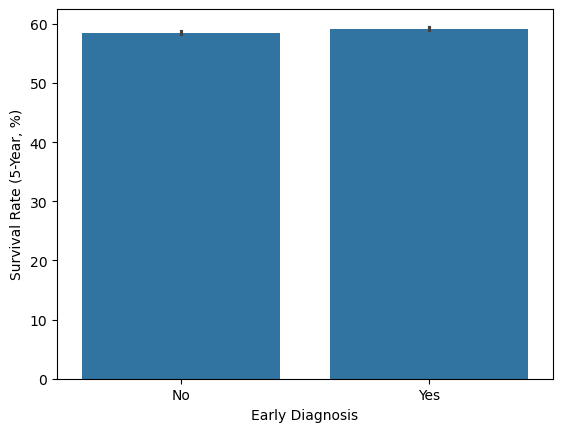

In [42]:
sns.barplot(x=df['Early Diagnosis'],y=df['Survival Rate (5-Year, %)'])

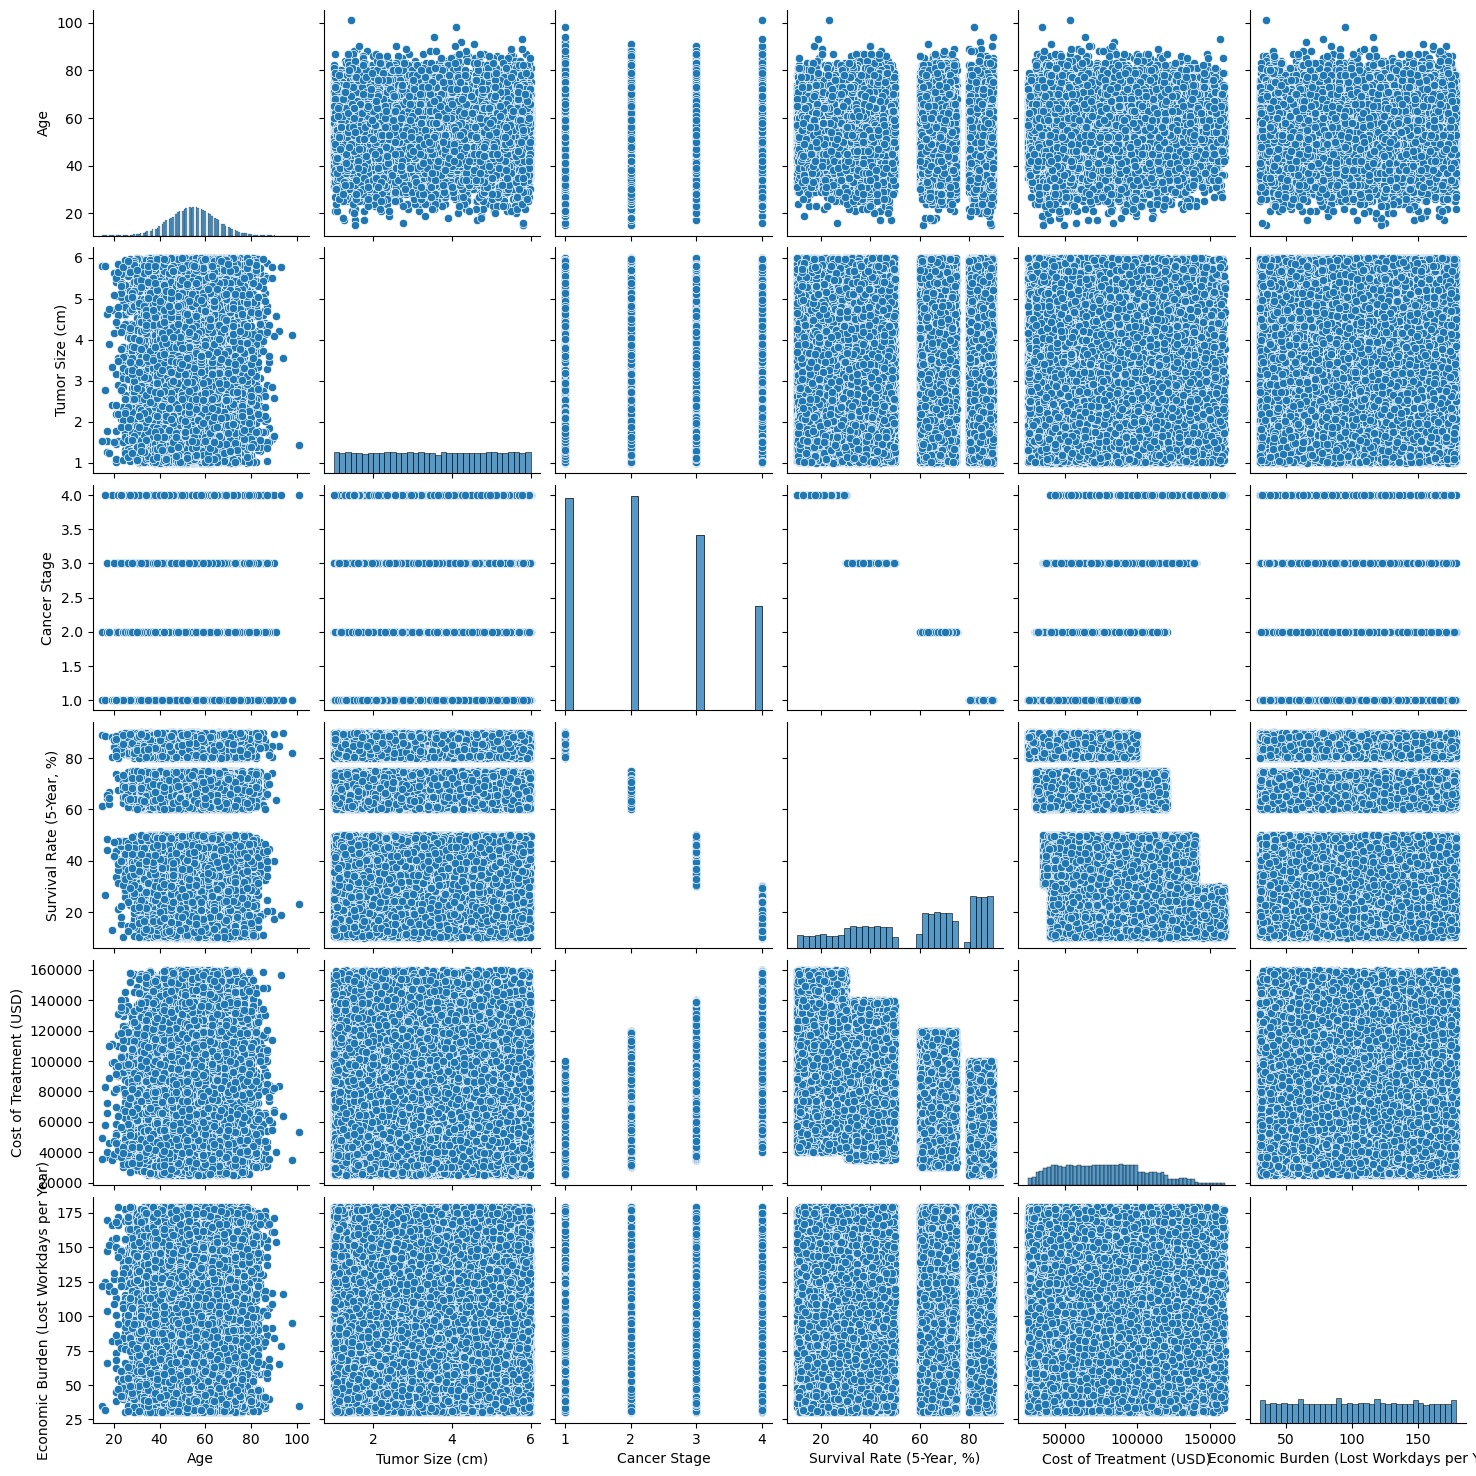

In [44]:
sns.pairplot(df)

In [140]:
cat_cols

Index(['Country', 'Gender', 'Tobacco Use', 'Alcohol Consumption',
       'HPV Infection', 'Betel Quid Use', 'Chronic Sun Exposure',
       'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)',
       'Family History of Cancer', 'Compromised Immune System', 'Oral Lesions',
       'Unexplained Bleeding', 'Difficulty Swallowing',
       'White or Red Patches in Mouth', 'Treatment Type', 'Early Diagnosis'],
      dtype='object')

In [234]:
df2=df.copy()

In [45]:
df2=pd.get_dummies(df,columns=['Gender', 'Tobacco Use', 'Alcohol Consumption',
       'HPV Infection', 'Betel Quid Use', 'Chronic Sun Exposure',
       'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)',
       'Family History of Cancer', 'Compromised Immune System', 'Oral Lesions',
       'Unexplained Bleeding', 'Difficulty Swallowing',
       'White or Red Patches in Mouth', 'Treatment Type', 'Early Diagnosis'],drop_first=True,dtype='int')
df2.head()

Country  Age  Tumor Size (cm)  Cancer Stage  \
1         Japan   64         1.782186             1   
2            UK   37         3.523895             2   
4  South Africa   68         2.834789             3   
5        Taiwan   70         1.692675             2   
6           USA   41         5.794843             1   

   Survival Rate (5-Year, %)  Cost of Treatment (USD)  \
1                  83.340103                 77772.50   
2                  63.222871                101164.50   
4                  44.293199                 45354.75   
5                  67.407275                 96504.00   
6                  80.798132                 86131.25   

   Economic Burden (Lost Workdays per Year)  Gender_Male  Tobacco Use_Yes  \
1                                       177            1                1   
2                                       130            0                0   
4                                        52            1                0   
5                                        91            1                1   
6                                       105            0                1   

   Alcohol Consumption_Yes  HPV Infection_Yes  Betel Quid Use_Yes  \
1                        1                  1                   0   
2                        1                  0                   0   
4                        0                  0                   0   
5                        0                  1                   1   
6                        1                  0                   0   

   Chronic Sun Exposure_Yes  Poor Oral Hygiene_Yes  \
1                         1                      1   
2                         1                      1   
4                         0                      1   
5                         0                      1   
6                         0                      0   

   Diet (Fruits & Vegetables Intake)_Low  \
1                                      0   
2                                      0   
4                                      0   
5                                      0   
6                                      0   

   Diet (Fruits & Vegetables Intake)_Moderate  Family History of Cancer_Yes  \
1                                           0                             0   
2                                           1                             0   
4                                           0                             0   
5                                           1                             1   
6                                           1                             0   

   Compromised Immune System_Yes  Oral Lesions_Yes  Unexplained Bleeding_Yes  \
1                              0                 0                         1   
2                              0                 0                         0   
4                              0                 0                         0   
5                              0                 1                         1   
6                              0                 0                         0   

   Difficulty Swallowing_Yes  White or Red Patches in Mouth_Yes  \
1                          0                                  0   
2                          0                                  1   
4                          0                                  0   
5                          0                                  0   
6                          1                                  1   

   Treatment Type_No Treatment  Treatment Type_Radiation  \
1                            1                         0   
2                            0                         0   
4                            1                         0   
5                            0                         0   
6                            1                         0   

   Treatment Type_Surgery  Treatment Type_Targeted Therapy  \
1                       0                                0   
2                     

In [46]:
df2.drop(['Country'],axis=1,inplace=True)

In [47]:
df2.head()

Age  Tumor Size (cm)  Cancer Stage  Survival Rate (5-Year, %)  \
1   64         1.782186             1                  83.340103   
2   37         3.523895             2                  63.222871   
4   68         2.834789             3                  44.293199   
5   70         1.692675             2                  67.407275   
6   41         5.794843             1                  80.798132   

   Cost of Treatment (USD)  Economic Burden (Lost Workdays per Year)  \
1                 77772.50                                       177   
2                101164.50                                       130   
4                 45354.75                                        52   
5                 96504.00                                        91   
6                 86131.25                                       105   

   Gender_Male  Tobacco Use_Yes  Alcohol Consumption_Yes  HPV Infection_Yes  \
1            1                1                        1                  1   
2            0                0                        1                  0   
4            1                0                        0                  0   
5            1                1                        0                  1   
6            0                1                        1                  0   

   Betel Quid Use_Yes  Chronic Sun Exposure_Yes  Poor Oral Hygiene_Yes  \
1                   0                         1                      1   
2                   0                         1                      1   
4                   0                         0                      1   
5                   1                         0                      1   
6                   0                         0                      0   

   Diet (Fruits & Vegetables Intake)_Low  \
1                                      0   
2                                      0   
4                                      0   
5                                      0   
6                                      0   

   Diet (Fruits & Vegetables Intake)_Moderate  Family History of Cancer_Yes  \
1                                           0                             0   
2                                           1                             0   
4                                           0                             0   
5                                           1                             1   
6                                           1                             0   

   Compromised Immune System_Yes  Oral Lesions_Yes  Unexplained Bleeding_Yes  \
1                              0                 0                         1   
2                              0                 0                         0   
4                              0                 0                         0   
5                              0                 1                         1   
6                              0                 0                         0   

   Difficulty Swallowing_Yes  White or Red Patches in Mouth_Yes  \
1                          0                                  0   
2                          0                                  1   
4                          0                                  0   
5                          0                                  0   
6                          1                                  1   

   Treatment Type_No Treatment  Treatment Type_Radiation  \
1                            1                         0   
2                            0                         0   
4                            1                         0   
5                            0                         0   
6                            1                         0   

   Treatment Type_Surgery  Treatment Type_Targeted Therapy  \
1                       0                                0   
2                       1                                0   
4                       0                                0   
5       

In [238]:
df2.shape

(42349, 26)

In [239]:
x=df2.drop(['Tumor Size (cm)'],axis=1)
y=df2['Tumor Size (cm)']


In [240]:
x=sm.add_constant(x)
x.head()

const  Age  Cancer Stage  Survival Rate (5-Year, %)  \
1    1.0   64             1                  83.340103   
2    1.0   37             2                  63.222871   
4    1.0   68             3                  44.293199   
5    1.0   70             2                  67.407275   
6    1.0   41             1                  80.798132   

   Cost of Treatment (USD)  Economic Burden (Lost Workdays per Year)  \
1                 77772.50                                       177   
2                101164.50                                       130   
4                 45354.75                                        52   
5                 96504.00                                        91   
6                 86131.25                                       105   

   Gender_Male  Tobacco Use_Yes  Alcohol Consumption_Yes  HPV Infection_Yes  \
1            1                1                        1                  1   
2            0                0                        1                  0   
4            1                0                        0                  0   
5            1                1                        0                  1   
6            0                1                        1                  0   

   Betel Quid Use_Yes  Chronic Sun Exposure_Yes  Poor Oral Hygiene_Yes  \
1                   0                         1                      1   
2                   0                         1                      1   
4                   0                         0                      1   
5                   1                         0                      1   
6                   0                         0                      0   

   Diet (Fruits & Vegetables Intake)_Low  \
1                                      0   
2                                      0   
4                                      0   
5                                      0   
6                                      0   

   Diet (Fruits & Vegetables Intake)_Moderate  Family History of Cancer_Yes  \
1                                           0                             0   
2                                           1                             0   
4                                           0                             0   
5                                           1                             1   
6                                           1                             0   

   Compromised Immune System_Yes  Oral Lesions_Yes  Unexplained Bleeding_Yes  \
1                              0                 0                         1   
2                              0                 0                         0   
4                              0                 0                         0   
5                              0                 1                         1   
6                              0                 0                         0   

   Difficulty Swallowing_Yes  White or Red Patches in Mouth_Yes  \
1                          0                                  0   
2                          0                                  1   
4                          0                                  0   
5                          0                                  0   
6                          1                                  1   

   Treatment Type_No Treatment  Treatment Type_Radiation  \
1                            1                         0   
2                            0                         0   
4                            1                         0   
5                            0                         0   
6                            1                         0   

   Treatment Type_Surgery  Treatment Type_Targeted Therapy  \
1                       0                                0   
2                       1                                0   
4                       0                                0   
5                       1                                0   
6     

In [241]:
from sklearn.model_selection import train_test_split


In [242]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
print(f"Shape of xtrain: {xtrain.shape}")
print(f"Shape of xtest: {xtest.shape}")
print(f"Shape of ytrain: {ytrain.shape}")
print(f"Shape of ytest: {ytest.shape}")

Shape of xtrain: (33879, 26)
Shape of xtest: (8470, 26)
Shape of ytrain: (33879,)
Shape of ytest: (8470,)


In [227]:
# # Scaling
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()

In [ ]:
# x_train_scaled=scaler.fit_transform(xtrain)
# x_test_scaled=scaler.transform(xtest)

In [ ]:
# x_train=pd.DataFrame(x_train_scaled,columns=xtrain.columns)
# x_test=pd.DataFrame(x_test_scaled,columns=xtest.columns)


In [192]:
# x_train.reset_index(drop=True,inplace=True)
# x_test.reset_index(drop=True,inplace=True)

In [ ]:
# x_train.head()

Age  Cancer Stage  Survival Rate (5-Year, %)  Cost of Treatment (USD)  \
0 -0.455096     -1.192796                   1.118296                 0.122718   
1  1.841612      1.690870                  -1.602077                -0.777889   
2 -0.455096     -0.231574                   0.265009                -0.127459   
3 -0.255382     -1.192796                   1.123857                 0.533941   
4 -1.154094     -0.231574                   0.180277                -1.536232   

   Economic Burden (Lost Workdays per Year)  Gender_Male  Tobacco Use_Yes  \
0                                 -0.332273     0.636541         0.497794   
1                                  1.733418    -1.570990         0.497794   
2                                  1.686998     0.636541         0.497794   
3                                  0.944278     0.636541         0.497794   
4                                  1.338848    -1.570990         0.497794   

   Alcohol Consumption_Yes  HPV Infection_Yes  Betel Quid Use_Yes  \
0                 0.820590          -0.654437           -0.639976   
1                -1.218636          -0.654437            1.562558   
2                 0.820590          -0.654437           -0.639976   
3                 0.820590           1.528030           -0.639976   
4                -1.218636          -0.654437           -0.639976   

   Chronic Sun Exposure_Yes  Poor Oral Hygiene_Yes  \
0                 -0.494746               1.008031   
1                 -0.494746              -0.992033   
2                 -0.494746               1.008031   
3                 -0.494746              -0.992033   
4                 -0.494746               1.008031   

   Diet (Fruits & Vegetables Intake)_Low  \
0                              -0.812906   
1                               1.230154   
2                              -0.812906   
3                              -0.812906   
4                              -0.812906   

   Diet (Fruits & Vegetables Intake)_Moderate  Family History of Cancer_Yes  \
0                                    1.218935                     -0.335249   
1                                   -0.820388                     -0.335249   
2                                   -0.820388                     -0.335249   
3                                   -0.820388                      2.982861   
4                                    1.218935                     -0.335249   

   Compromised Immune System_Yes  Oral Lesions_Yes  Unexplained Bleeding_Yes  \
0                      -0.338616         -0.656232                 -0.499686   
1                      -0.338616         -0.656232                 -0.499686   
2                      -0.338616         -0.656232                 -0.499686   
3                      -0.338616          1.523851                 -0.499686   
4                      -0.338616         -0.656232                  2.001255   

   Difficulty Swallowing_Yes  White or Red Patches in Mouth_Yes  \
0                  -0.575726                           1.357891   
1                  -0.575726                           1.357891   
2                   1.736938                           1.357891   
3                   1.736938                           1.357891   
4                   1.736938                           1.357891   

   Treatment Type_No Treatment  Treatment Type_Radiation  \
0                     2.003105                 -0.495855   
1                    -0.499225                  2.016719   
2                    -0.499225                  2.016719   
3                     2.003105                 -0.495855   
4                    -0.499225                 -0.495855   

   Treatment Type_Surgery  Treatment Type_Targeted Therapy  \
0               -0.500931                        -0.501623   
1               -0.500931                        -0.501623   
2               -0.500931                        -0.501623   
3               -0.500931                        -0.501623   
4               -0.5009

In [228]:
import statsmodels.api as sm


In [ ]:
# xtrain=sm.add_constant(xtrain)
# xtest=sm.add_constant(xtest)

In [230]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(33879, 26)
(8470, 26)
(33879,)
(8470,)


In [231]:
xtrain.columns

Index(['const', 'Age', 'Cancer Stage', 'Survival Rate (5-Year, %)',
       'Cost of Treatment (USD)', 'Economic Burden (Lost Workdays per Year)',
       'Gender_Male', 'Tobacco Use_Yes', 'Alcohol Consumption_Yes',
       'HPV Infection_Yes', 'Betel Quid Use_Yes', 'Chronic Sun Exposure_Yes',
       'Poor Oral Hygiene_Yes', 'Diet (Fruits & Vegetables Intake)_Low',
       'Diet (Fruits & Vegetables Intake)_Moderate',
       'Family History of Cancer_Yes', 'Compromised Immune System_Yes',
       'Oral Lesions_Yes', 'Unexplained Bleeding_Yes',
       'Difficulty Swallowing_Yes', 'White or Red Patches in Mouth_Yes',
       'Treatment Type_No Treatment', 'Treatment Type_Radiation',
       'Treatment Type_Surgery', 'Treatment Type_Targeted Therapy',
       'Early Diagnosis_Yes'],
      dtype='object')

In [232]:
xtest.columns

Index(['const', 'Age', 'Cancer Stage', 'Survival Rate (5-Year, %)',
       'Cost of Treatment (USD)', 'Economic Burden (Lost Workdays per Year)',
       'Gender_Male', 'Tobacco Use_Yes', 'Alcohol Consumption_Yes',
       'HPV Infection_Yes', 'Betel Quid Use_Yes', 'Chronic Sun Exposure_Yes',
       'Poor Oral Hygiene_Yes', 'Diet (Fruits & Vegetables Intake)_Low',
       'Diet (Fruits & Vegetables Intake)_Moderate',
       'Family History of Cancer_Yes', 'Compromised Immune System_Yes',
       'Oral Lesions_Yes', 'Unexplained Bleeding_Yes',
       'Difficulty Swallowing_Yes', 'White or Red Patches in Mouth_Yes',
       'Treatment Type_No Treatment', 'Treatment Type_Radiation',
       'Treatment Type_Surgery', 'Treatment Type_Targeted Therapy',
       'Early Diagnosis_Yes'],
      dtype='object')

In [ ]:
# model1=sm.OLS(ytrain,x_train).fit()
# model1.summary()

ValueError: The indices for endog and exog are not aligned

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [195]:
lin_model1=LinearRegression()
lin_model1.fit(x_train,ytrain)

LinearRegression()

In [197]:
y_pred=lin_model1.predict(x_test)
print("Mean Squared Error: ",mean_squared_error(ytest,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(ytest,y_pred))
print("R2 Score: ",r2_score(ytest,y_pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(ytest,y_pred)))

Mean Squared Error:  2.0999674552212753
Mean Absolute Error:  1.2552052022611944
R2 Score:  -0.0015393345959218152
Root Mean Squared Error:  1.4491264455599708


In [198]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [203]:
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                   for i in range(x.shape[1])]

print(vif_data)

                                       Feature        VIF
0                                          Age  28.920780
1                                 Cancer Stage  18.554134
2                    Survival Rate (5-Year, %)  19.210984
3                      Cost of Treatment (USD)   9.331616
4     Economic Burden (Lost Workdays per Year)   6.799407
5                                  Gender_Male   3.443479
6                              Tobacco Use_Yes   4.993767
7                      Alcohol Consumption_Yes   2.488924
8                            HPV Infection_Yes   1.426406
9                           Betel Quid Use_Yes   1.409645
10                    Chronic Sun Exposure_Yes   1.247338
11                       Poor Oral Hygiene_Yes   1.981359
12       Diet (Fruits & Vegetables Intake)_Low   2.973120
13  Diet (Fruits & Vegetables Intake)_Moderate   2.979724
14                Family History of Cancer_Yes   1.110852
15               Compromised Immune System_Yes   1.114350
16            

In [204]:
x=df2.drop(['Tumor Size (cm)','Age'],axis=1)
y=df2['Tumor Size (cm)']

In [205]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
print(f"Shape of xtrain: {xtrain.shape}")
print(f"Shape of xtest: {xtest.shape}")
print(f"Shape of ytrain: {ytrain.shape}")
print(f"Shape of ytest: {ytest.shape}")


Shape of xtrain: (33879, 24)
Shape of xtest: (8470, 24)
Shape of ytrain: (33879,)
Shape of ytest: (8470,)


In [206]:
x_train_scaled=scaler.fit_transform(xtrain)
x_test_scaled=scaler.transform(xtest)
x_train=pd.DataFrame(x_train_scaled,columns=xtrain.columns)
x_test=pd.DataFrame(x_test_scaled,columns=xtest.columns)


In [207]:
model3=LinearRegression()
model3.fit(x_train,ytrain)
y_pred=model3.predict(x_test)
print("Mean Squared Error: ",mean_squared_error(ytest,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(ytest,y_pred))
print("R2 Score: ",r2_score(ytest,y_pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(ytest,y_pred)))

Mean Squared Error:  2.0998330012829918
Mean Absolute Error:  1.2551645050471816
R2 Score:  -0.0014752093602914407
Root Mean Squared Error:  1.449080053441835


In [208]:
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                   for i in range(x.shape[1])]

print(vif_data)

                                       Feature        VIF
0                                 Cancer Stage  12.259559
1                    Survival Rate (5-Year, %)  11.043197
2                      Cost of Treatment (USD)   9.327283
3     Economic Burden (Lost Workdays per Year)   6.791723
4                                  Gender_Male   3.441824
5                              Tobacco Use_Yes   4.992749
6                      Alcohol Consumption_Yes   2.488121
7                            HPV Infection_Yes   1.426393
8                           Betel Quid Use_Yes   1.409441
9                     Chronic Sun Exposure_Yes   1.247305
10                       Poor Oral Hygiene_Yes   1.980943
11       Diet (Fruits & Vegetables Intake)_Low   2.971948
12  Diet (Fruits & Vegetables Intake)_Moderate   2.978510
13                Family History of Cancer_Yes   1.110717
14               Compromised Immune System_Yes   1.114299
15                            Oral Lesions_Yes   4.091648
16            

In [209]:
x=df2.drop(['Tumor Size (cm)','Age','Cancer Stage'],axis=1)
y=df2['Tumor Size (cm)']

In [210]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
print(f"Shape of xtrain: {xtrain.shape}")
print(f"Shape of xtest: {xtest.shape}")
print(f"Shape of ytrain: {ytrain.shape}")
print(f"Shape of ytest: {ytest.shape}")


Shape of xtrain: (33879, 23)
Shape of xtest: (8470, 23)
Shape of ytrain: (33879,)
Shape of ytest: (8470,)


In [211]:
x_train_scaled=scaler.fit_transform(xtrain)
x_test_scaled=scaler.transform(xtest)
x_train=pd.DataFrame(x_train_scaled,columns=xtrain.columns)
x_test=pd.DataFrame(x_test_scaled,columns=xtest.columns)


In [212]:
model3=LinearRegression()
model3.fit(x_train,ytrain)
y_pred=model3.predict(x_test)
print("Mean Squared Error: ",mean_squared_error(ytest,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(ytest,y_pred))
print("R2 Score: ",r2_score(ytest,y_pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(ytest,y_pred)))

Mean Squared Error:  2.099620846428366
Mean Absolute Error:  1.255112805891935
R2 Score:  -0.0013740261579493485
Root Mean Squared Error:  1.4490068483027836


In [213]:
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                   for i in range(x.shape[1])]

print(vif_data)

                                       Feature        VIF
0                    Survival Rate (5-Year, %)   5.993168
1                      Cost of Treatment (USD)   6.292552
2     Economic Burden (Lost Workdays per Year)   6.050413
3                                  Gender_Male   3.291054
4                              Tobacco Use_Yes   4.606821
5                      Alcohol Consumption_Yes   2.424189
6                            HPV Infection_Yes   1.416422
7                           Betel Quid Use_Yes   1.398665
8                     Chronic Sun Exposure_Yes   1.242013
9                        Poor Oral Hygiene_Yes   1.950768
10       Diet (Fruits & Vegetables Intake)_Low   2.787168
11  Diet (Fruits & Vegetables Intake)_Moderate   2.799283
12                Family History of Cancer_Yes   1.108406
13               Compromised Immune System_Yes   1.111185
14                            Oral Lesions_Yes   4.091576
15                    Unexplained Bleeding_Yes   1.244230
16            

In [214]:
x=df2.drop(['Tumor Size (cm)','Age','Cancer Stage','Early Diagnosis_Yes'],axis=1)
y=df2['Tumor Size (cm)']

In [215]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
print(f"Shape of xtrain: {xtrain.shape}")
print(f"Shape of xtest: {xtest.shape}")
print(f"Shape of ytrain: {ytrain.shape}")
print(f"Shape of ytest: {ytest.shape}")


Shape of xtrain: (33879, 22)
Shape of xtest: (8470, 22)
Shape of ytrain: (33879,)
Shape of ytest: (8470,)


In [216]:
x_train_scaled=scaler.fit_transform(xtrain)
x_test_scaled=scaler.transform(xtest)
x_train=pd.DataFrame(x_train_scaled,columns=xtrain.columns)
x_test=pd.DataFrame(x_test_scaled,columns=xtest.columns)


In [217]:
model3=LinearRegression()
model3.fit(x_train,ytrain)
y_pred=model3.predict(x_test)
print("Mean Squared Error: ",mean_squared_error(ytest,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(ytest,y_pred))
print("R2 Score: ",r2_score(ytest,y_pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(ytest,y_pred)))

Mean Squared Error:  2.099508595648815
Mean Absolute Error:  1.2550429806946188
R2 Score:  -0.0013204902944390362
Root Mean Squared Error:  1.4489681140897528


In [218]:
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                   for i in range(x.shape[1])]

print(vif_data)

                                       Feature       VIF
0                    Survival Rate (5-Year, %)  5.976899
1                      Cost of Treatment (USD)  6.280261
2     Economic Burden (Lost Workdays per Year)  6.048196
3                                  Gender_Male  3.290107
4                              Tobacco Use_Yes  4.603862
5                      Alcohol Consumption_Yes  2.423731
6                            HPV Infection_Yes  1.416336
7                           Betel Quid Use_Yes  1.398627
8                     Chronic Sun Exposure_Yes  1.242011
9                        Poor Oral Hygiene_Yes  1.950555
10       Diet (Fruits & Vegetables Intake)_Low  2.786495
11  Diet (Fruits & Vegetables Intake)_Moderate  2.798247
12                Family History of Cancer_Yes  1.108395
13               Compromised Immune System_Yes  1.110997
14                            Oral Lesions_Yes  1.415505
15                    Unexplained Bleeding_Yes  1.244068
16                   Difficulty

In [244]:
# Changing the target variable
# target=df['Cost of Treatment (USD)']


In [246]:
df.head()

Country  Age  Gender Tobacco Use Alcohol Consumption HPV Infection  \
1         Japan   64    Male         Yes                 Yes           Yes   
2            UK   37  Female          No                 Yes            No   
4  South Africa   68    Male          No                  No            No   
5        Taiwan   70    Male         Yes                  No           Yes   
6           USA   41  Female         Yes                 Yes            No   

  Betel Quid Use Chronic Sun Exposure Poor Oral Hygiene  \
1             No                  Yes               Yes   
2             No                  Yes               Yes   
4             No                   No               Yes   
5            Yes                   No               Yes   
6             No                   No                No   

  Diet (Fruits & Vegetables Intake) Family History of Cancer  \
1                              High                       No   
2                          Moderate                       No   
4                              High                       No   
5                          Moderate                      Yes   
6                          Moderate                       No   

  Compromised Immune System Oral Lesions Unexplained Bleeding  \
1                        No           No                  Yes   
2                        No           No                   No   
4                        No           No                   No   
5                        No          Yes                  Yes   
6                        No           No                   No   

  Difficulty Swallowing White or Red Patches in Mouth  Tumor Size (cm)  \
1                    No                            No         1.782186   
2                    No                           Yes         3.523895   
4                    No                            No         2.834789   
5                    No                            No         1.692675   
6                   Yes                           Yes         5.794843   

   Cancer Stage Treatment Type  Survival Rate (5-Year, %)  \
1             1   No Treatment                  83.340103   
2             2        Surgery                  63.222871   
4             3   No Treatment                  44.293199   
5             2        Surgery                  67.407275   
6             1   No Treatment                  80.798132   

   Cost of Treatment (USD)  Economic Burden (Lost Workdays per Year)  \
1                 77772.50                                       177   
2                101164.50                                       130   
4                 45354.75                                        52   
5                 96504.00                                        91   
6                 86131.25                                       105   

  Early Diagnosis  
1              No  
2             Yes  
4              No  
5             Yes  
6             Yes

In [249]:
df3=df.copy()

In [256]:
df3.select_dtypes(include='object').columns

Index(['Country', 'Gender', 'Tobacco Use', 'Alcohol Consumption',
       'HPV Infection', 'Betel Quid Use', 'Chronic Sun Exposure',
       'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)',
       'Family History of Cancer', 'Compromised Immune System', 'Oral Lesions',
       'Unexplained Bleeding', 'Difficulty Swallowing',
       'White or Red Patches in Mouth', 'Treatment Type', 'Early Diagnosis'],
      dtype='object')

In [262]:
# encoding
cols=['Gender', 'Tobacco Use', 'Alcohol Consumption',
       'HPV Infection', 'Betel Quid Use', 'Chronic Sun Exposure',
       'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)',
       'Family History of Cancer', 'Compromised Immune System', 'Oral Lesions',
       'Unexplained Bleeding', 'Difficulty Swallowing',
       'White or Red Patches in Mouth', 'Treatment Type', 'Early Diagnosis']
df3=pd.get_dummies(df3,columns=cols,drop_first=True,dtype='int')
df3.head()

Country  Age  Tumor Size (cm)  Cancer Stage  \
1         Japan   64         1.782186             1   
2            UK   37         3.523895             2   
4  South Africa   68         2.834789             3   
5        Taiwan   70         1.692675             2   
6           USA   41         5.794843             1   

   Survival Rate (5-Year, %)  Cost of Treatment (USD)  \
1                  83.340103                 77772.50   
2                  63.222871                101164.50   
4                  44.293199                 45354.75   
5                  67.407275                 96504.00   
6                  80.798132                 86131.25   

   Economic Burden (Lost Workdays per Year)  Gender_Male  Tobacco Use_Yes  \
1                                       177            1                1   
2                                       130            0                0   
4                                        52            1                0   
5                                        91            1                1   
6                                       105            0                1   

   Alcohol Consumption_Yes  HPV Infection_Yes  Betel Quid Use_Yes  \
1                        1                  1                   0   
2                        1                  0                   0   
4                        0                  0                   0   
5                        0                  1                   1   
6                        1                  0                   0   

   Chronic Sun Exposure_Yes  Poor Oral Hygiene_Yes  \
1                         1                      1   
2                         1                      1   
4                         0                      1   
5                         0                      1   
6                         0                      0   

   Diet (Fruits & Vegetables Intake)_Low  \
1                                      0   
2                                      0   
4                                      0   
5                                      0   
6                                      0   

   Diet (Fruits & Vegetables Intake)_Moderate  Family History of Cancer_Yes  \
1                                           0                             0   
2                                           1                             0   
4                                           0                             0   
5                                           1                             1   
6                                           1                             0   

   Compromised Immune System_Yes  Oral Lesions_Yes  Unexplained Bleeding_Yes  \
1                              0                 0                         1   
2                              0                 0                         0   
4                              0                 0                         0   
5                              0                 1                         1   
6                              0                 0                         0   

   Difficulty Swallowing_Yes  White or Red Patches in Mouth_Yes  \
1                          0                                  0   
2                          0                                  1   
4                          0                                  0   
5                          0                                  0   
6                          1                                  1   

   Treatment Type_No Treatment  Treatment Type_Radiation  \
1                            1                         0   
2                            0                         0   
4                            1                         0   
5                            0                         0   
6                            1                         0   

   Treatment Type_Surgery  Treatment Type_Targeted Therapy  \
1                       0                                0   
2                     

In [263]:
df3.drop(['Country'],axis=1,inplace=True)

In [265]:
x=df3.drop(['Cost of Treatment (USD)'],axis=1)
y=df3['Cost of Treatment (USD)']
x=sm.add_constant(x)

In [266]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
print(f"Shape of xtrain: {xtrain.shape}")
print(f"Shape of xtest: {xtest.shape}")
print(f"Shape of ytrain: {ytrain.shape}")
print(f"Shape of ytest: {ytest.shape}")


Shape of xtrain: (33879, 26)
Shape of xtest: (8470, 26)
Shape of ytrain: (33879,)
Shape of ytest: (8470,)


In [267]:
scaler=StandardScaler()

In [268]:
x_train_scaled=scaler.fit_transform(xtrain)
x_test_scaled=scaler.transform(xtest)
x_train=pd.DataFrame(x_train_scaled,columns=xtrain.columns)
x_test=pd.DataFrame(x_test_scaled,columns=xtest.columns)

In [270]:
from sklearn.linear_model import LinearRegression

In [271]:
model1=LinearRegression()
model1.fit(x_train,ytrain)

LinearRegression()

In [272]:
ypred=model1.predict(x_test)
print("Mean Squared Error: ",mean_squared_error(ytest,ypred))
print("Mean Absolute Error: ",mean_absolute_error(ytest,ypred))
print("R2 Score: ",r2_score(ytest,ypred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(ytest,ypred)))

Mean Squared Error:  762775404.8295689
Mean Absolute Error:  23646.236892511843
R2 Score:  0.17296343930048552
Root Mean Squared Error:  27618.38888910012


In [273]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [275]:
model2=DecisionTreeRegressor(random_state=42)
model2.fit(x_train,ytrain)
ypred2=model2.predict(x_test)
print("Mean Squared Error: ",mean_squared_error(ytest,ypred2))
print("Mean Absolute Error: ",mean_absolute_error(ytest,ypred2))
print("R2 Score: ",r2_score(ytest,ypred2))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(ytest,ypred2)))

Mean Squared Error:  1541651868.707475
Mean Absolute Error:  31520.73007674144
R2 Score:  -0.6715306382705015
Root Mean Squared Error:  39263.87485599804


In [276]:
model3=RandomForestRegressor(random_state=42)
model3.fit(x_train,ytrain)
ypred3=model3.predict(x_test)
print("Mean Squared Error: ",mean_squared_error(ytest,ypred3))
print("Mean Absolute Error: ",mean_absolute_error(ytest,ypred3))
print("R2 Score: ",r2_score(ytest,ypred3))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(ytest,ypred3)))

Mean Squared Error:  787340781.091058
Mean Absolute Error:  23856.484313459267
R2 Score:  0.1463285161409863
Root Mean Squared Error:  28059.59338784256


In [277]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


In [278]:
model4=GradientBoostingRegressor(random_state=42)
model4.fit(x_train,ytrain)
ypred4=model4.predict(x_test)
print("Mean Squared Error: ",mean_squared_error(ytest,ypred4))
print("Mean Absolute Error: ",mean_absolute_error(ytest,ypred4))
print("R2 Score: ",r2_score(ytest,ypred4))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(ytest,ypred4)))

Mean Squared Error:  764396667.785465
Mean Absolute Error:  23685.79031834609
R2 Score:  0.17120559061980678
Root Mean Squared Error:  27647.724459446297


In [279]:
model5=XGBRegressor(random_state=42)
model5.fit(x_train,ytrain)
ypred5=model5.predict(x_test)
print("Mean Squared Error: ",mean_squared_error(ytest,ypred5))
print("Mean Absolute Error: ",mean_absolute_error(ytest,ypred5))
print("R2 Score: ",r2_score(ytest,ypred5))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(ytest,ypred5)))


Mean Squared Error:  816309457.5210732
Mean Absolute Error:  24226.301893631935
R2 Score:  0.11491933019843492
Root Mean Squared Error:  28571.129790770843
